# TMDB Box Office Prediction EDA + ML

![](https://cdn-images-1.medium.com/max/1200/1*vIR7iO-1GnY2xYxL6NiYkw.png)
[image-source](https://cdn-images-1.medium.com/max/1200/1*vIR7iO-1GnY2xYxL6NiYkw.png)

In a world... where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. But what movies make the most money at the box office? How much does a director matter? Or the budget? For some movies, it's "You had me at 'Hello.'" For others, the trailer falls short of expectations and you think "What we have here is a failure to communicate."

In this competition, you're presented with metadata on over 7,000 past films from The Movie Database to try and predict their overall worldwide box office revenue. Data points provided include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries. You can collect other publicly available data to use in your model predictions, but in the spirit of this competition, use only data that would have been available before a movie's release.

## *Kernel in progress, is continuously being updated and extended*

## Preparations - Prerequisities

![](https://images-na.ssl-images-amazon.com/images/I/91HTK796%2BML._SX425_.jpg)
[image-source](https://images-na.ssl-images-amazon.com/images/I/91HTK796%2BML._SX425_.jpg)

### Loading Libraries

In [242]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import gc

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")

['train.csv', 'sample_submission.csv', 'test.csv']


### Loading the data

In [243]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sub_df = pd.read_csv('sample_submission.csv')

### Inspecting the train set

In [244]:
train_df.head()

id    ...      revenue
0   1    ...     12314651
1   2    ...     95149435
2   3    ...     13092000
3   4    ...     16000000
4   5    ...      3923970

[5 rows x 23 columns]

We have a variaty of data, numerical, categorical and even lists of json formats.

In [245]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

### Check for NA values in trainset

In [246]:
train_df.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [247]:
test_df.isna().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

## Exploratory Data Analysis

![](https://prod-discovery.edx-cdn.org/media/course/image/2102f79d-9a44-41e9-9d92-884bec46dc65-ff40350cad17.small.jpg)
[image-source](https://prod-discovery.edx-cdn.org/media/course/image/2102f79d-9a44-41e9-9d92-884bec46dc65-ff40350cad17.small.jpg)

In [248]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

So many columns and features to investigate, lets start by inspecting one by one each feature.

### Univariate Analysis

#### Revenue
Our target variable that must be predicted

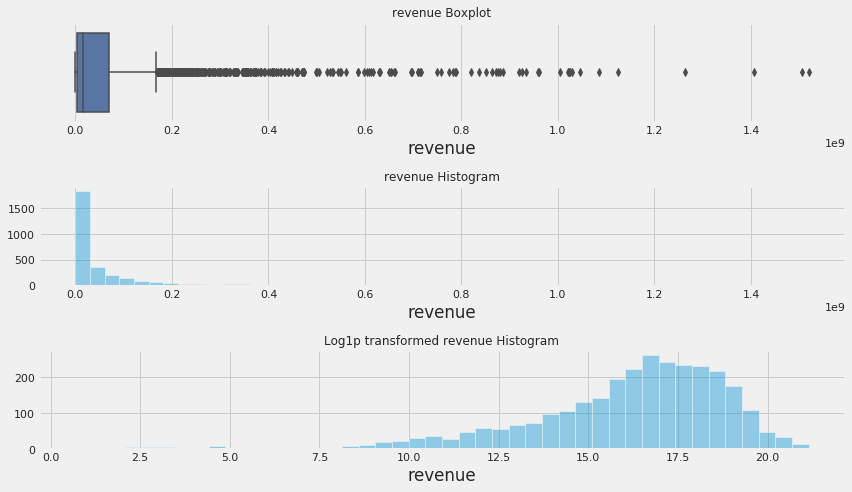

In [249]:
f, ax = plt.subplots(3, figsize=(12,7))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train_df.revenue, ax = ax[0])
ax[0].set_title("revenue Boxplot")
sns.distplot(a=train_df.revenue, kde = False, ax = ax[1])
ax[1].set_title("revenue Histogram")
sns.distplot(a=np.log1p(train_df.revenue), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed revenue Histogram")
f.tight_layout()

train_df["log_revenue"] = np.log1p(train_df.revenue)




#### Title
Lets generate a wordcloud

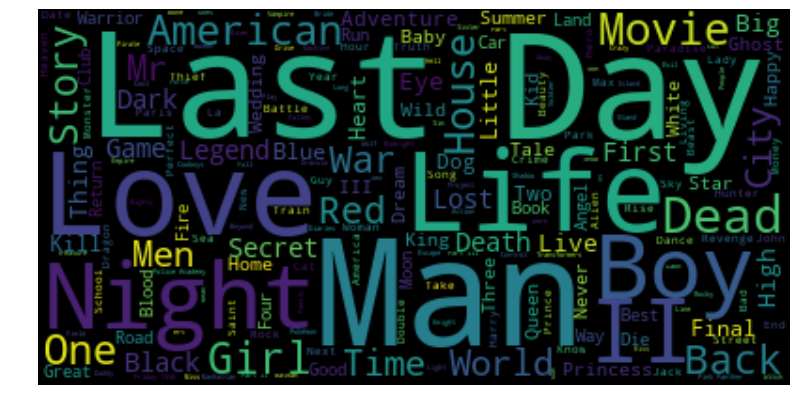

In [250]:
wordcloud = WordCloud().generate(train_df.title.to_string())

sns.set(rc={'figure.figsize':(12,8)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Lets see the length of each movie

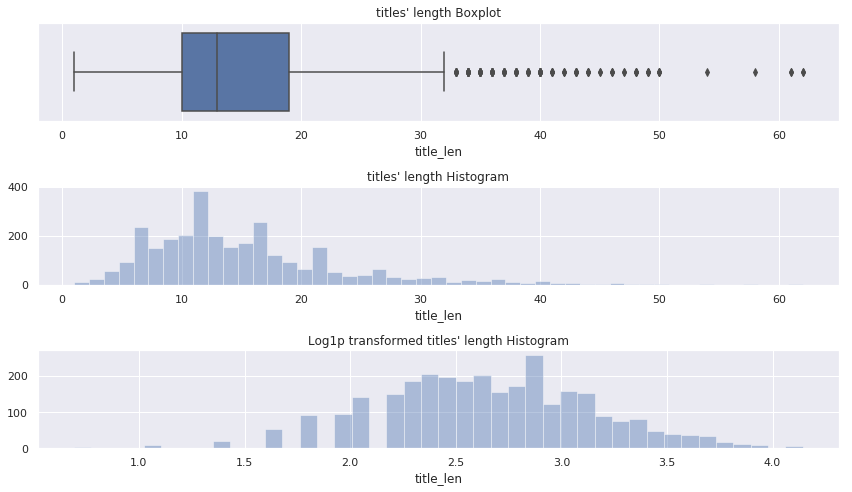

In [251]:
train_df["title"] = train_df["title"].fillna("")
test_df["title"] = test_df["title"].fillna("")

train_df["title_len"] = train_df["title"].apply(len)
test_df["title_len"] = test_df["title"].apply(len)

f, ax = plt.subplots(3, figsize=(12,7))
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train_df.title_len, ax = ax[0])
ax[0].set_title("titles' length Boxplot")
sns.distplot(a=train_df.title_len, kde = False, ax = ax[1])
ax[1].set_title("titles' length Histogram")
sns.distplot(a=np.log1p(train_df.title_len), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed titles' length Histogram")
f.tight_layout()

train_df["log_title_len"] = np.log1p(train_df.title_len)
test_df["log_title_len"] = np.log1p(test_df.title_len)

#### Overview
Lets visualize movies' overview wordcloud

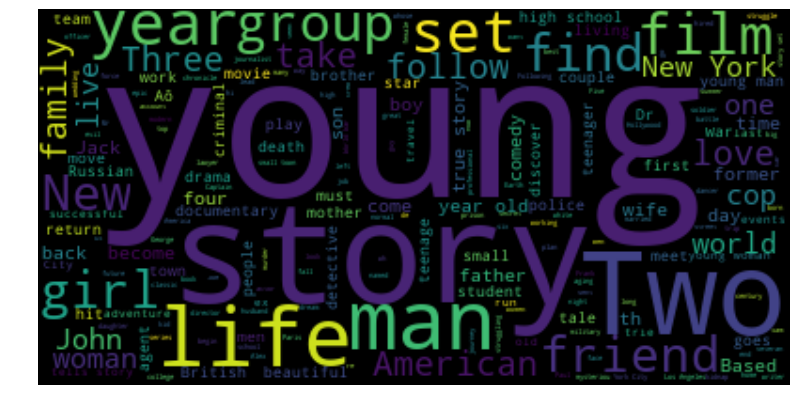

In [252]:
wordcloud = WordCloud().generate(train_df.overview.to_string())

sns.set(rc={'figure.figsize':(12,8)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Inspecting movies' overview length

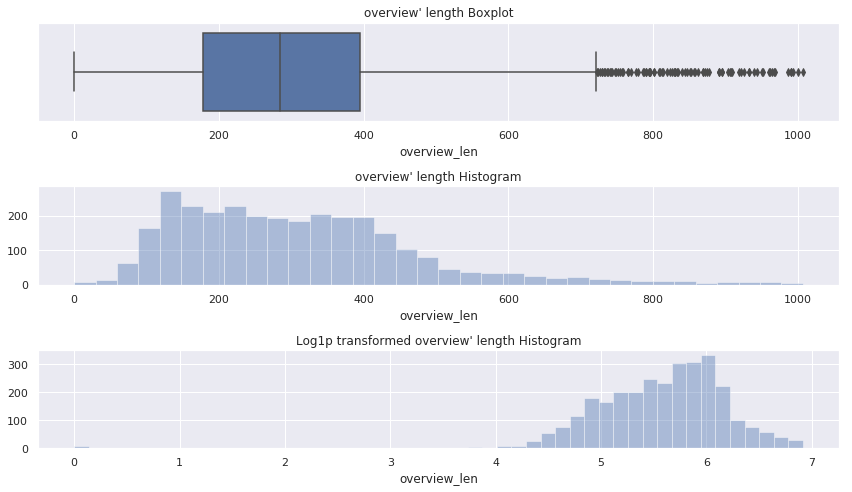

In [253]:
train_df["overview"] = train_df["overview"].fillna("")
test_df["overview"] = test_df["overview"].fillna("")

train_df["overview_len"] = train_df["overview"].apply(len)
test_df["overview_len"] = test_df["overview"].apply(len)

f, ax = plt.subplots(3, figsize=(12,7))
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train_df.overview_len, ax = ax[0])
ax[0].set_title("overview' length Boxplot")
sns.distplot(a=train_df.overview_len, kde = False, ax = ax[1])
ax[1].set_title("overview' length Histogram")
sns.distplot(a=np.log1p(train_df.overview_len), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed overview' length Histogram")
f.tight_layout()

train_df["log_overview_len"] = np.log1p(train_df.overview_len)
test_df["log_overview_len"] = np.log1p(test_df.overview_len)

#### Tagline

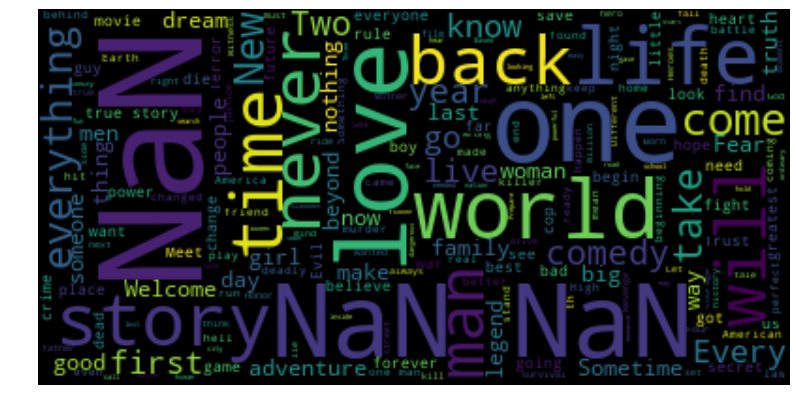

In [254]:
wordcloud = WordCloud().generate(train_df.tagline.to_string())

sns.set(rc={'figure.figsize':(12,8)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

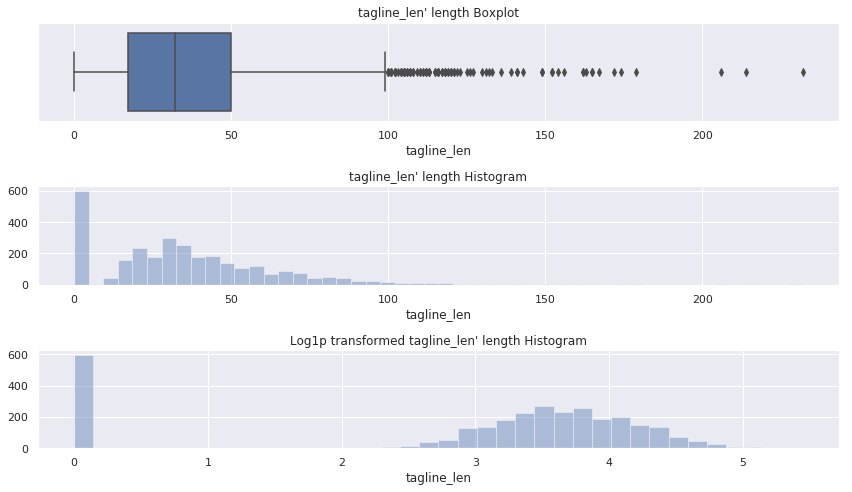

In [255]:
train_df["tagline"] = train_df["tagline"].fillna("")
test_df["tagline"] = test_df["tagline"].fillna("")

train_df["tagline_len"] = train_df["tagline"].apply(len)
test_df["tagline_len"] = test_df["tagline"].apply(len)

f, ax = plt.subplots(3, figsize=(12,7))
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train_df.tagline_len, ax = ax[0])
ax[0].set_title("tagline_len' length Boxplot")
sns.distplot(a=train_df.tagline_len, kde = False, ax = ax[1])
ax[1].set_title("tagline_len' length Histogram")
sns.distplot(a=np.log1p(train_df.tagline_len), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed tagline_len' length Histogram")
f.tight_layout()

train_df["log_tagline_len"] = np.log1p(train_df.tagline_len)
test_df["log_tagline_len"] = np.log1p(test_df.tagline_len)

#### Budget

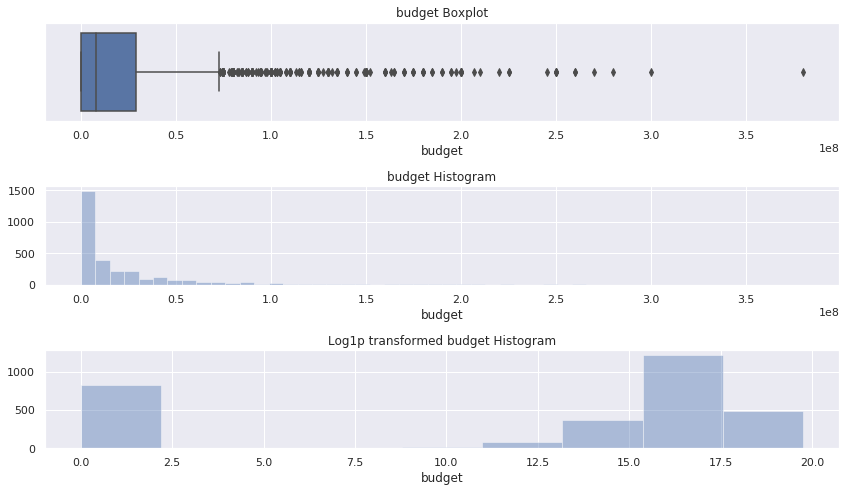

In [256]:
f, ax = plt.subplots(3, figsize=(12,7))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train_df.budget, ax = ax[0])
ax[0].set_title("budget Boxplot")
sns.distplot(a=train_df.budget, kde = False, ax = ax[1])
ax[1].set_title("budget Histogram")
sns.distplot(a=np.log1p(train_df.budget), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed budget Histogram")
f.tight_layout()

train_df["log_budget"] = np.log1p(train_df.budget)
test_df["log_budget"] = np.log1p(test_df.budget)

#### Genres

Text(0.5, 1.0, 'Number of films per genre')

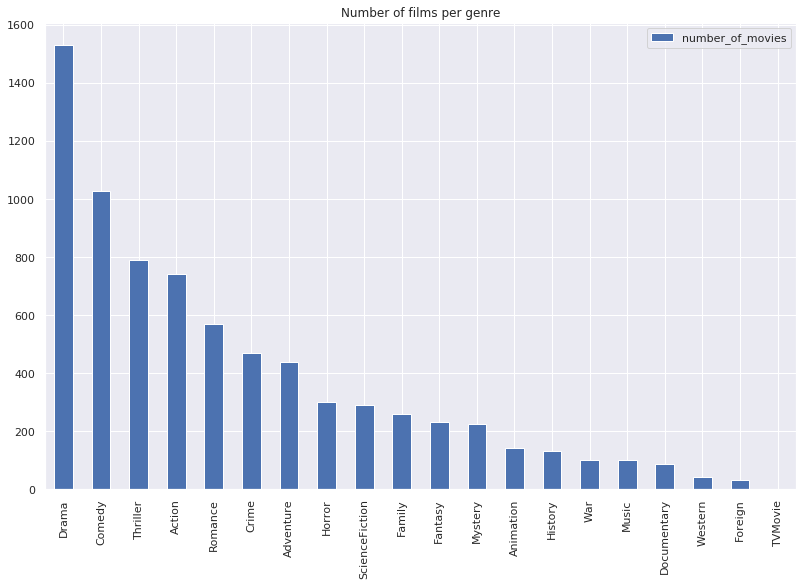

In [257]:
def genres_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace('\'','').replace(' ','').replace("name", "").replace("id", "").replace(":", "")
    ll = str1.split(",")[1::2]
    return ll

train_df["genres_processed"] = train_df.genres.apply(lambda elem: genres_preprocessing(elem))
test_df["genres_processed"] = test_df.genres.apply(lambda elem: genres_preprocessing(elem))

genres_dict = dict()

for genre in train_df["genres_processed"]:
    for elem in genre:
        if elem not in genres_dict:
            genres_dict[elem] = 1
        else:
            genres_dict[elem] += 1


sns.set(rc={'figure.figsize':(12,8)})
genres_df = pd.DataFrame.from_dict(genres_dict, orient='index')
genres_df.columns = ["number_of_movies"]
genres_df = genres_df.sort_values(by="number_of_movies", ascending=False)
genres_df.plot.bar()
plt.title("Number of films per genre")

#### Number of Genres

Text(0.5, 1.0, 'Number of films with more than 1 genre')

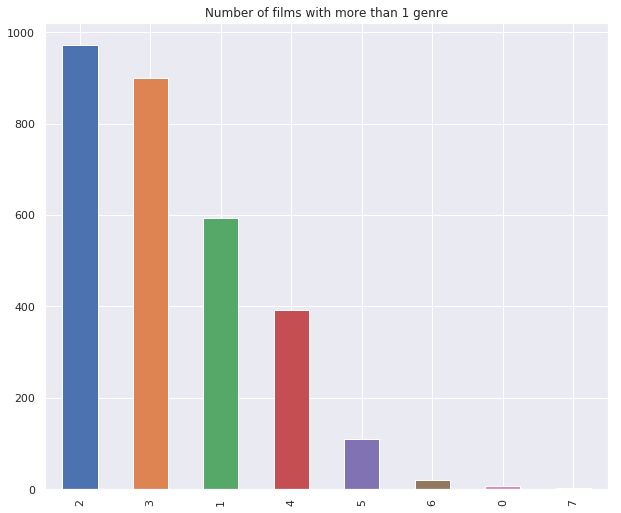

In [258]:
sns.set(rc={'figure.figsize':(9,8)})
train_df['num_genres'] = train_df['genres_processed'].apply(lambda x: len(x) if x != {} else 0)
test_df['num_genres'] = test_df['genres_processed'].apply(lambda x: len(x) if x != {} else 0)

train_df['num_genres'].value_counts().plot.bar()
plt.title("Number of films with more than 1 genre")

#### isGenre, feature engineering, creating new feature
isDrama, isComedy etc.

In [259]:
genres_df.index.values
for g in genres_df.index.values:
    train_df['isGenre_' + g] = train_df['genres_processed'].apply(lambda x: 1 if g in x else 0)
    test_df['isGenre_' + g] = test_df['genres_processed'].apply(lambda x: 1 if g in x else 0)

In [260]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_revenue', 'title_len', 'log_title_len', 'overview_len',
       'log_overview_len', 'tagline_len', 'log_tagline_len', 'log_budget',
       'genres_processed', 'num_genres', 'isGenre_Drama', 'isGenre_Comedy',
       'isGenre_Thriller', 'isGenre_Action', 'isGenre_Romance',
       'isGenre_Crime', 'isGenre_Adventure', 'isGenre_Horror',
       'isGenre_ScienceFiction', 'isGenre_Family', 'isGenre_Fantasy',
       'isGenre_Mystery', 'isGenre_Animation', 'isGenre_History',
       'isGenre_War', 'isGenre_Music', 'isGenre_Documentary',
       'isGenre_Western', 'isGenre_Foreign', 'isGenre_TVMovie'],
      dtype='object')

#### Original Language

Text(0.5, 1.0, 'Number of films per language')

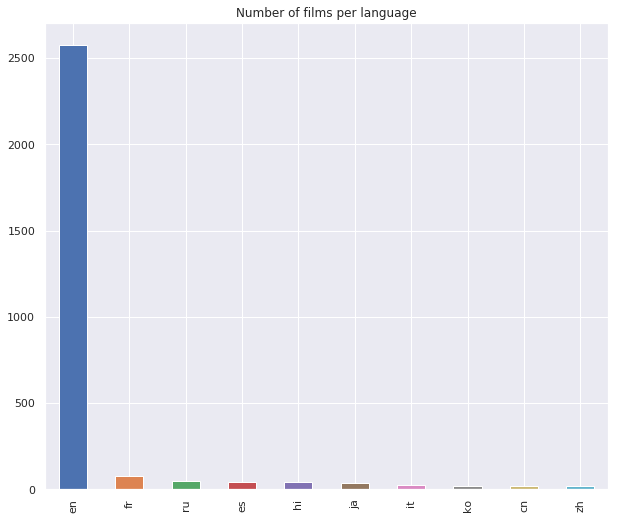

In [261]:
train_df.original_language.value_counts()[:10].plot.bar()
plt.title("Number of films per language")

#### English and Non-English movies

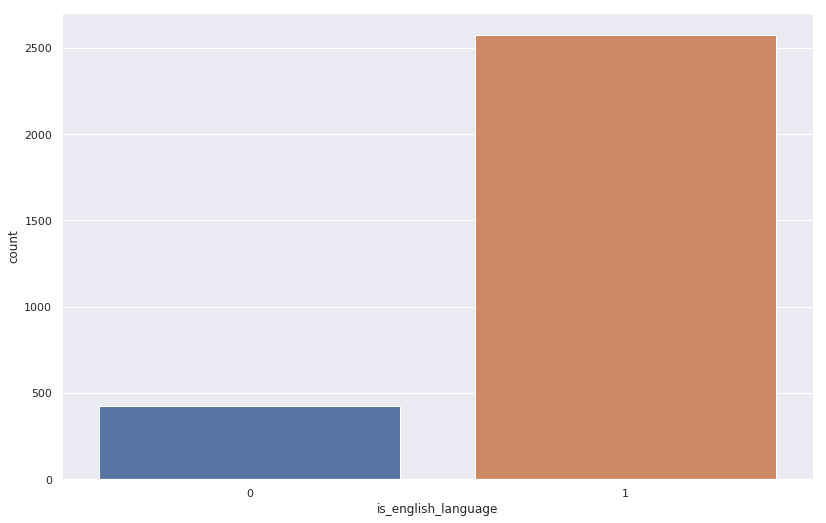

In [262]:

train_df["is_english_language"] = train_df.original_language.apply(lambda x: 1 if x == "en" else 0)
test_df["is_english_language"] = test_df.original_language.apply(lambda x: 1 if x == "en" else 0)

train_df.is_english_language = train_df.is_english_language.fillna(1)
test_df.is_english_language = test_df.is_english_language.fillna(1)

sns.set(rc={'figure.figsize':(12,8)})
ax = sns.countplot(x="is_english_language", data=train_df)

#### Production Companies

Text(0.5, 1.0, 'Number of films per production company')

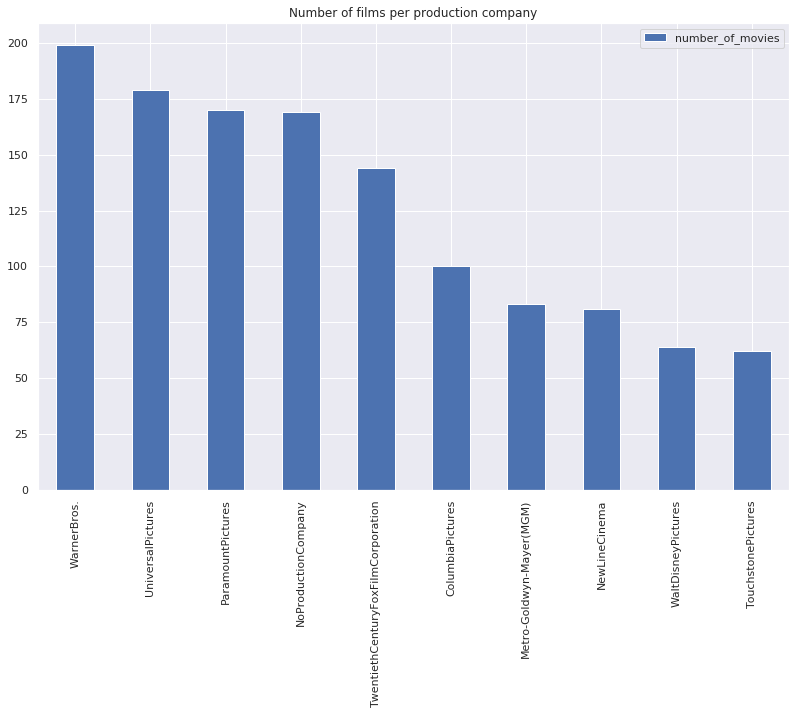

In [263]:
def production_companies_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("id", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

train_df["production_companies"] = train_df.production_companies.fillna('NoProductionCompany')
train_df["production_companies"] = test_df.production_companies.fillna('NoProductionCompany')

train_df["production_companies_processed"] = train_df.production_companies.apply(lambda elem: production_companies_preprocessing(elem))
test_df["production_companies_processed"] = test_df.production_companies.apply(lambda elem: production_companies_preprocessing(elem))



production_companies_dict = dict()

for production_company in train_df["production_companies_processed"]:
    for elem in production_company:
        if elem not in production_companies_dict:
            production_companies_dict[elem] = 1
        else:
            production_companies_dict[elem] += 1


sns.set(rc={'figure.figsize':(12,8)})
production_companies_df = pd.DataFrame.from_dict(production_companies_dict, orient='index')
production_companies_df.columns = ["number_of_movies"]
production_companies_df = production_companies_df.sort_values(by="number_of_movies", ascending=False)
production_companies_df.head(10).plot.bar()
plt.title("Number of films per production company")

#### Number of Production Companies

Text(0.5, 1.0, 'Number of multiple production companies per movie')

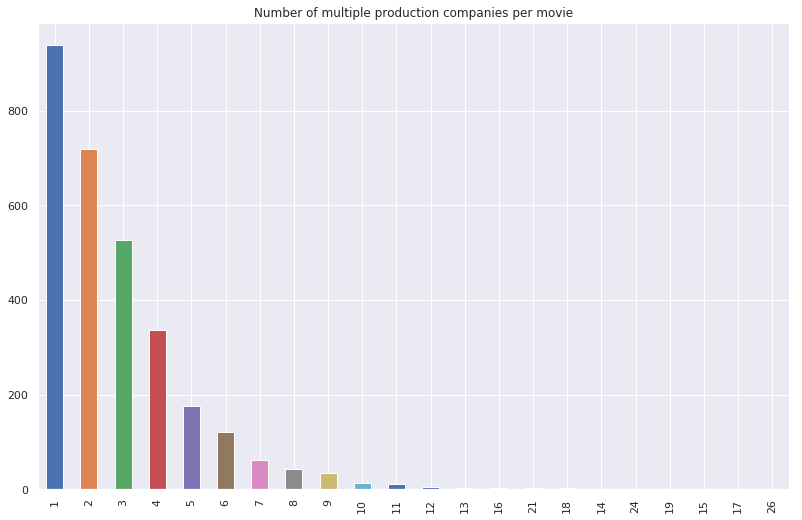

In [264]:
train_df["num_of_production_companies"] = train_df.production_companies_processed.apply(len)
test_df["num_of_production_companies"] = test_df.production_companies_processed.apply(len)

train_df["num_of_production_companies"].value_counts().plot.bar()
plt.title("Number of multiple production companies per movie")

#### isProductionCompany feature engineering
Feature Engineering with all the production companies

In [265]:
for g in production_companies_df.index.values:
    train_df['isProductionCompany_' + g] = train_df['production_companies_processed'].apply(lambda x: 1 if g in x else 0)
    test_df['isProductionCompany_' + g] = test_df['production_companies_processed'].apply(lambda x: 1 if g in x else 0)

#### production_countries

Text(0.5, 1.0, 'Number of films per production country')

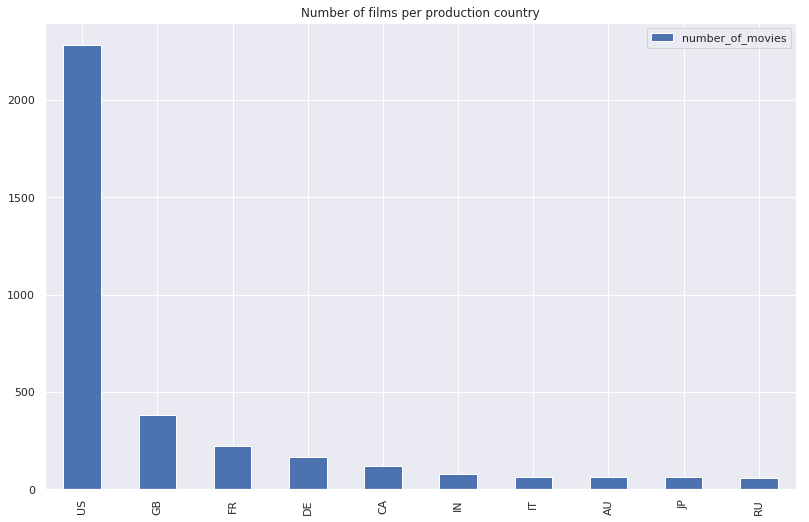

In [266]:
def production_countries_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("iso_3166_1", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

train_df["production_countries_processed"] = train_df.production_countries.fillna("NaN").apply(lambda elem: production_countries_preprocessing(elem))
test_df["production_countries_processed"] = test_df.production_countries.fillna("NaN").apply(lambda elem: production_countries_preprocessing(elem))


production_countries_dict = dict()

for production_country in train_df["production_countries_processed"]:
    for elem in production_country:
        if elem not in production_countries_dict:
            production_countries_dict[elem] = 1
        else:
            production_countries_dict[elem] += 1



production_countries_df = pd.DataFrame.from_dict(production_countries_dict, orient='index')
production_countries_df.columns = ["number_of_movies"]
production_countries_df = production_countries_df.sort_values(by="number_of_movies", ascending=False)
production_countries_df.head(10).plot.bar()
plt.title("Number of films per production country")

#### isProduction_country feature engineering

In [267]:
for c in production_countries_df.index.values:
    train_df['isProductionCountry_' + c] = train_df['production_countries_processed'].apply(lambda x: 1 if c in x else 0)
    test_df['isProductionCountry_' + c] = test_df['production_countries_processed'].apply(lambda x: 1 if c in x else 0)

#### popularity

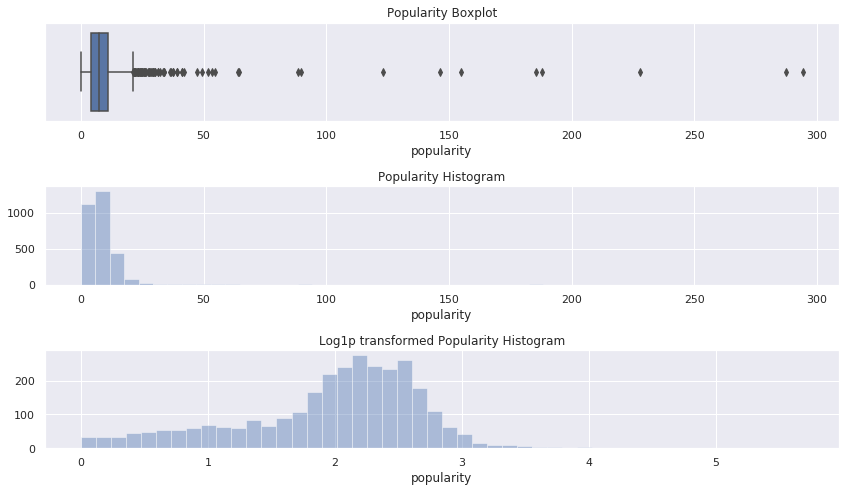

In [268]:
f, ax = plt.subplots(3, figsize=(12,7))
sns.boxplot(x=train_df.popularity, ax = ax[0])
ax[0].set_title("Popularity Boxplot")
sns.distplot(a=train_df.popularity, kde = False, ax = ax[1])
ax[1].set_title("Popularity Histogram")
sns.distplot(a=np.log1p(train_df.popularity), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed Popularity Histogram")
f.tight_layout()

train_df["log_popularity"] = np.log1p(train_df.popularity)
test_df["log_popularity"] = np.log1p(test_df.popularity)

#### Runtime

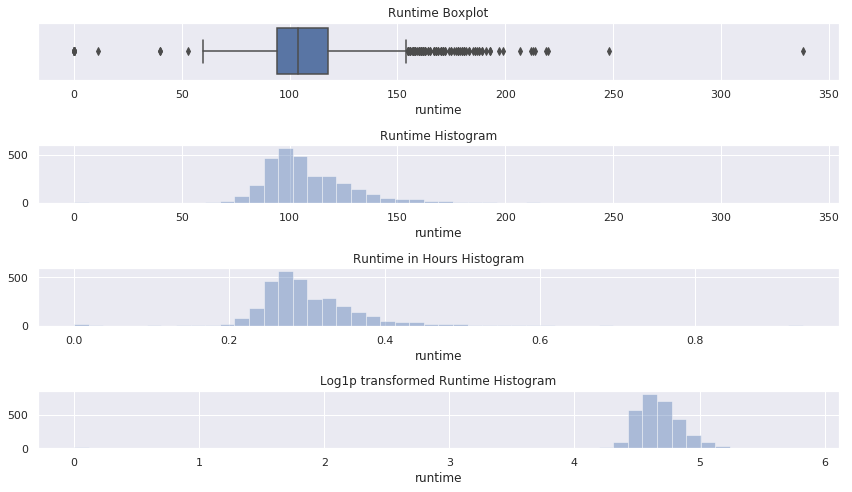

In [269]:
train_df["runtime"] = train_df["runtime"].fillna(train_df["runtime"].mode()[0])
test_df["runtime"] = test_df["runtime"].fillna(test_df["runtime"].mode()[0])

f, ax = plt.subplots(4, figsize=(12,7))

train_df.runtime = train_df.runtime.fillna(train_df.runtime.mode())

sns.boxplot(x=train_df.runtime, ax = ax[0])
ax[0].set_title("Runtime Boxplot")
sns.distplot(a=train_df.runtime, kde = False, ax = ax[1])
ax[1].set_title("Runtime Histogram")
sns.distplot(a=train_df.runtime/360, kde = False, ax = ax[2])
ax[2].set_title("Runtime in Hours Histogram")
sns.distplot(a=np.log1p(train_df.runtime), kde = False, ax = ax[3])
ax[3].set_title("Log1p transformed Runtime Histogram")
f.tight_layout()

train_df["runtime_in_hours"] = train_df.runtime/360
test_df["runtime_in_hours"] = test_df.runtime/360

train_df["log_runtime"] = np.log1p(train_df.runtime)
test_df["log_runtime"] = np.log1p(test_df.runtime)

#### Release Date preprocessing before EDA and ML

In [270]:
from datetime import datetime

# fill possible NA values with the statistical mode
train_df["release_date"] = train_df["release_date"].fillna(train_df["release_date"].mode()[0])
test_df["release_date"] = test_df["release_date"].fillna(test_df["release_date"].mode()[0])


train_df['temp'] = train_df.release_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

train_df["month"] = train_df.temp.apply(lambda x: x.month)
train_df["season"] = train_df["month"]%4
train_df["year"] = train_df.temp.apply(lambda x: x.year)
train_df["day_of_week"] = train_df.temp.apply(lambda x: x.weekday()+1)
train_df["week_of_year"] = train_df.temp.apply(lambda x: x.isocalendar()[1])

train_df = train_df.drop(['temp'], axis=1)


test_df['temp'] = test_df.release_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

test_df["month"] = test_df.temp.apply(lambda x: x.month)
test_df["season"] = test_df["month"]%4
test_df["year"] = test_df.temp.apply(lambda x: x.year)
test_df["day_of_week"] = test_df.temp.apply(lambda x: x.weekday()+1)
test_df["week_of_year"] = test_df.temp.apply(lambda x: x.isocalendar()[1])

test_df = test_df.drop(['temp'], axis=1)



train_df["day_of_week"] = train_df["day_of_week"].fillna(train_df["day_of_week"].mode()[0])
test_df["day_of_week"] = test_df["day_of_week"].fillna(test_df["day_of_week"].mode()[0])

train_df["year"] = train_df["year"].fillna(train_df["year"].mode()[0])
test_df["year"] = test_df["year"].fillna(test_df["year"].mode()[0])

train_df["month"] = train_df["month"].fillna(train_df["month"].mode()[0])
test_df["month"] = test_df["month"].fillna(test_df["month"].mode()[0])

train_df["week_of_year"] = train_df["week_of_year"].fillna(train_df["week_of_year"].mode()[0])
test_df["week_of_year"] = test_df["week_of_year"].fillna(test_df["week_of_year"].mode()[0])

train_df["season"] = train_df["season"].fillna(train_df["season"].mode()[0])
test_df["season"] = test_df["season"].fillna(test_df["season"].mode()[0])

train_df[["release_date", "month", "year", "day_of_week", "week_of_year", "season"]].head()

release_date  month  year  day_of_week  week_of_year  season
0      2/20/15      2  2015            5             8       2
1       8/6/04      8  2004            5            32       0
2     10/10/14     10  2014            5            41       2
3       3/9/12      3  2012            5            10       3
4       2/5/09      2  2009            4             6       2

#### Month of Release, which month has most of the releases

Text(0.5, 1.0, 'Number of films per month')

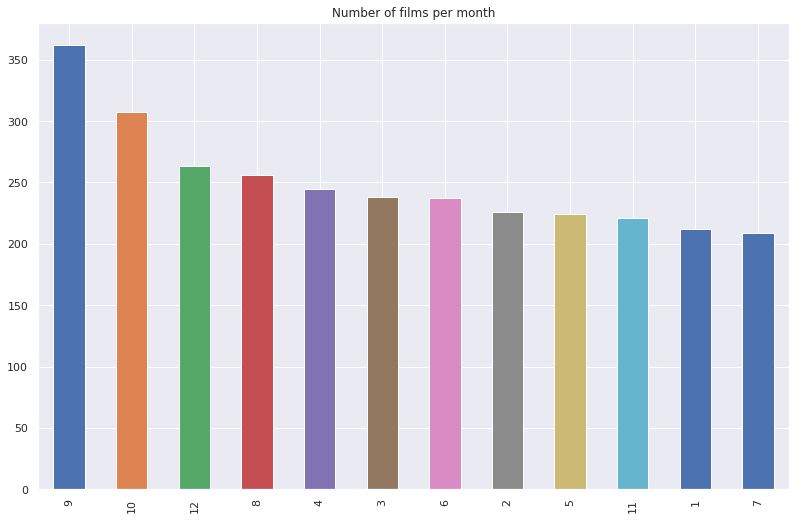

In [271]:
sns.set(rc={'figure.figsize':(12,8)})
train_df.month.value_counts().plot.bar()
plt.title('Number of films per month')

#### Week of year, which week of the year has most of the releases

Text(0.5, 1.0, 'Number of films per week_of_year')

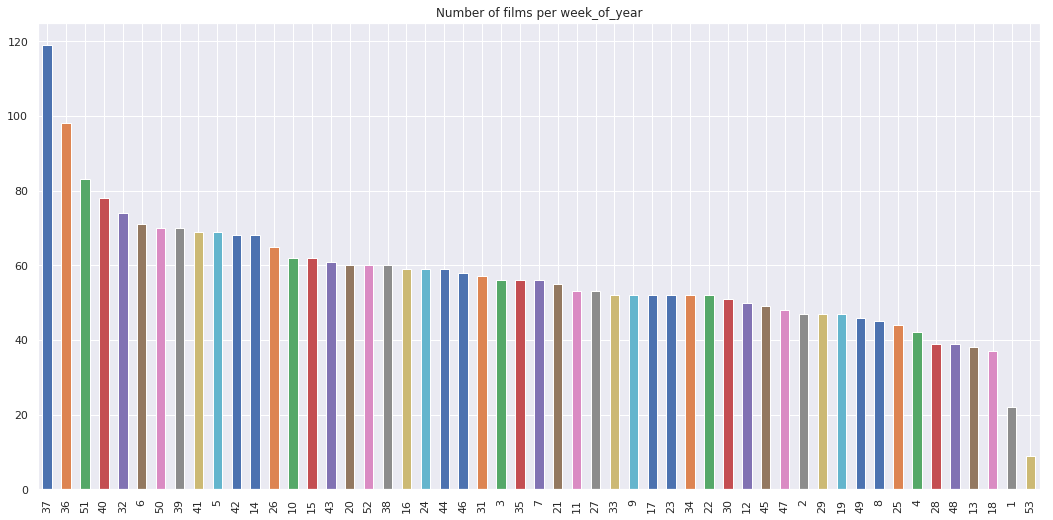

In [272]:
sns.set(rc={'figure.figsize':(16,8)})
train_df.week_of_year.value_counts().plot.bar()
plt.title('Number of films per week_of_year')

#### Season of Release, which season has most of the releases

Text(0.5, 1.0, 'Number of films per season')

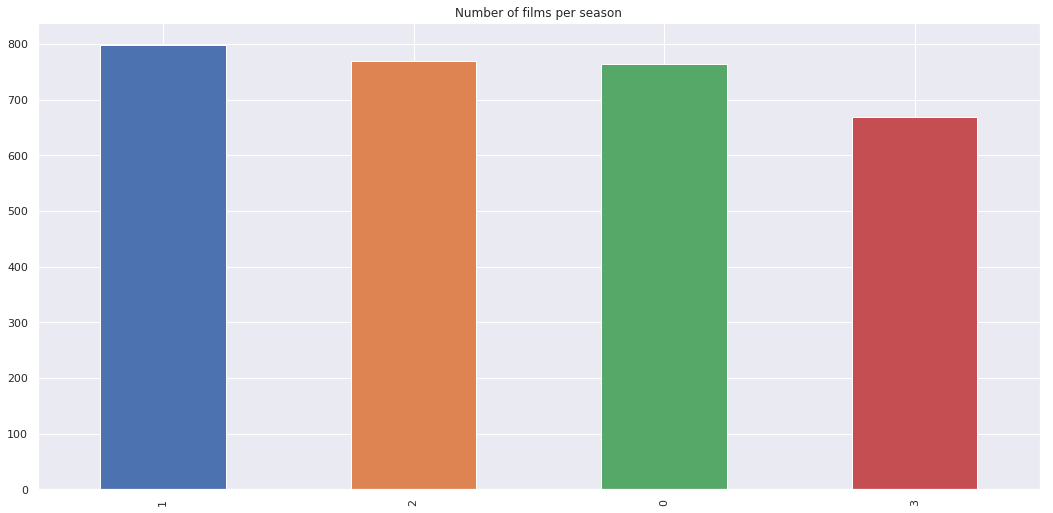

In [273]:
sns.set(rc={'figure.figsize':(16,8)})
train_df.season.value_counts().plot.bar()
plt.title('Number of films per season')

#### Day of Release, which day of the week has most of the releases

Text(0.5, 1.0, 'Number of films per day_of_week')

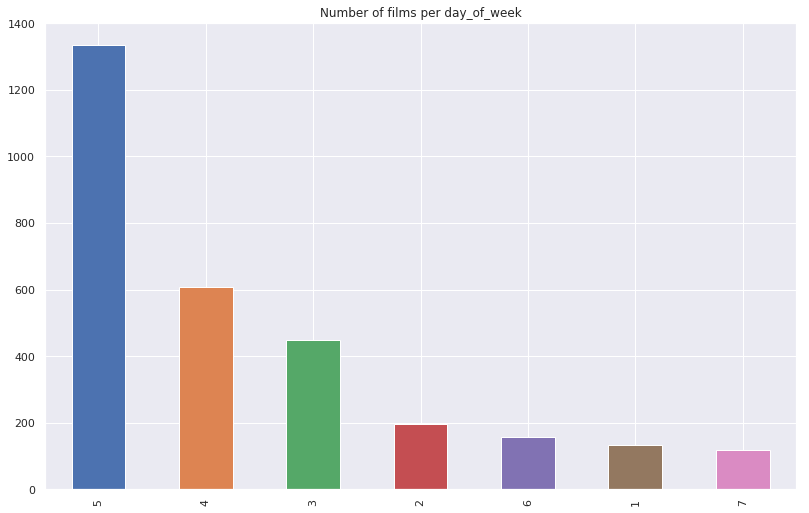

In [274]:
sns.set(rc={'figure.figsize':(12,8)})
train_df.day_of_week.value_counts().plot.bar()
plt.title('Number of films per day_of_week')

#### Year of Release, which year has most of the releases

Text(0.5, 1.0, 'Number of films per year')

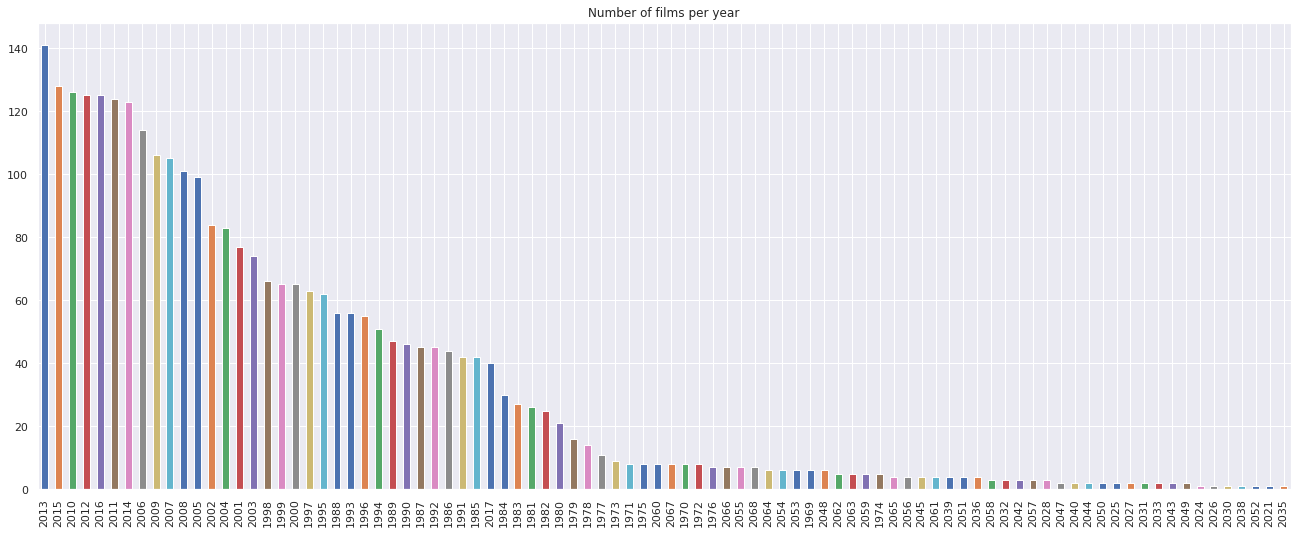

In [275]:
sns.set(rc={'figure.figsize':(20,8)})
train_df.year.value_counts().plot.bar()
plt.title('Number of films per year')

#### Identifying top actors in movies based on mean movies' revenue

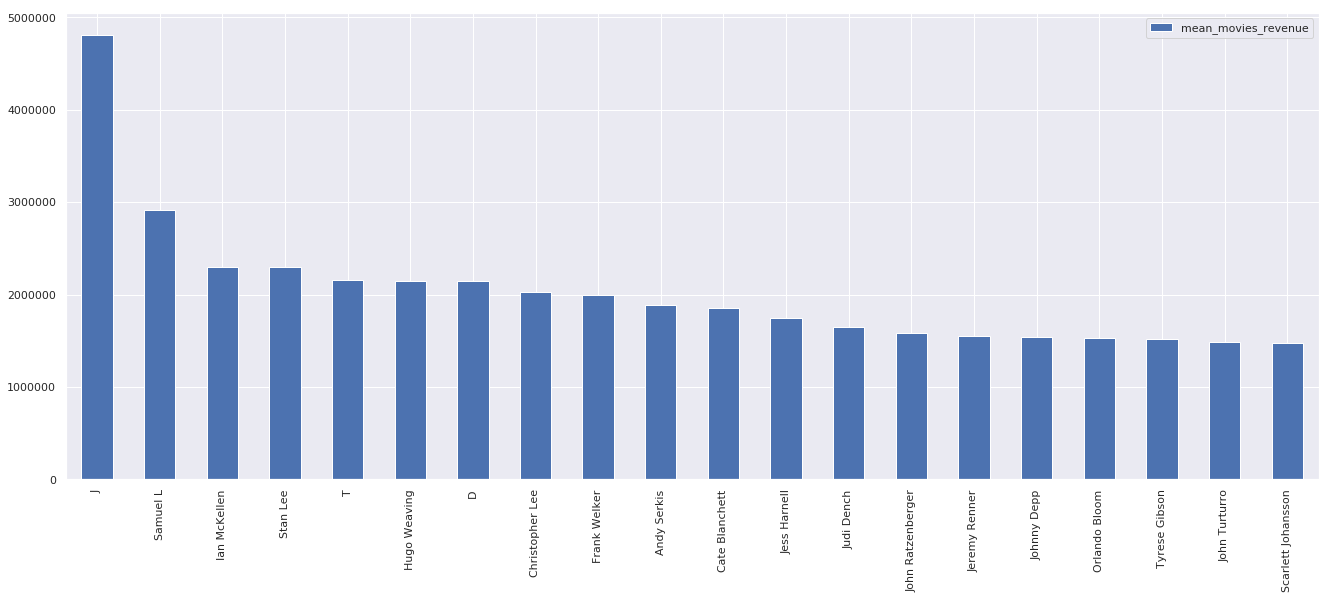

In [276]:
import re

actors_dict = {}
size_of_actors = len(train_df) - train_df.cast.isna().sum()

for element in train_df[["revenue", "cast"]].values:
    if type(element[1]) == type(str()):
        
        result = re.findall('name\': \'\w+\s*\w*', element[1])
        result = [x.replace("name\': \'", "") for x in result]

        for actor in result:
            if actor not in actors_dict:
                actors_dict[actor] = element[0]
            else:
                actors_dict[actor] += element[0]
                
for actor in actors_dict:
    actors_dict[actor] = actors_dict[actor]/size_of_actors
    


actors_df = pd.DataFrame.from_dict(actors_dict, orient='index', columns=["mean_movies_revenue"])
actors_df.sort_values(by="mean_movies_revenue", ascending=False).head(20).plot.bar()

#### feature engineering, creating the has_top_actor columns

In [277]:
def find_top_actor_from_cast(top_actor, element):
    
    result = []
    if type(element) == type(str()):

        result = re.findall('name\': \'\w+\s*\w*', element)
        result = [x.replace("name\': \'", "") for x in result]
        
    if top_actor in result:
        return 1
    else:
        return 0

for top_actor in actors_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).index.values:
    train_df["has_top_actor_"+ top_actor] = train_df.cast.apply(lambda element: find_top_actor_from_cast(top_actor, element))
    test_df["has_top_actor_"+ top_actor] = test_df.cast.apply(lambda element: find_top_actor_from_cast(top_actor, element))

#### Identifying the top keywords based on mean movie revenue

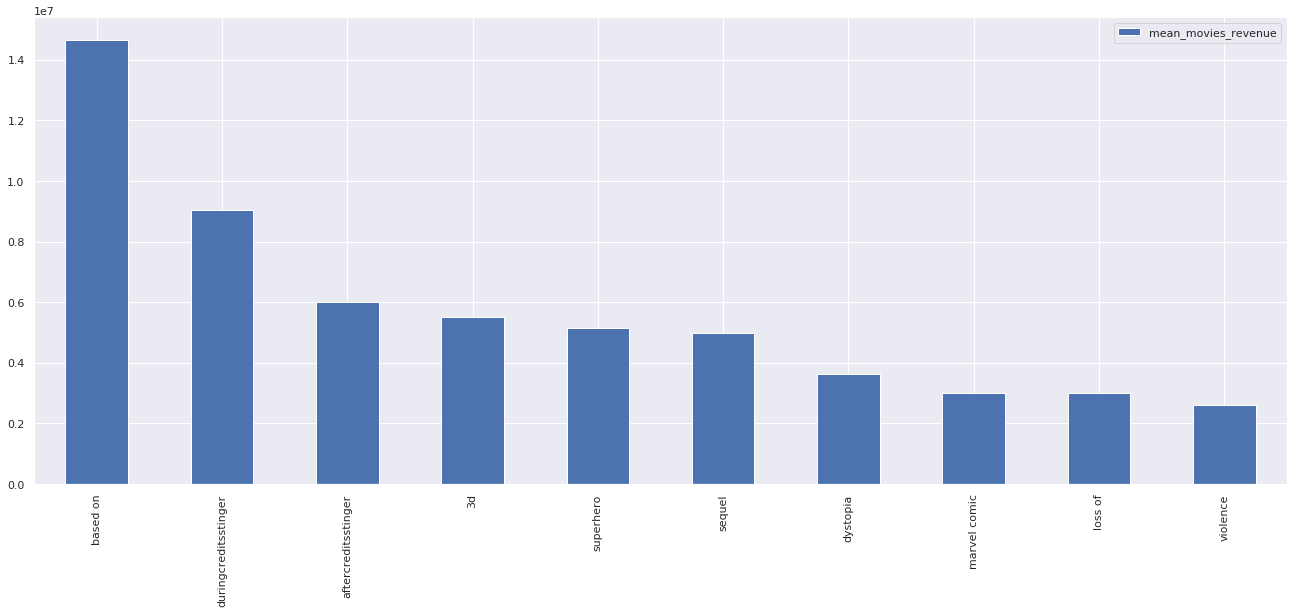

In [278]:
import re

keywords_dict = {}
size_of_keywords = len(train_df) - train_df.Keywords.isna().sum()

for element in train_df[["revenue", "Keywords"]].values:
    if type(element[1]) == type(str()):
        
        result = re.findall('name\': \'\w+\s*\w*', element[1])
        result = [x.replace("name\': \'", "") for x in result]

        for key in result:
            if key not in keywords_dict:
                keywords_dict[key] = element[0]
            else:
                keywords_dict[key] += element[0]
                
for key in keywords_dict:
    keywords_dict[key] = keywords_dict[key]/size_of_keywords
    
keywords_df = pd.DataFrame.from_dict(keywords_dict, orient='index', columns=["mean_movies_revenue"])
keywords_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).plot.bar()

#### feature engineering has_top_keyword based on mean movies' revenue

In [279]:
def find_top_keywords_from_cast(top_keyword, element):
    
    result = []
    if type(element) == type(str()):

        result = re.findall('name\': \'\w+\s*\w*', element)
        result = [x.replace("name\': \'", "") for x in result]
        
    if top_keyword in result:
        return 1
    else:
        return 0

for top_keyword in keywords_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).index.values:
    train_df["has_top_keyword_"+ top_keyword] = train_df.Keywords.apply(lambda element: find_top_keywords_from_cast(top_keyword, element))
    test_df["has_top_keyword_"+ top_keyword] = test_df.Keywords.apply(lambda element: find_top_keywords_from_cast(top_keyword, element))

#### Cast
Number of cast

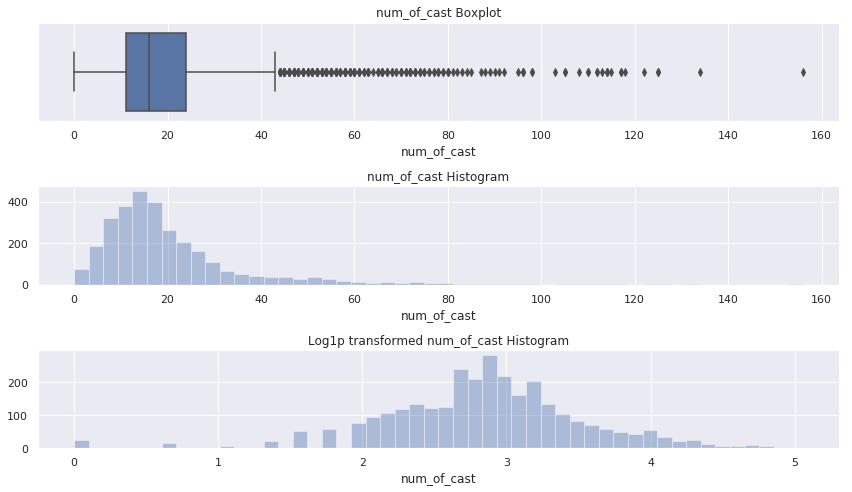

In [280]:
train_df["num_of_cast"] = train_df["cast"].str.count("name")
test_df["num_of_cast"] = test_df["cast"].str.count("name")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_cast = train_df.num_of_cast.fillna(0)
test_df.num_of_cast = test_df.num_of_cast.fillna(0)

sns.boxplot(x=train_df.num_of_cast, ax = ax[0])
ax[0].set_title("num_of_cast Boxplot")
sns.distplot(a=train_df.num_of_cast, kde = False, ax = ax[1])
ax[1].set_title("num_of_cast Histogram")
sns.distplot(a=np.log1p(train_df.num_of_cast), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_cast Histogram")
f.tight_layout()


train_df["log_num_of_cast"] = np.log1p(train_df.num_of_cast)
test_df["log_num_of_cast"] = np.log1p(test_df.num_of_cast)

#### Male cast
number of male cast

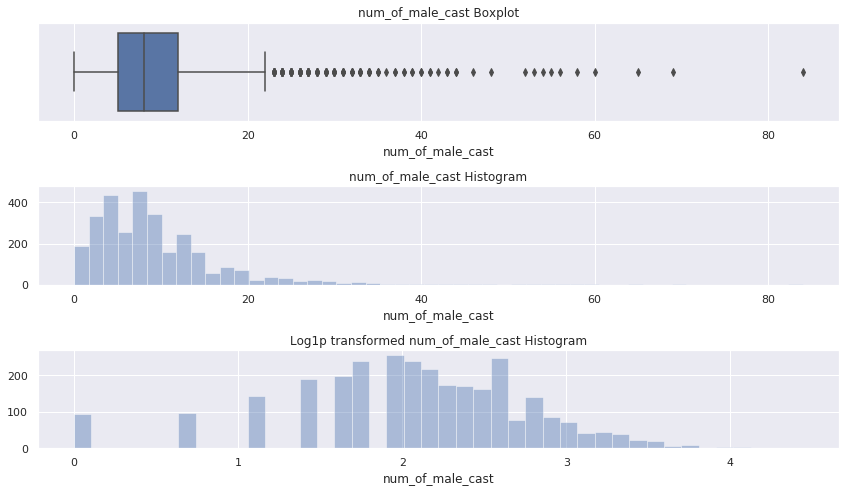

In [281]:
train_df["num_of_male_cast"] = train_df["cast"].str.count("'gender': 2")
test_df["num_of_male_cast"] = test_df["cast"].str.count("'gender': 2")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_male_cast = train_df.num_of_male_cast.fillna(0)
test_df.num_of_male_cast = test_df.num_of_male_cast.fillna(0)

sns.boxplot(x=train_df.num_of_male_cast, ax = ax[0])
ax[0].set_title("num_of_male_cast Boxplot")
sns.distplot(a=train_df.num_of_male_cast, kde = False, ax = ax[1])
ax[1].set_title("num_of_male_cast Histogram")
sns.distplot(a=np.log1p(train_df.num_of_male_cast), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_male_cast Histogram")
f.tight_layout()


train_df["log_num_of_male_cast"] = np.log1p(train_df.num_of_male_cast)
test_df["log_num_of_male_cast"] = np.log1p(test_df.num_of_male_cast)

#### Female cast
number of female cast

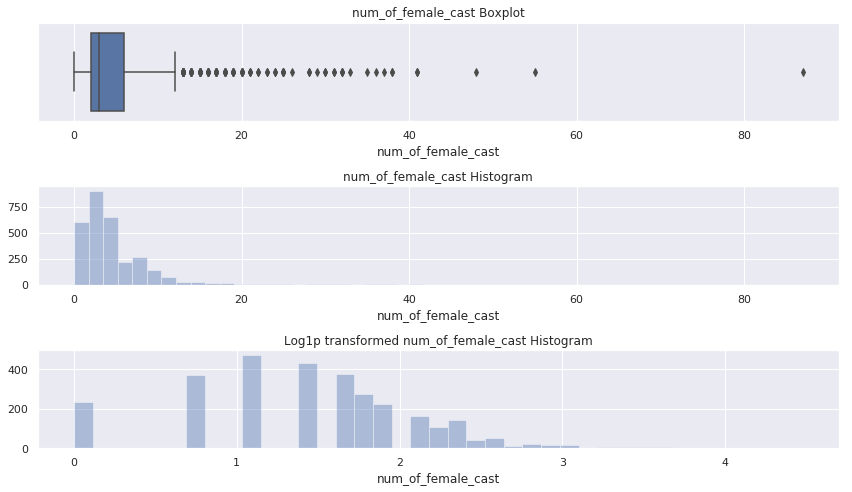

In [282]:
train_df["num_of_female_cast"] = train_df["cast"].str.count("'gender': 1")
test_df["num_of_female_cast"] = test_df["cast"].str.count("'gender': 1")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_female_cast = train_df.num_of_female_cast.fillna(0)
test_df.num_of_female_cast = test_df.num_of_female_cast.fillna(0)

sns.boxplot(x=train_df.num_of_female_cast, ax = ax[0])
ax[0].set_title("num_of_female_cast Boxplot")
sns.distplot(a=train_df.num_of_female_cast, kde = False, ax = ax[1])
ax[1].set_title("num_of_female_cast Histogram")
sns.distplot(a=np.log1p(train_df.num_of_female_cast), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_female_cast Histogram")
f.tight_layout()


train_df["log_num_of_female_cast"] = np.log1p(train_df.num_of_female_cast)
test_df["log_num_of_female_cast"] = np.log1p(test_df.num_of_female_cast)

### Crew
Counting the number of crew

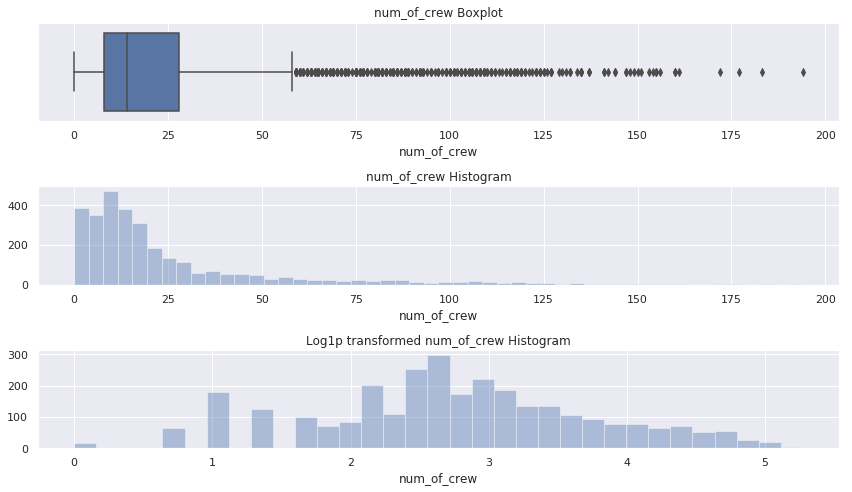

In [283]:
train_df["num_of_crew"] = train_df["crew"].str.count("'job")
test_df["num_of_crew"] = test_df["crew"].str.count("'job")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_crew = train_df.num_of_crew.fillna(0)
test_df.num_of_crew = test_df.num_of_crew.fillna(0)

sns.boxplot(x=train_df.num_of_crew, ax = ax[0])
ax[0].set_title("num_of_crew Boxplot")
sns.distplot(a=train_df.num_of_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_crew Histogram")
f.tight_layout()


train_df["log_num_of_crew"] = np.log1p(train_df.num_of_crew)
test_df["log_num_of_crew"] = np.log1p(test_df.num_of_crew)

### Male Crew
Counting the number of male crew

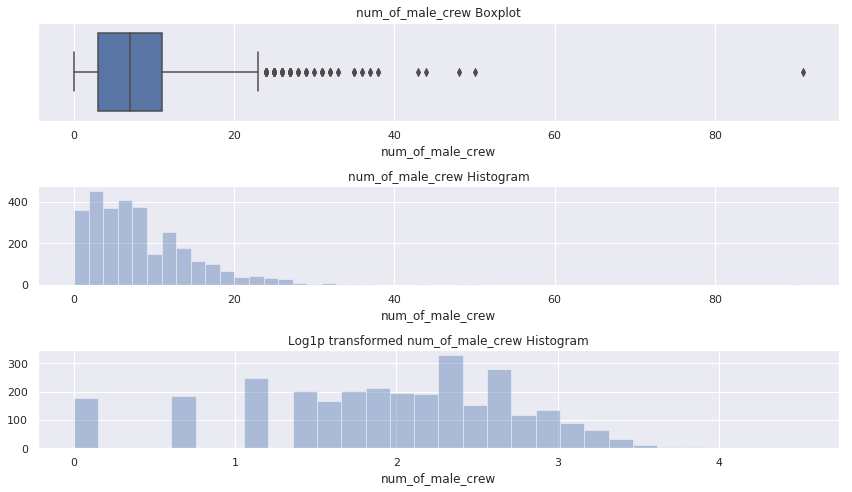

In [284]:
train_df["num_of_male_crew"] = train_df["crew"].str.count("'gender': 2")
test_df["num_of_male_crew"] = test_df["crew"].str.count("'gender': 2")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_male_crew = train_df.num_of_male_crew.fillna(0)
test_df.num_of_male_crew = test_df.num_of_crew.fillna(0)

sns.boxplot(x=train_df.num_of_male_crew, ax = ax[0])
ax[0].set_title("num_of_male_crew Boxplot")
sns.distplot(a=train_df.num_of_male_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_male_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_male_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_male_crew Histogram")
f.tight_layout()


train_df["log_num_of_male_crew"] = np.log1p(train_df.num_of_male_crew)
test_df["log_num_of_male_crew"] = np.log1p(test_df.num_of_male_crew)

### Female Crew
Counting the number of female crew

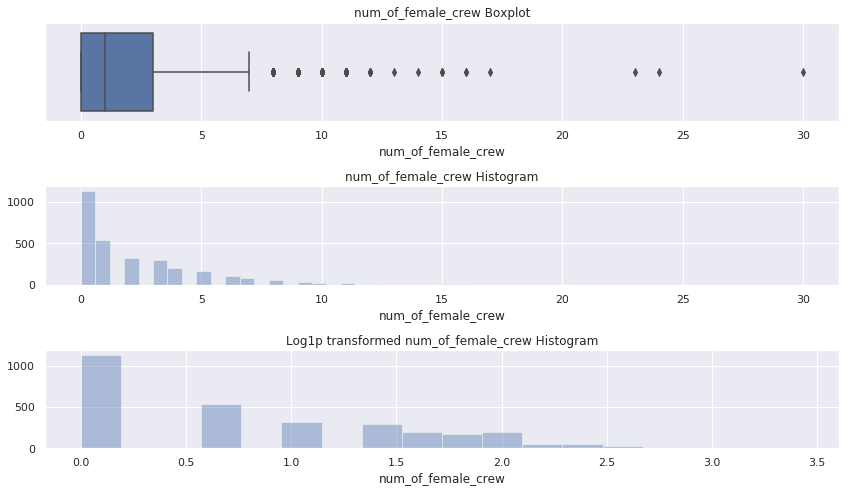

In [285]:
train_df["num_of_female_crew"] = train_df["crew"].str.count("'gender': 1")
test_df["num_of_female_crew"] = test_df["crew"].str.count("'gender': 1")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_female_crew = train_df.num_of_female_crew.fillna(0)
test_df.num_of_female_crew = test_df.num_of_female_crew.fillna(0)

sns.boxplot(x=train_df.num_of_female_crew, ax = ax[0])
ax[0].set_title("num_of_female_crew Boxplot")
sns.distplot(a=train_df.num_of_female_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_female_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_female_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_female_crew Histogram")
f.tight_layout()


train_df["log_num_of_female_crew"] = np.log1p(train_df.num_of_female_crew)
test_df["log_num_of_female_crew"] = np.log1p(test_df.num_of_female_crew)

### Identifying top directors based on average movie revenue

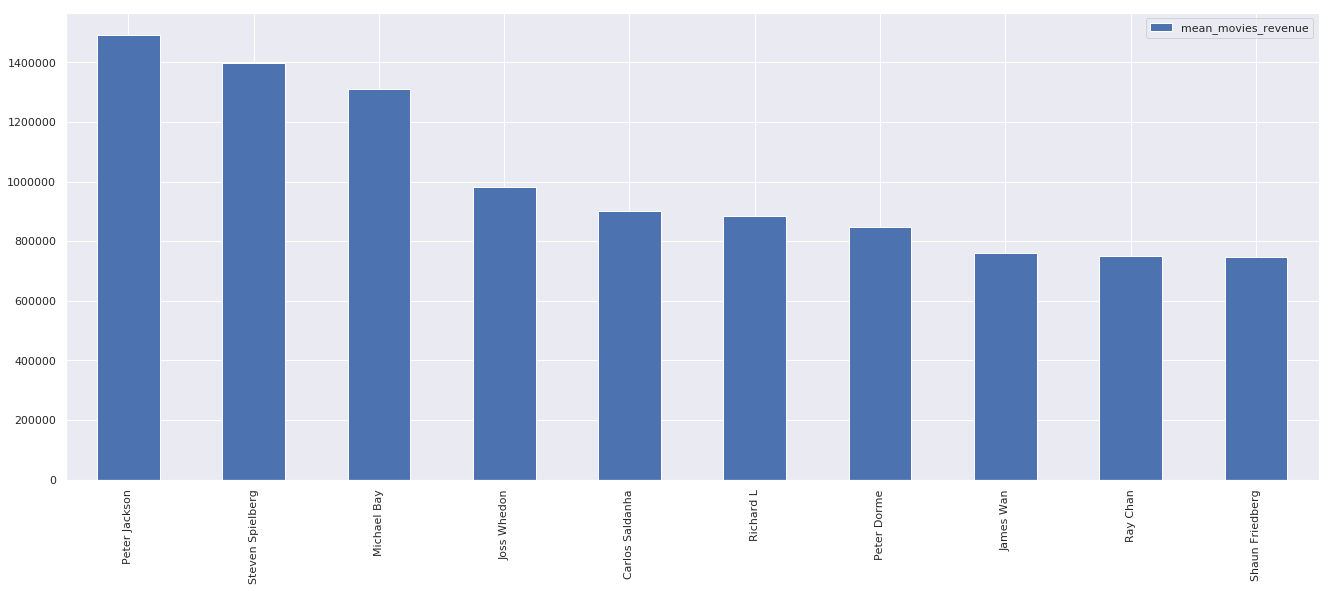

In [286]:
import re

directors_dict = {}
size_of_crew = len(train_df) - train_df.crew.isna().sum()

for element in train_df[["revenue", "crew"]].values:
    if type(element[1]) == type(str()):
        
        result = re.findall('Director\', \'name\': \'\w+\s*\w*', element[1])
        result = [x.replace("Director\', \'name\': \'", "") for x in result]

        for key in result:
            if key not in directors_dict:
                directors_dict[key] = element[0]
            else:
                directors_dict[key] += element[0]
                
for key in directors_dict:
    directors_dict[key] = directors_dict[key]/size_of_crew
    
directors_df = pd.DataFrame.from_dict(directors_dict, orient='index', columns=["mean_movies_revenue"])
directors_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).plot.bar()

### feature engineering, finding has_top_director in movies

In [287]:
def find_top_directors_from_crew(top_director, element):
    
    result = []
    if type(element) == type(str()):

        result = re.findall('Director\', \'name\': \'\w+\s*\w*', element)
        result = [x.replace("Director\', \'name\': \'", "") for x in result]
        
    if top_director in result:
        return 1
    else:
        return 0

for top_director in directors_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).index.values:
    train_df["has_top_director_"+ top_director] = train_df.crew.apply(lambda element: find_top_directors_from_crew(top_director, element))
    test_df["has_top_director_"+ top_director] = test_df.crew.apply(lambda element: find_top_directors_from_crew(top_director, element))

### Identifying top Producers based on average movie salary

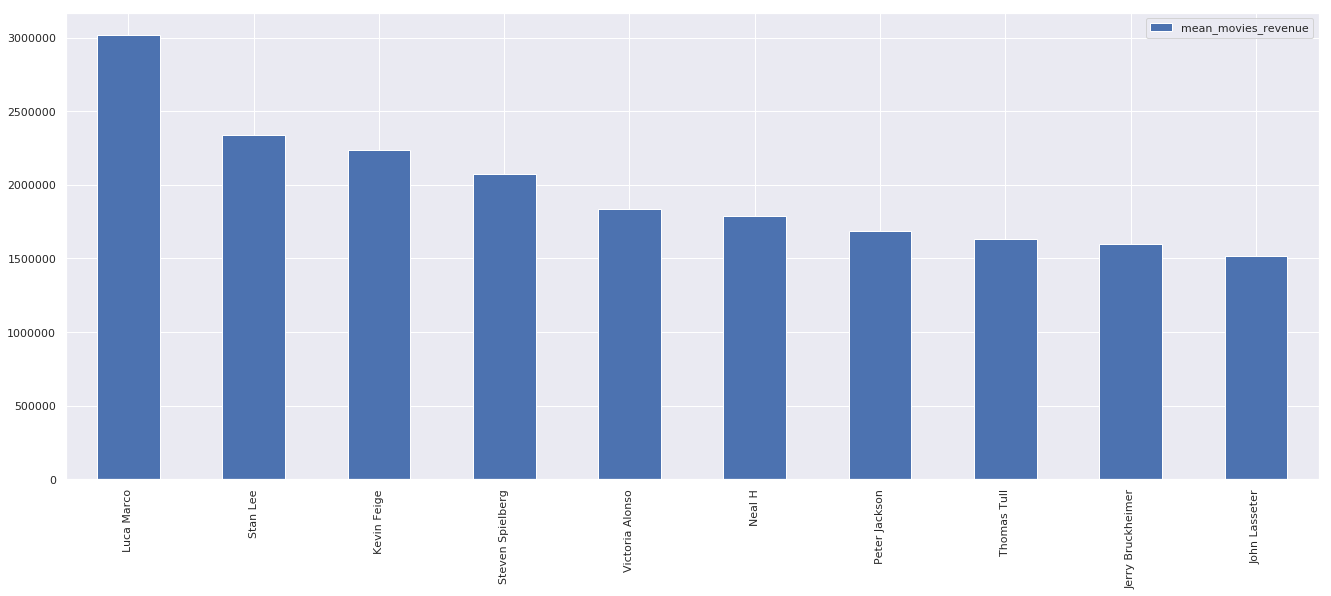

In [288]:
import re

producers_dict = {}
size_of_crew = len(train_df) - train_df.crew.isna().sum()

for element in train_df[["revenue", "crew"]].values:
    if type(element[1]) == type(str()):
        
        result = re.findall('Producer\', \'name\': \'\w+\s*\w*', element[1])
        result = [x.replace("Producer\', \'name\': \'", "") for x in result]

        for key in result:
            if key not in producers_dict:
                producers_dict[key] = element[0]
            else:
                producers_dict[key] += element[0]
                
for key in producers_dict:
    producers_dict[key] = producers_dict[key]/size_of_crew
    
producers_df = pd.DataFrame.from_dict(producers_dict, orient='index', columns=["mean_movies_revenue"])
producers_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).plot.bar()

### feature engineering, finding has_top_producers in movies

In [289]:
def find_top_producers_from_crew(top_producer, element):
    
    result = []
    if type(element) == type(str()):

        result = re.findall('Director\', \'name\': \'\w+\s*\w*', element)
        result = [x.replace("Director\', \'name\': \'", "") for x in result]
        
    if top_producer in result:
        return 1
    else:
        return 0

for top_producer in producers_df.sort_values(by="mean_movies_revenue", ascending=False).head(10).index.values:
    train_df["has_top_producer_"+ top_producer] = train_df.crew.apply(lambda element: find_top_producers_from_crew(top_producer, element))
    test_df["has_top_producer_"+ top_producer] = test_df.crew.apply(lambda element: find_top_producers_from_crew(top_producer, element))

#### Number of Directors in a movie

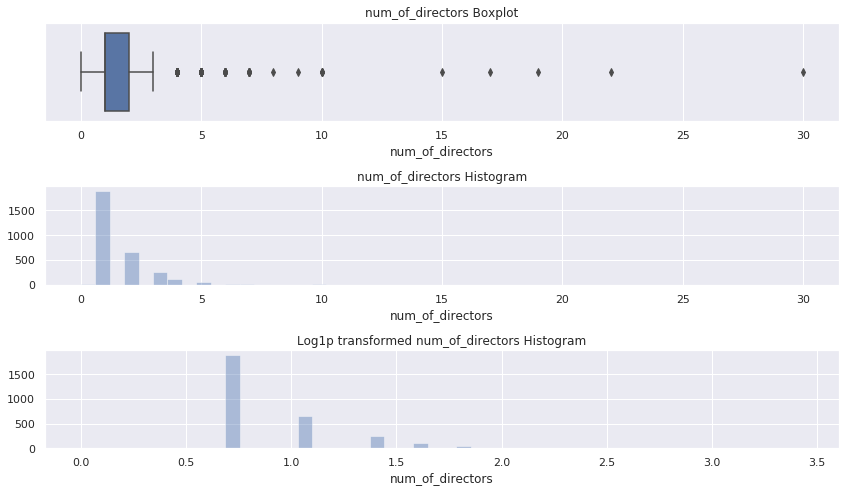

In [290]:
train_df["num_of_directors"] = train_df["crew"].str.count("Directing")
test_df["num_of_directors"] = test_df["crew"].str.count("Directing")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_directors = train_df.num_of_directors.fillna(0)
test_df.num_of_directors = test_df.num_of_directors.fillna(0)

sns.boxplot(x=train_df.num_of_directors, ax = ax[0])
ax[0].set_title("num_of_directors Boxplot")
sns.distplot(a=train_df.num_of_directors, kde = False, ax = ax[1])
ax[1].set_title("num_of_directors Histogram")
sns.distplot(a=np.log1p(train_df.num_of_directors), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_directors Histogram")
f.tight_layout()


train_df["log_num_of_directors"] = np.log1p(train_df.num_of_directors)
test_df["log_num_of_directors"] = np.log1p(test_df.num_of_directors)

#### Number of Producers

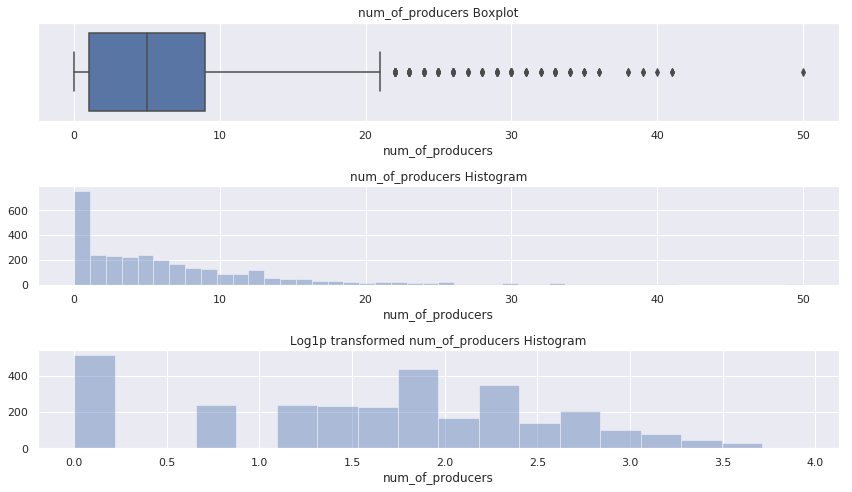

In [291]:
train_df["num_of_producers"] = train_df["crew"].str.count("Production")
test_df["num_of_producers"] = test_df["crew"].str.count("Production")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_producers = train_df.num_of_producers.fillna(0)
test_df.num_of_producers = test_df.num_of_producers.fillna(0)

sns.boxplot(x=train_df.num_of_producers, ax = ax[0])
ax[0].set_title("num_of_producers Boxplot")
sns.distplot(a=train_df.num_of_producers, kde = False, ax = ax[1])
ax[1].set_title("num_of_producers Histogram")
sns.distplot(a=np.log1p(train_df.num_of_producers), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_producers Histogram")
f.tight_layout()


train_df["log_num_of_producers"] = np.log1p(train_df.num_of_producers)
test_df["log_num_of_producers"] = np.log1p(test_df.num_of_producers)

#### Number of Writers

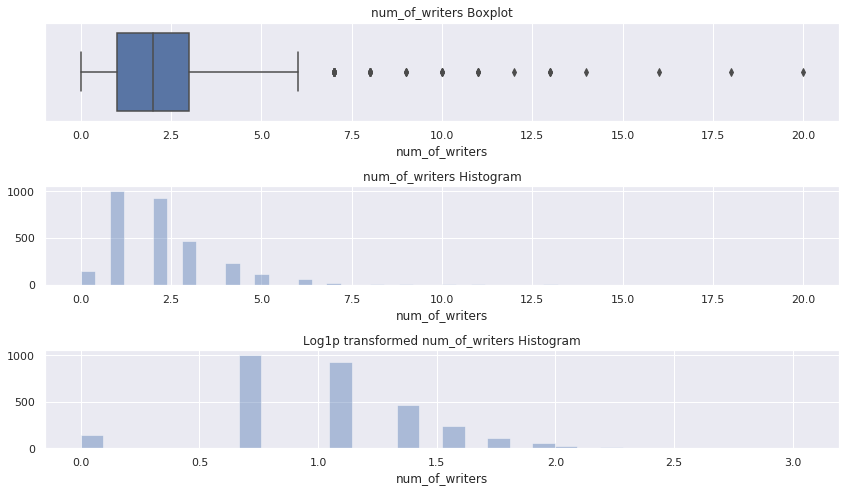

In [292]:
train_df["num_of_writers"] = train_df["crew"].str.count("Writing")
test_df["num_of_writers"] = test_df["crew"].str.count("Writing")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_writers = train_df.num_of_writers.fillna(0)
test_df.num_of_writers = test_df.num_of_writers.fillna(0)

sns.boxplot(x=train_df.num_of_writers, ax = ax[0])
ax[0].set_title("num_of_writers Boxplot")
sns.distplot(a=train_df.num_of_writers, kde = False, ax = ax[1])
ax[1].set_title("num_of_writers Histogram")
sns.distplot(a=np.log1p(train_df.num_of_writers), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_writers Histogram")
f.tight_layout()


train_df["log_num_of_writers"] = np.log1p(train_df.num_of_writers)
test_df["log_num_of_writers"] = np.log1p(test_df.num_of_writers)

#### Number of Editors

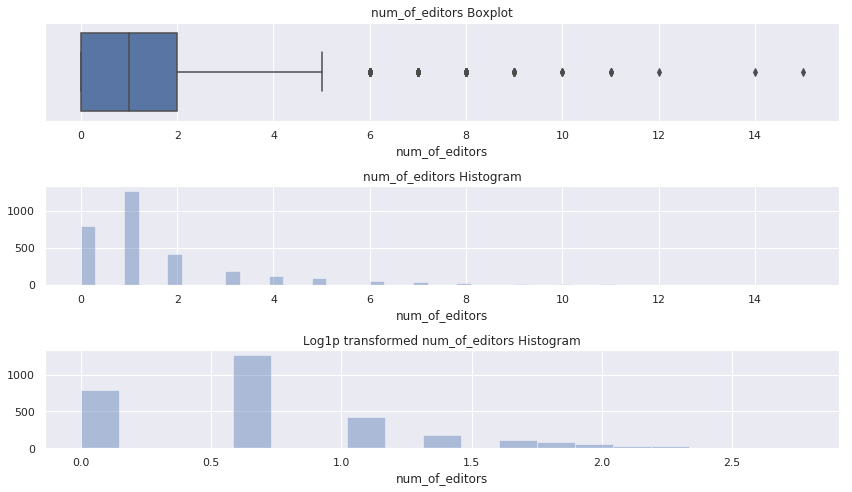

In [293]:
train_df["num_of_editors"] = train_df["crew"].str.count("Editing")
test_df["num_of_editors"] = test_df["crew"].str.count("Editing")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_editors = train_df.num_of_editors.fillna(0)
test_df.num_of_editors = test_df.num_of_editors.fillna(0)

sns.boxplot(x=train_df.num_of_editors, ax = ax[0])
ax[0].set_title("num_of_editors Boxplot")
sns.distplot(a=train_df.num_of_editors, kde = False, ax = ax[1])
ax[1].set_title("num_of_editors Histogram")
sns.distplot(a=np.log1p(train_df.num_of_editors), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_editors Histogram")
f.tight_layout()


train_df["log_num_of_editors"] = np.log1p(train_df.num_of_editors)
test_df["log_num_of_editors"] = np.log1p(test_df.num_of_editors)

#### Number of Art crew

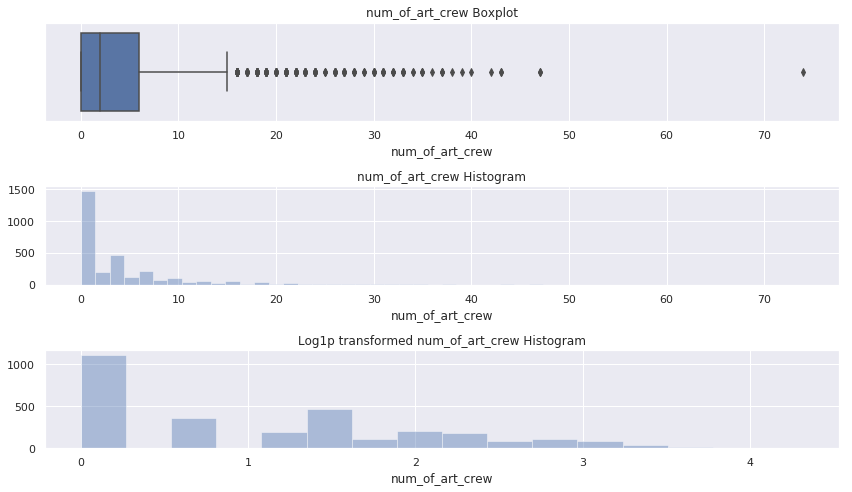

In [294]:
train_df["num_of_art_crew"] = train_df["crew"].str.count("Art")
test_df["num_of_art_crew"] = test_df["crew"].str.count("Art")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_art_crew = train_df.num_of_art_crew.fillna(0)
test_df.num_of_art_crew = test_df.num_of_art_crew.fillna(0)

sns.boxplot(x=train_df.num_of_art_crew, ax = ax[0])
ax[0].set_title("num_of_art_crew Boxplot")
sns.distplot(a=train_df.num_of_art_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_art_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_art_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_art_crew Histogram")
f.tight_layout()


train_df["log_num_of_art_crew"] = np.log1p(train_df.num_of_art_crew)
test_df["log_num_of_art_crew"] = np.log1p(test_df.num_of_art_crew)

#### Number of Sound crew

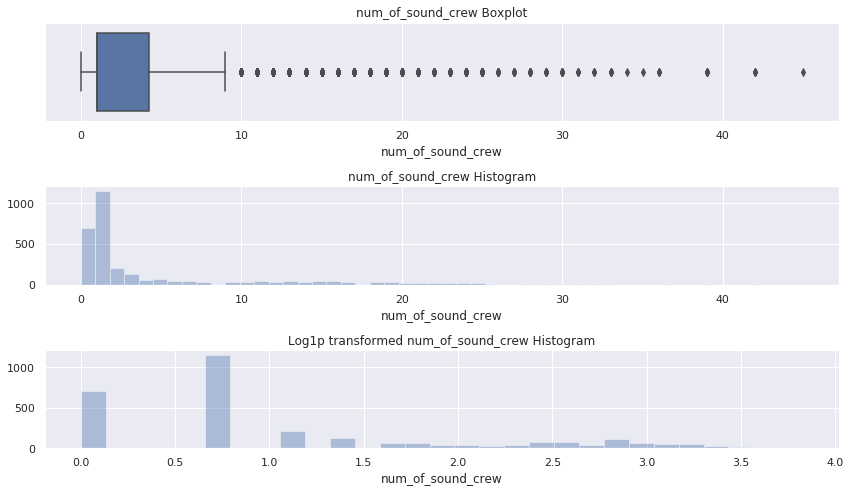

In [295]:
train_df["num_of_sound_crew"] = train_df["crew"].str.count("Sound")
test_df["num_of_sound_crew"] = test_df["crew"].str.count("Sound")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_sound_crew = train_df.num_of_sound_crew.fillna(0)
test_df.num_of_sound_crew = test_df.num_of_sound_crew.fillna(0)

sns.boxplot(x=train_df.num_of_sound_crew, ax = ax[0])
ax[0].set_title("num_of_sound_crew Boxplot")
sns.distplot(a=train_df.num_of_sound_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_sound_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_sound_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_sound_crew Histogram")
f.tight_layout()


train_df["log_num_of_sound_crew"] = np.log1p(train_df.num_of_sound_crew)
test_df["log_num_of_sound_crew"] = np.log1p(test_df.num_of_sound_crew)

#### Number of Costume and Make-Up crew

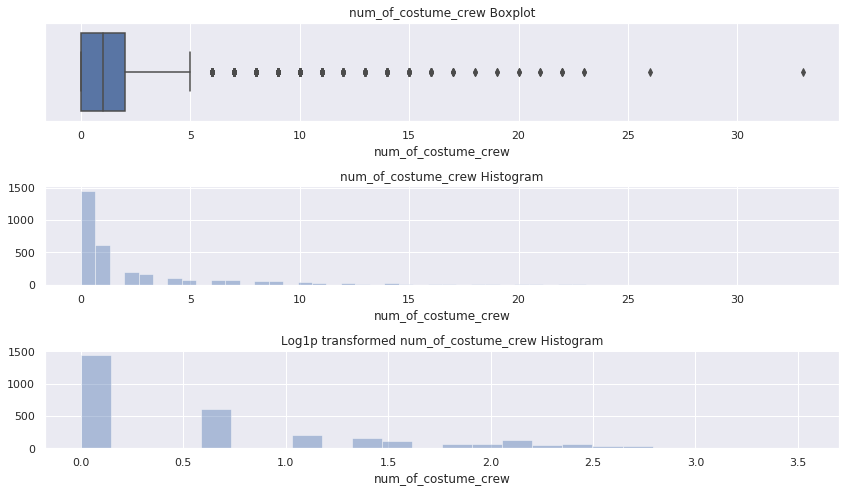

In [296]:
train_df["num_of_costume_crew"] = train_df["crew"].str.count("Costume & Make-Up")
test_df["num_of_costume_crew"] = test_df["crew"].str.count("Costume & Make-Up")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_costume_crew = train_df.num_of_costume_crew.fillna(0)
test_df.num_of_costume_crew = test_df.num_of_costume_crew.fillna(0)

sns.boxplot(x=train_df.num_of_costume_crew, ax = ax[0])
ax[0].set_title("num_of_costume_crew Boxplot")
sns.distplot(a=train_df.num_of_costume_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_costume_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_costume_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_costume_crew Histogram")
f.tight_layout()


train_df["log_num_of_costume_crew"] = np.log1p(train_df.num_of_costume_crew)
test_df["log_num_of_costume_crew"] = np.log1p(test_df.num_of_costume_crew)

#### Number of Camera crew

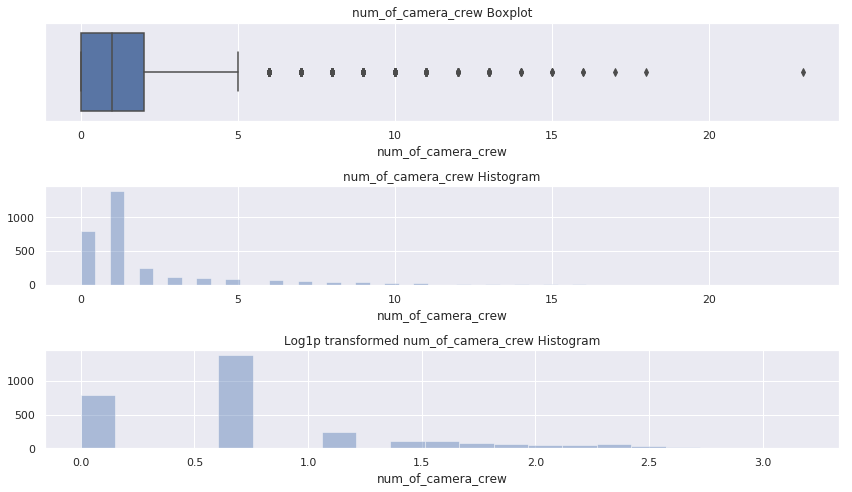

In [297]:
train_df["num_of_camera_crew"] = train_df["crew"].str.count("\'department\': \'Camera\'")
test_df["num_of_camera_crew"] = test_df["crew"].str.count("\'department\': \'Camera\'")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_camera_crew = train_df.num_of_camera_crew.fillna(0)
test_df.num_of_camera_crew = test_df.num_of_camera_crew.fillna(0)

sns.boxplot(x=train_df.num_of_camera_crew, ax = ax[0])
ax[0].set_title("num_of_camera_crew Boxplot")
sns.distplot(a=train_df.num_of_camera_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_camera_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_camera_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_camera_crew Histogram")
f.tight_layout()


train_df["log_num_of_camera_crew"] = np.log1p(train_df.num_of_camera_crew)
test_df["log_num_of_camera_crew"] = np.log1p(test_df.num_of_camera_crew)

#### Number of Visual Effects Crew

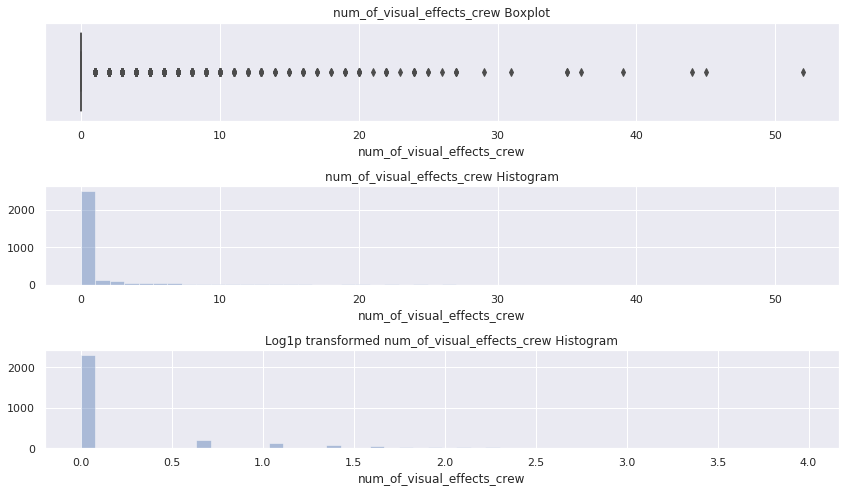

In [298]:
train_df["num_of_visual_effects_crew"] = train_df["crew"].str.count("\'department\': \'Visual Effects\'")
test_df["num_of_visual_effects_crew"] = test_df["crew"].str.count("\'department\': \'Visual Effects\'")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_visual_effects_crew = train_df.num_of_visual_effects_crew.fillna(0)
test_df.num_of_visual_effects_crew = test_df.num_of_visual_effects_crew.fillna(0)

sns.boxplot(x=train_df.num_of_visual_effects_crew, ax = ax[0])
ax[0].set_title("num_of_visual_effects_crew Boxplot")
sns.distplot(a=train_df.num_of_visual_effects_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_visual_effects_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_visual_effects_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_visual_effects_crew Histogram")
f.tight_layout()


train_df["log_num_of_visual_effects_crew"] = np.log1p(train_df.num_of_visual_effects_crew)
test_df["log_num_of_visual_effects_crew"] = np.log1p(test_df.num_of_visual_effects_crew)

#### Number of Lighting crew

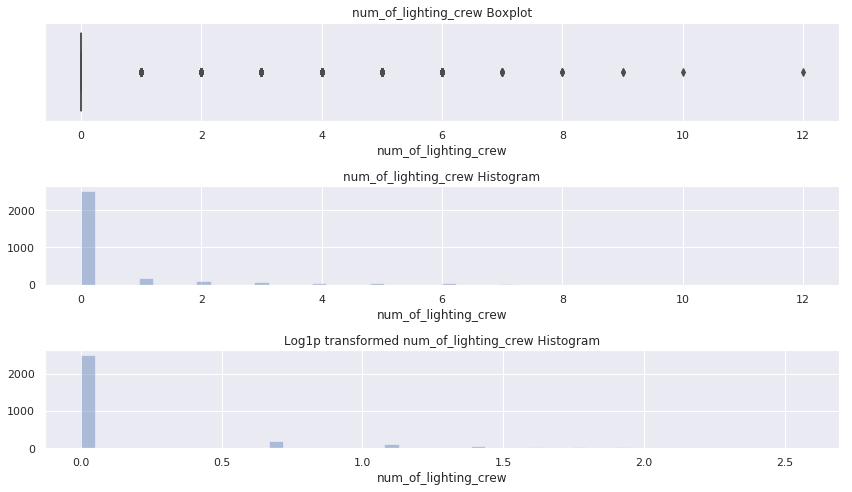

In [299]:
train_df["num_of_lighting_crew"] = train_df["crew"].str.count("\'department\': \'Lighting\'")
test_df["num_of_lighting_crew"] = test_df["crew"].str.count("\'department\': \'Lighting\'")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_lighting_crew = train_df.num_of_lighting_crew.fillna(0)
test_df.num_of_lighting_crew = test_df.num_of_lighting_crew.fillna(0)

sns.boxplot(x=train_df.num_of_lighting_crew, ax = ax[0])
ax[0].set_title("num_of_lighting_crew Boxplot")
sns.distplot(a=train_df.num_of_lighting_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_lighting_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_lighting_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_lighting_crew Histogram")
f.tight_layout()


train_df["log_num_of_lighting_crew"] = np.log1p(train_df.num_of_lighting_crew)
test_df["log_num_of_lighting_crew"] = np.log1p(test_df.num_of_lighting_crew)

#### Number of Other crew

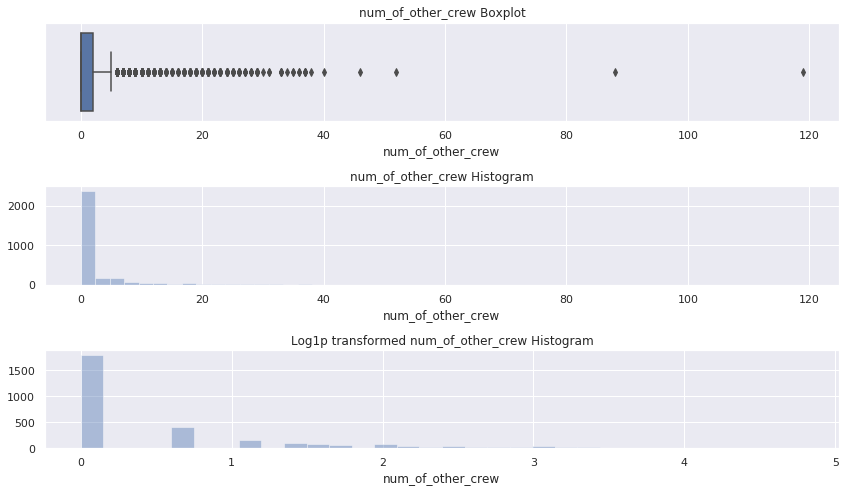

In [300]:
train_df["num_of_other_crew"] = train_df["crew"].str.count("\'department\': \'Crew\'")
test_df["num_of_other_crew"] = test_df["crew"].str.count("\'department\': \'Crew\'")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_other_crew = train_df.num_of_other_crew.fillna(0)
test_df.num_of_other_crew = test_df.num_of_other_crew.fillna(0)

sns.boxplot(x=train_df.num_of_other_crew, ax = ax[0])
ax[0].set_title("num_of_other_crew Boxplot")
sns.distplot(a=train_df.num_of_other_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_other_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_other_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_other_crew Histogram")
f.tight_layout()


train_df["log_num_of_other_crew"] = np.log1p(train_df.num_of_other_crew)
test_df["log_num_of_other_crew"] = np.log1p(test_df.num_of_other_crew)

#### Production Countries

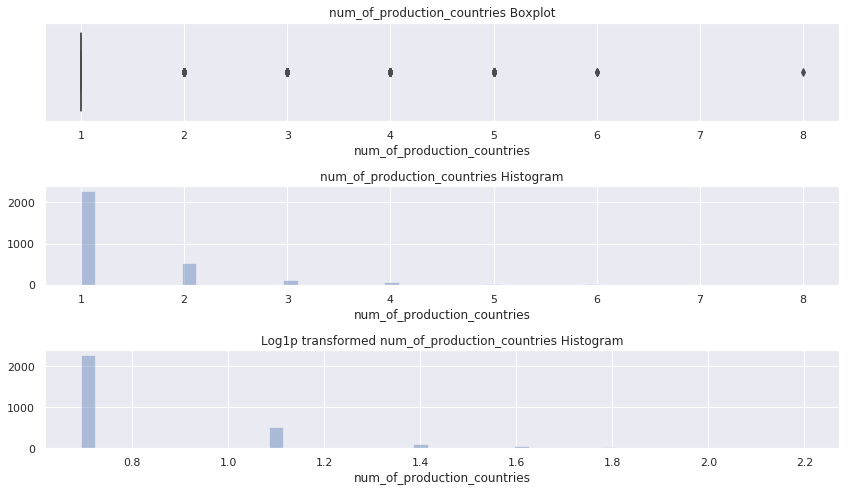

In [301]:
train_df["num_of_production_countries"] = train_df.production_countries_processed.apply(len)
test_df["num_of_production_countries"] = test_df.production_countries_processed.apply(len)

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_production_countries = train_df.num_of_production_countries.fillna(0)
test_df.num_of_production_countries = test_df.num_of_production_countries.fillna(0)

sns.boxplot(x=train_df.num_of_production_countries, ax = ax[0])
ax[0].set_title("num_of_production_countries Boxplot")
sns.distplot(a=train_df.num_of_production_countries, kde = False, ax = ax[1])
ax[1].set_title("num_of_production_countries Histogram")
sns.distplot(a=np.log1p(train_df.num_of_production_countries), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_production_countries Histogram")
f.tight_layout()


train_df["log_num_of_production_countries"] = np.log1p(train_df.num_of_production_countries)
test_df["log_num_of_production_countries"] = np.log1p(test_df.num_of_production_countries)

#### Number of Genres in a movie

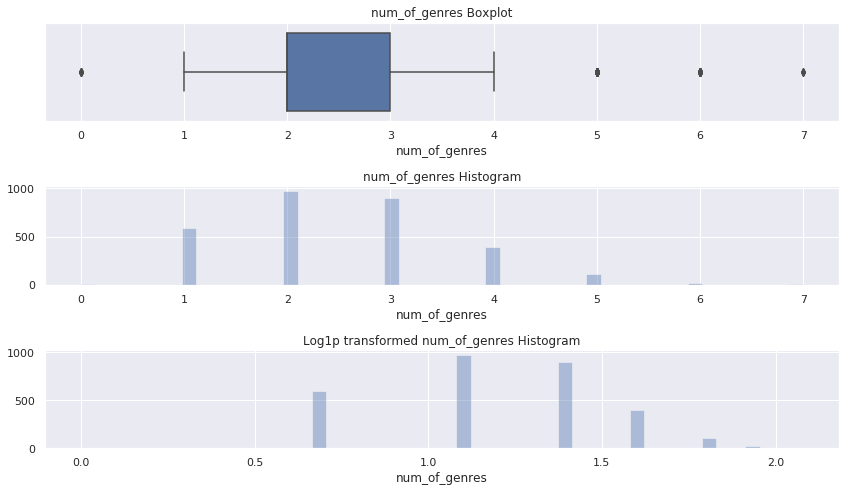

In [302]:
train_df["num_of_genres"] = train_df.genres_processed.apply(len)
test_df["num_of_genres"] = test_df.genres_processed.apply(len)

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_genres = train_df.num_of_genres.fillna(0)
test_df.num_of_genres = test_df.num_of_genres.fillna(0)

sns.boxplot(x=train_df.num_of_genres, ax = ax[0])
ax[0].set_title("num_of_genres Boxplot")
sns.distplot(a=train_df.num_of_genres, kde = False, ax = ax[1])
ax[1].set_title("num_of_genres Histogram")
sns.distplot(a=np.log1p(train_df.num_of_genres), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_genres Histogram")
f.tight_layout()


train_df["log_num_of_genres"] = np.log1p(train_df.num_of_genres)
test_df["log_num_of_genres"] = np.log1p(test_df.num_of_genres)

### EDA - Bivariate Analysis

#### Bivariate Analysis for numerical features

Text(0.5, 1.0, 'Correlation between numerical features')

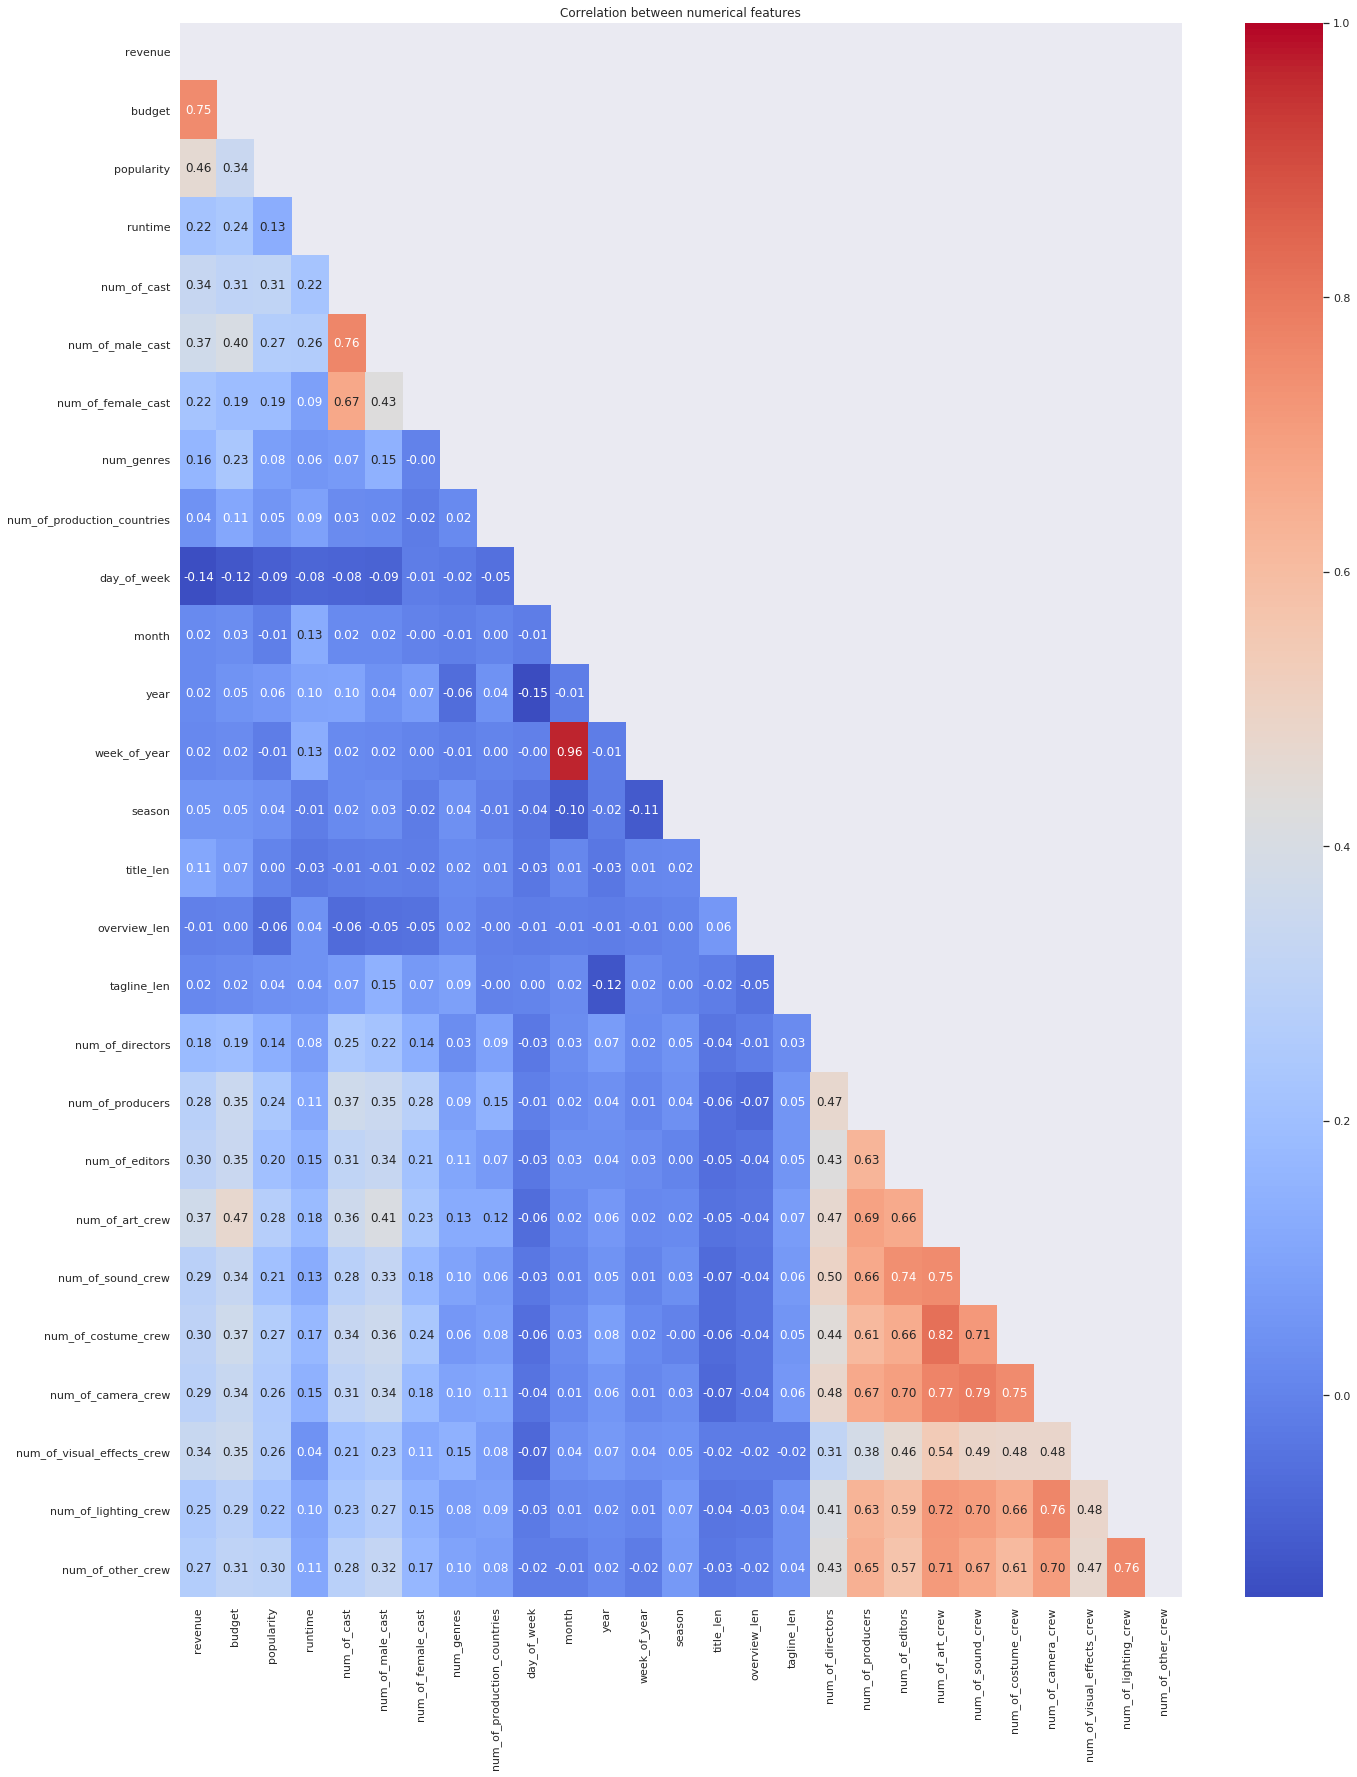

In [303]:
sns.set(rc={'figure.figsize':(20,27)})

# Compute the correlation matrix
corr = train_df[["revenue", "budget", "popularity", "runtime", "num_of_cast", "num_of_male_cast",
                 "num_of_female_cast",
                 "num_genres", "num_of_production_countries", "day_of_week", "month", "year", "week_of_year", "season",
                 "title_len", "overview_len", "tagline_len",
                 "num_of_directors", "num_of_producers", "num_of_editors", "num_of_art_crew", "num_of_sound_crew",
                 "num_of_costume_crew", "num_of_camera_crew", "num_of_visual_effects_crew", "num_of_lighting_crew",
                 "num_of_other_crew"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between numerical features")

#### Bivariate Analysis for log-transformed numerical features

Text(0.5, 1.0, 'Correlation between log1p transformed numerical features')

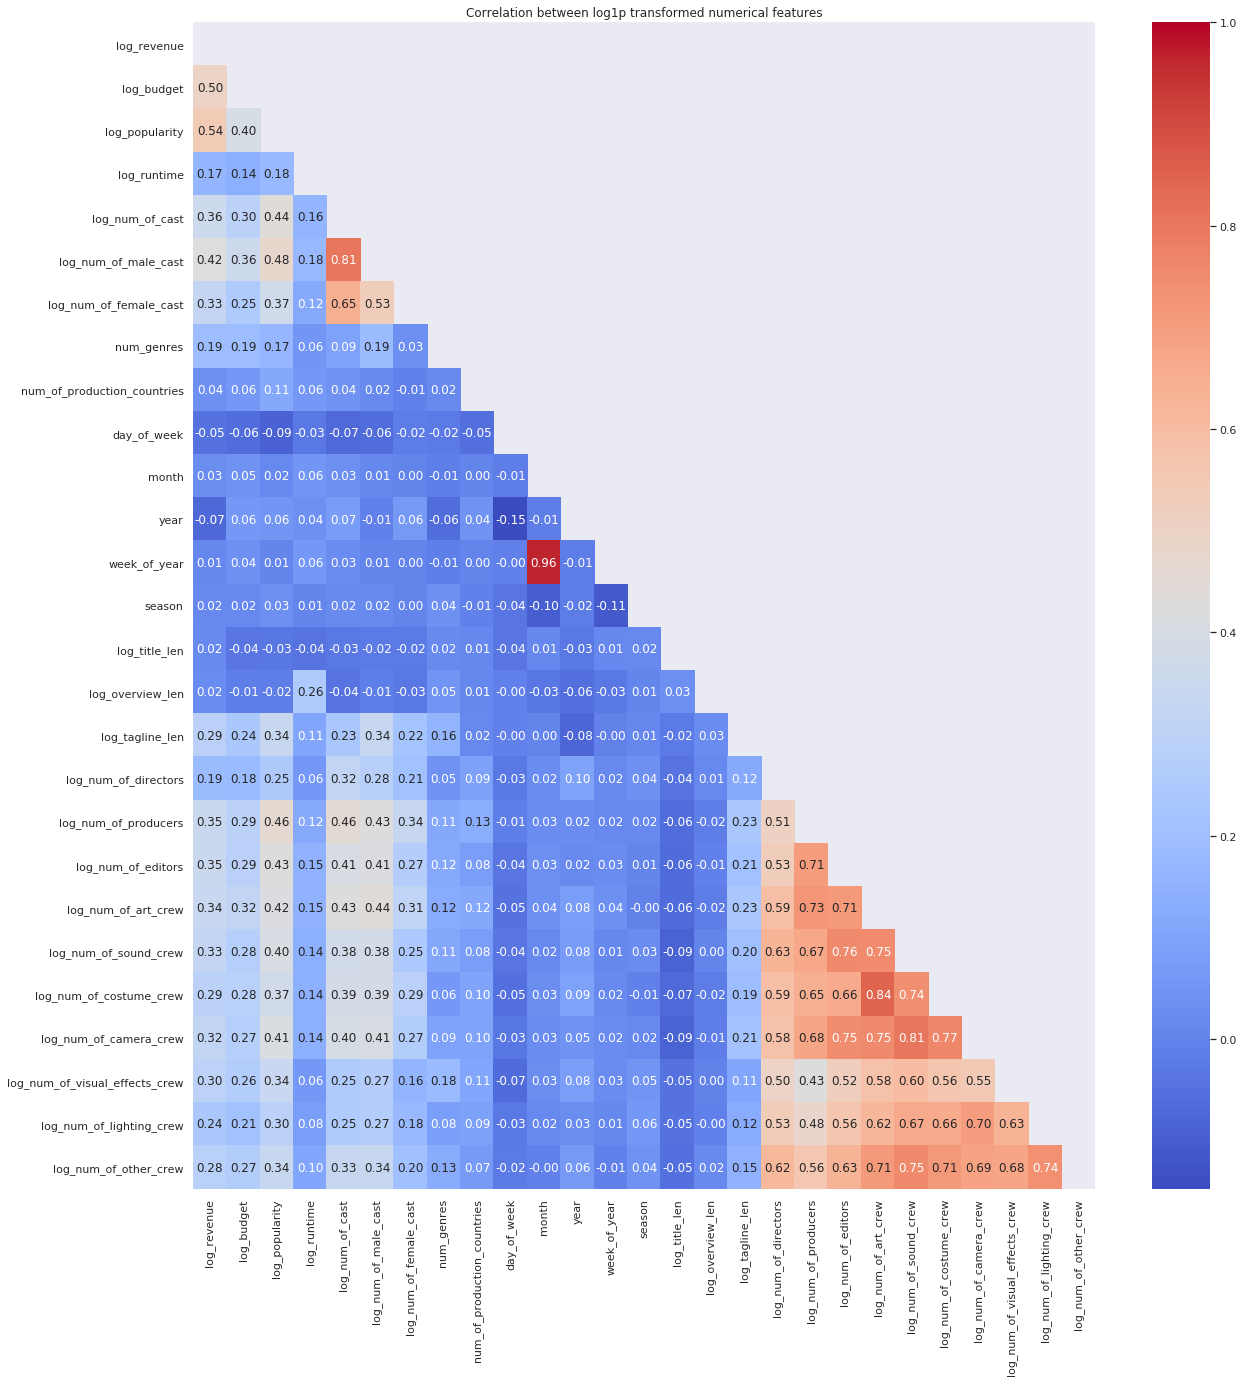

In [304]:
sns.set(rc={'figure.figsize':(18,20)})

# Compute the correlation matrix
corr = train_df[["log_revenue", "log_budget", "log_popularity", "log_runtime",
                 "log_num_of_cast", "log_num_of_male_cast",
                 "log_num_of_female_cast", "num_genres", "num_of_production_countries",
                "day_of_week", "month", "year", "week_of_year", "season",
                "log_title_len", "log_overview_len", "log_tagline_len",
                "log_num_of_directors", "log_num_of_producers", "log_num_of_editors", "log_num_of_art_crew", "log_num_of_sound_crew",
                       "log_num_of_costume_crew", "log_num_of_camera_crew", "log_num_of_visual_effects_crew", "log_num_of_lighting_crew",
                        "log_num_of_other_crew"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between log1p transformed numerical features")

### Bivariate Analysis and Feature Engineering

#### has_collection and revenue

0    2396
1     604
Name: has_collection, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without being in a collection')

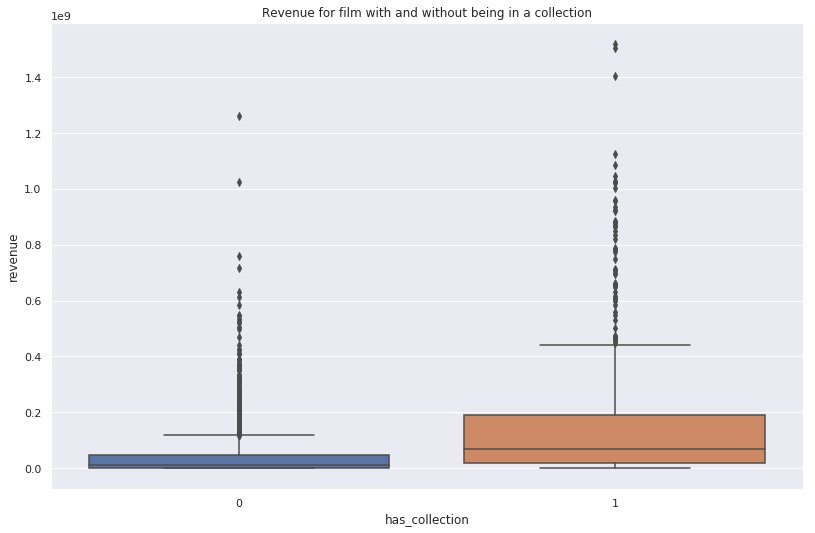

In [305]:
train_df['has_collection'] = [0 if pd.isnull(x) else 1 for x in train_df['belongs_to_collection']]
test_df['has_collection'] = [0 if pd.isnull(x) else 1 for x in test_df['belongs_to_collection']]
print(train_df['has_collection'].value_counts())

sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='has_collection', y='revenue', data=train_df)
plt.title('Revenue for film with and without being in a collection')

#### homepage and revenue

0    2054
1     946
Name: has_homepage, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without homepage')

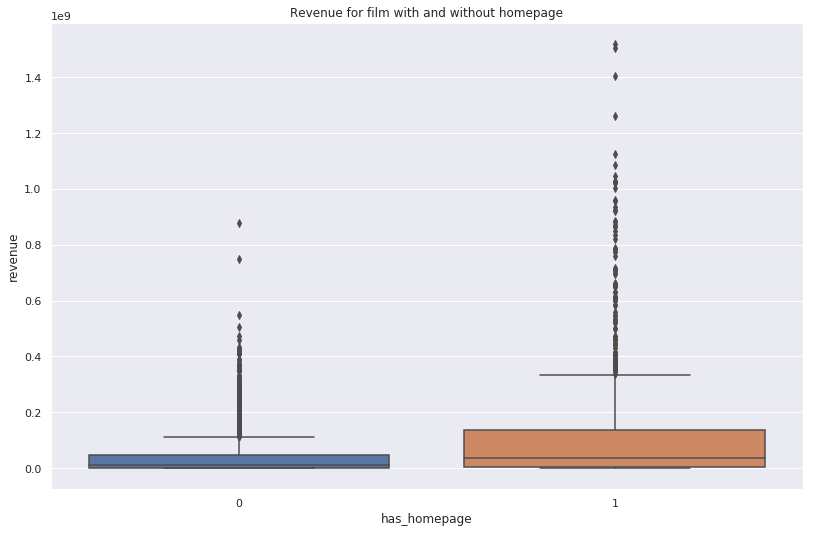

In [306]:
train_df['has_homepage'] = [0 if pd.isnull(x) else 1 for x in train_df['homepage']]
test_df['has_homepage'] = [0 if pd.isnull(x) else 1 for x in test_df['homepage']]
print(train_df['has_homepage'].value_counts())

sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='has_homepage', y='revenue', data=train_df)
plt.title('Revenue for film with and without homepage')

#### tagline and revenue

1    2403
0     597
Name: has_tag, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without tagline')

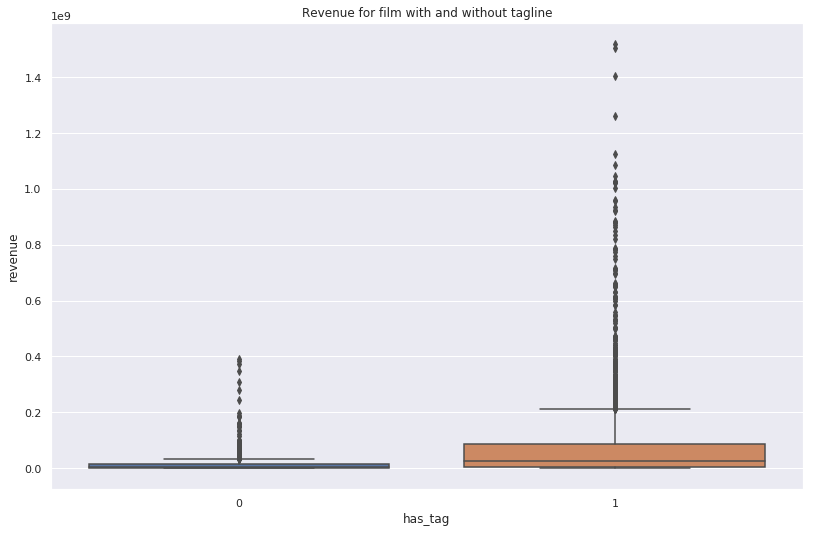

In [307]:
train_df['has_tag'] = [0 if len(x) == 0 else 1 for x in train_df['tagline']]
test_df['has_tag'] = [0 if len(x) == 0 else 1 for x in test_df['tagline']]
print(train_df['has_tag'].value_counts())

sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='has_tag', y='revenue', data=train_df)
plt.title('Revenue for film with and without tagline')

#### Number of Genres per movie and revenues

Text(0.5, 1.0, 'Revenues for films with multiple genres')

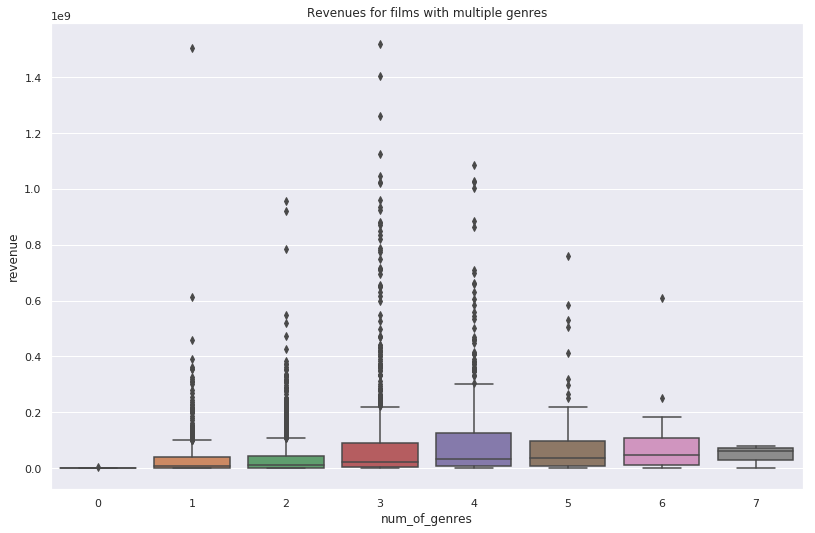

In [308]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_genres', y='revenue', data=train_df)
plt.title('Revenues for films with multiple genres')

#### Bivariate Analysis between each genre and revenue

In [309]:
for i, g in enumerate(genres_df.index.values):
    genres_df.loc[g, "median_salary"] = train_df[train_df['isGenre_' + g]==1].revenue.median()

genres_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10)

number_of_movies  median_salary
Drama                       1531     11293663.0
Comedy                      1028     18809184.0
Thriller                     789     21890845.0
Action                       741     36000000.0
Romance                      571     14016568.0
Crime                        469     24048000.0
Adventure                    439     59700000.0
Horror                       301     17037887.0
ScienceFiction               290     35109301.5
Family                       260     57470029.5

Text(0.5, 1.0, 'Sorted movie genres by median revenue')

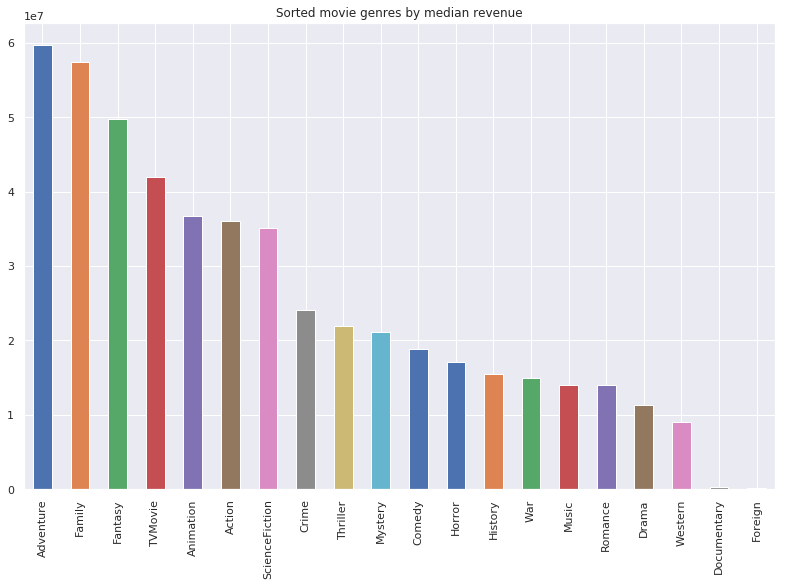

In [310]:
genres_df.sort_values(by=["median_salary"], ascending=False).median_salary.plot.bar()
plt.title("Sorted movie genres by median revenue")

In [311]:
for i, p in enumerate(genres_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10).index.values):
    train_df['isTopGenre_' + p] = train_df['genres_processed'].apply(lambda x: 1 if p in x else 0)
    train_df['isTopGenre_Other'] = train_df['genres_processed'].apply(lambda x: 1 if p not in x else 0)
    test_df['isTopGenre_' + p] = test_df['genres_processed'].apply(lambda x: 1 if p in x else 0)
    test_df['isTopGenre_Other'] = test_df['genres_processed'].apply(lambda x: 1 if p not in x else 0)

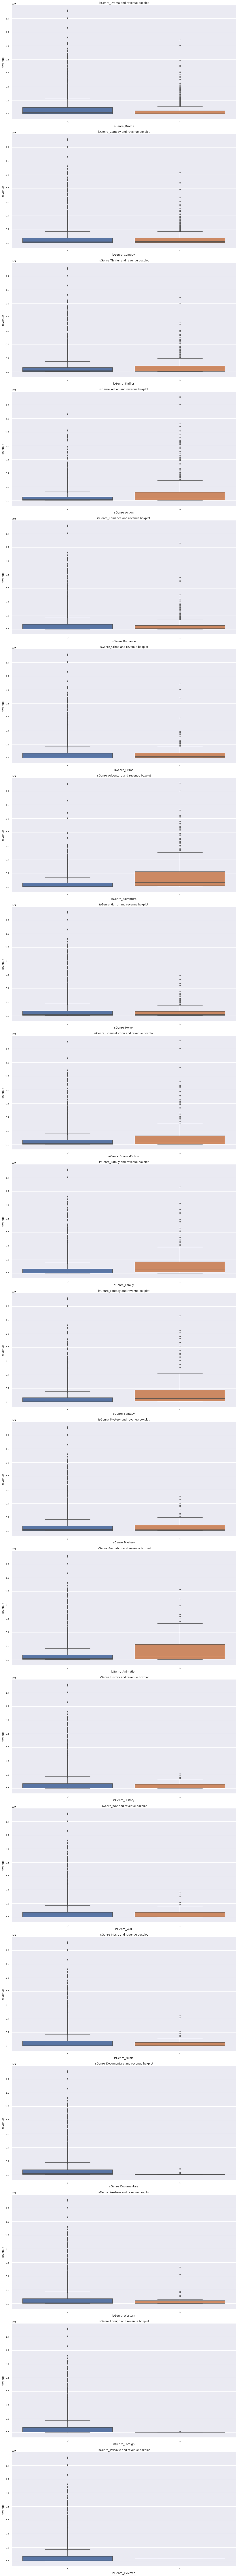

In [312]:
f, ax = plt.subplots(len(genres_df.index.values), 1, figsize=(15,160))

for i, g in enumerate(genres_df.index.values):
    sns.boxplot(x=train_df['isGenre_' + g], y='revenue', ax=ax[i], data=train_df)
    ax[i].set_title('isGenre_' + g +" and revenue boxplot")
f.tight_layout()

#### original_language and revenue

Text(0.5, 1.0, 'Revenue for a movie and its and original_language')

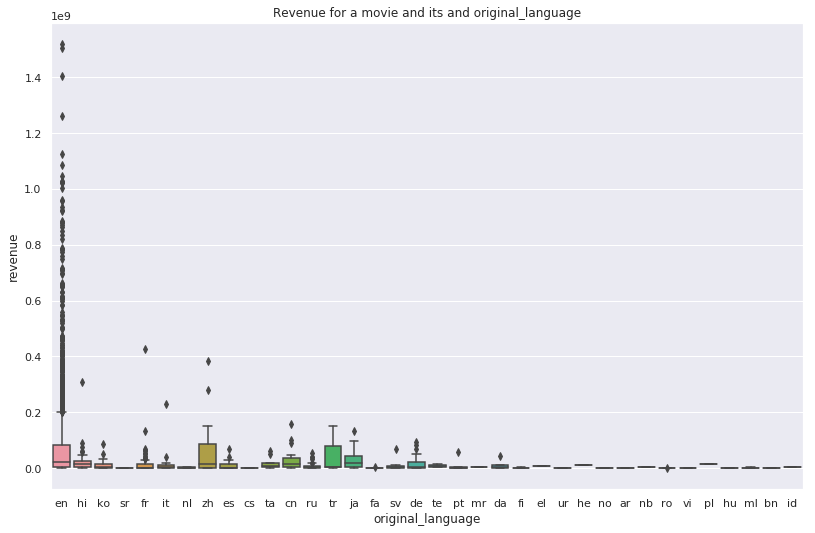

In [313]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='original_language', y='revenue', data=train_df)
plt.title('Revenue for a movie and its and original_language')

#### English and non english movies vs revenue

Text(0.5, 1.0, 'Revenue for a movie in contrast with english and non-english language')

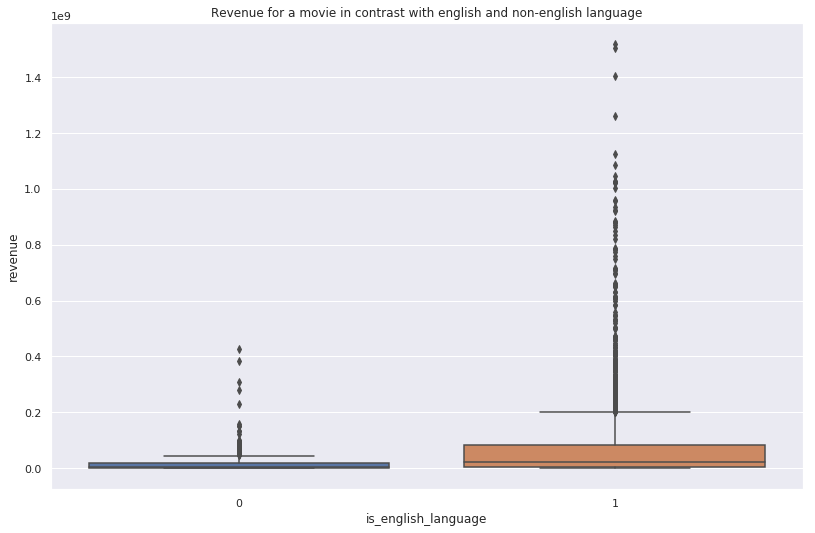

In [314]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='is_english_language', y='revenue', data=train_df)
plt.title('Revenue for a movie in contrast with english and non-english language')

#### production country and revenue

Text(0.5, 1.0, 'number of production countries for a movie and revenue')

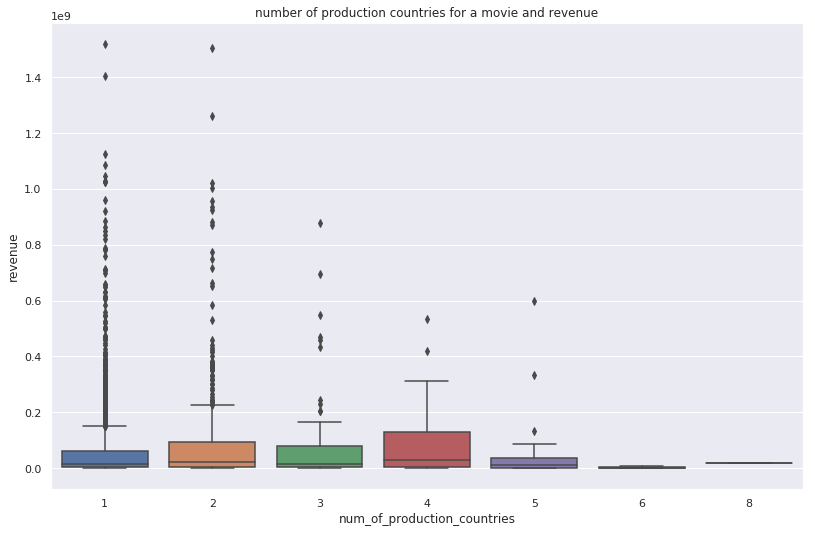

In [315]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_production_countries', y='revenue', data=train_df)
plt.title('number of production countries for a movie and revenue')

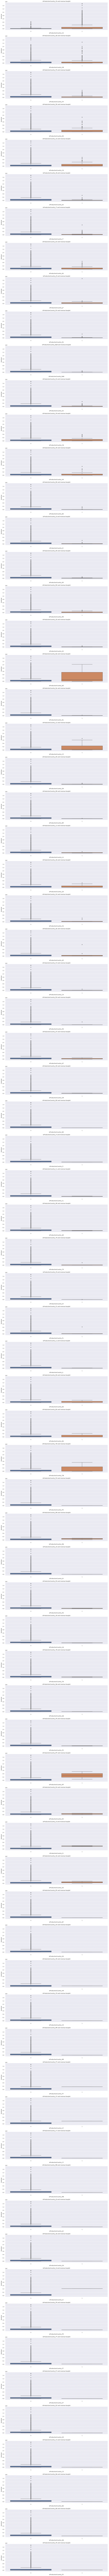

In [316]:
f, ax = plt.subplots(len(production_countries_df.index.values), 1, figsize=(15,350))

for i, c in enumerate(production_countries_df.index.values):
    sns.boxplot(x=train_df['isProductionCountry_' + c], y='revenue', ax=ax[i], data=train_df)
    ax[i].set_title('isProductionCountry_' + c +" and revenue boxplot")
f.tight_layout()

In [317]:
for i, c in enumerate(production_countries_df.index.values):
    production_countries_df.loc[c, "median_salary"] = train_df[train_df['isProductionCountry_' + c]==1].revenue.median()

production_countries_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10)

number_of_movies  median_salary
US              2282     25000000.0
GB               380     15020873.0
FR               222      8056215.0
DE               167     27053815.0
CA               120     29005408.5
IN                81      9700000.0
IT                64      8615430.5
AU                61     18340000.0
JP                61     17555141.0
RU                58      2458251.5

In [318]:
for i, p in enumerate(production_countries_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10).index.values):
    train_df['isTopProductionCountry_' + p] = train_df['production_countries_processed'].apply(lambda x: 1 if p in x else 0)
    test_df['isTopProductionCountry_' + p] = test_df['production_countries_processed'].apply(lambda x: 1 if p in x else 0)

#### Day of the week when the movie released and revenue

Text(0.5, 1.0, 'day_of_week when the movie release and revenue')

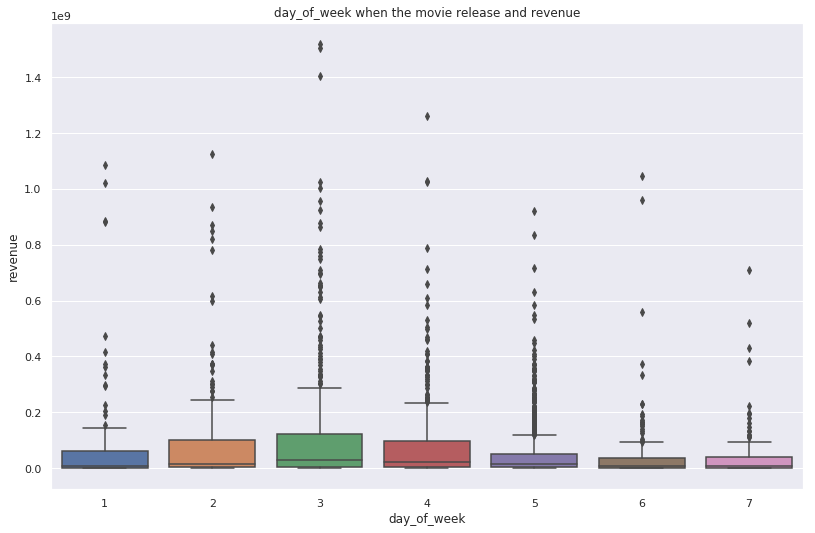

In [319]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='day_of_week', y='revenue', data=train_df)
plt.title('day_of_week when the movie release and revenue')

#### Week of year when the movie released and revenue

Text(0.5, 1.0, 'day_of_week when the movie release and revenue')

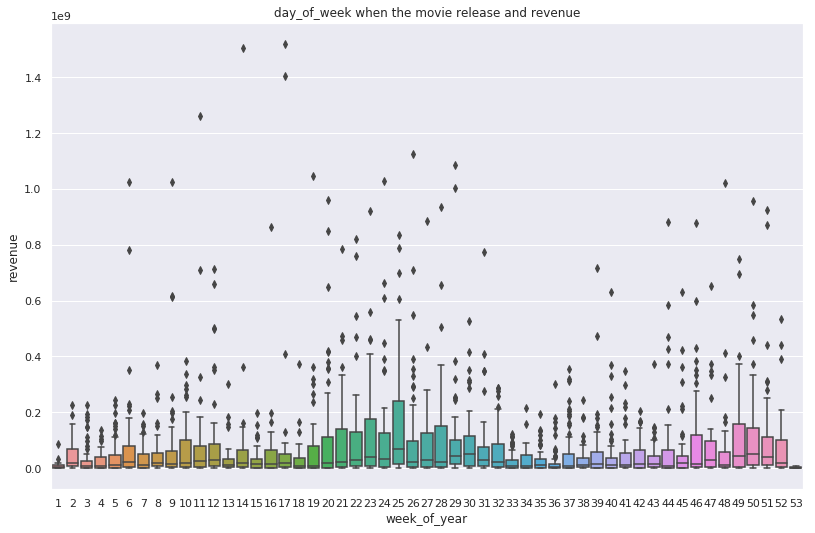

In [320]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='week_of_year', y='revenue', data=train_df)
plt.title('day_of_week when the movie release and revenue')

#### Month when the movie released and revenue

Text(0.5, 1.0, 'month when the movie release and revenue')

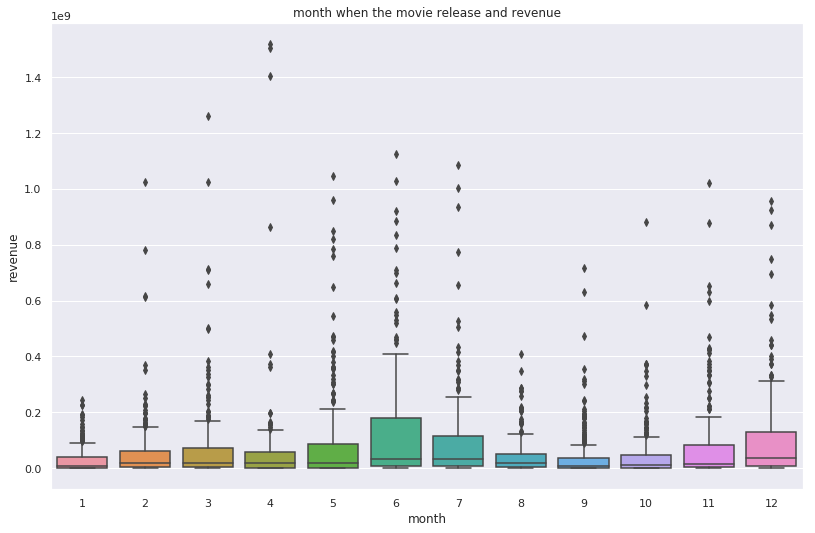

In [321]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='month', y='revenue', data=train_df)
plt.title('month when the movie release and revenue')

#### Season when the movie released and revenue

Text(0.5, 1.0, 'season when the movie release and revenue')

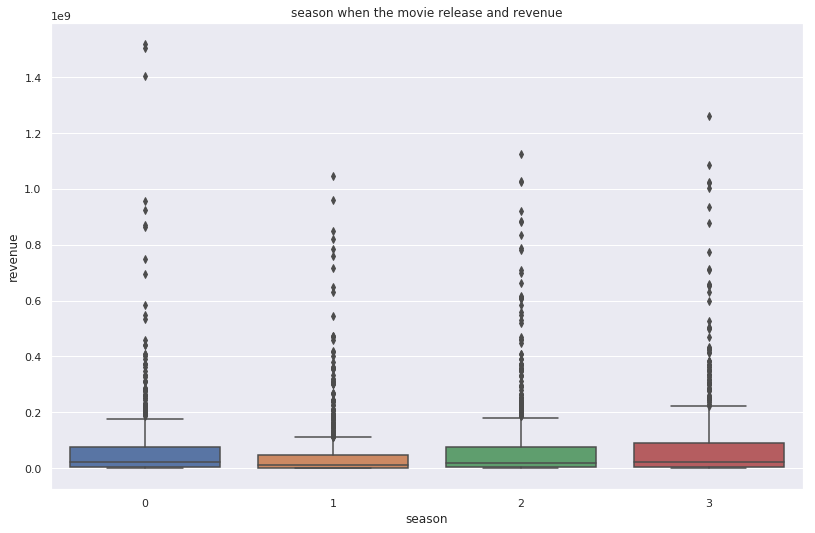

In [322]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='season', y='revenue', data=train_df)
plt.title('season when the movie release and revenue')

#### Year when the movie released and revenue

Text(0.5, 1.0, 'Year when the movie release and revenue')

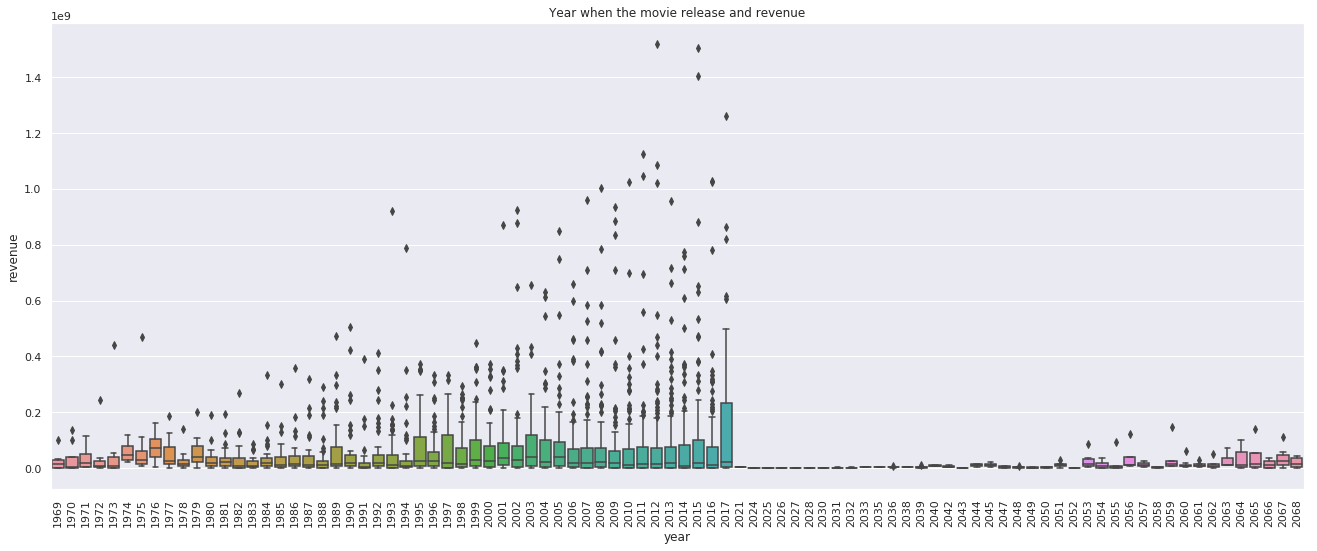

In [323]:
sns.set(rc={'figure.figsize':(20, 8)})
g = sns.boxplot(x='year', y='revenue', data=train_df)
plt.xticks(rotation=90)
plt.title('Year when the movie release and revenue')

#### Number of Production Companies and revenue

Text(0.5, 1.0, 'number of production companies for a movie and revenue')

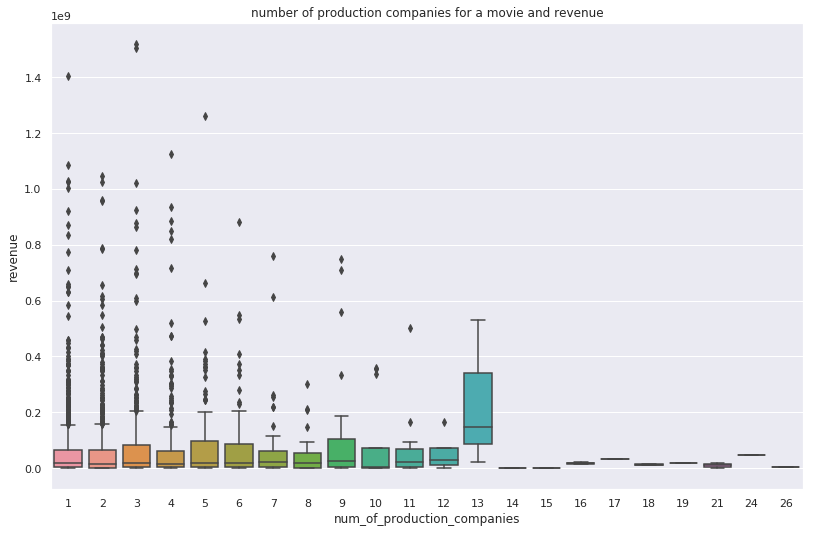

In [324]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_production_companies', y='revenue', data=train_df)
plt.title('number of production companies for a movie and revenue')

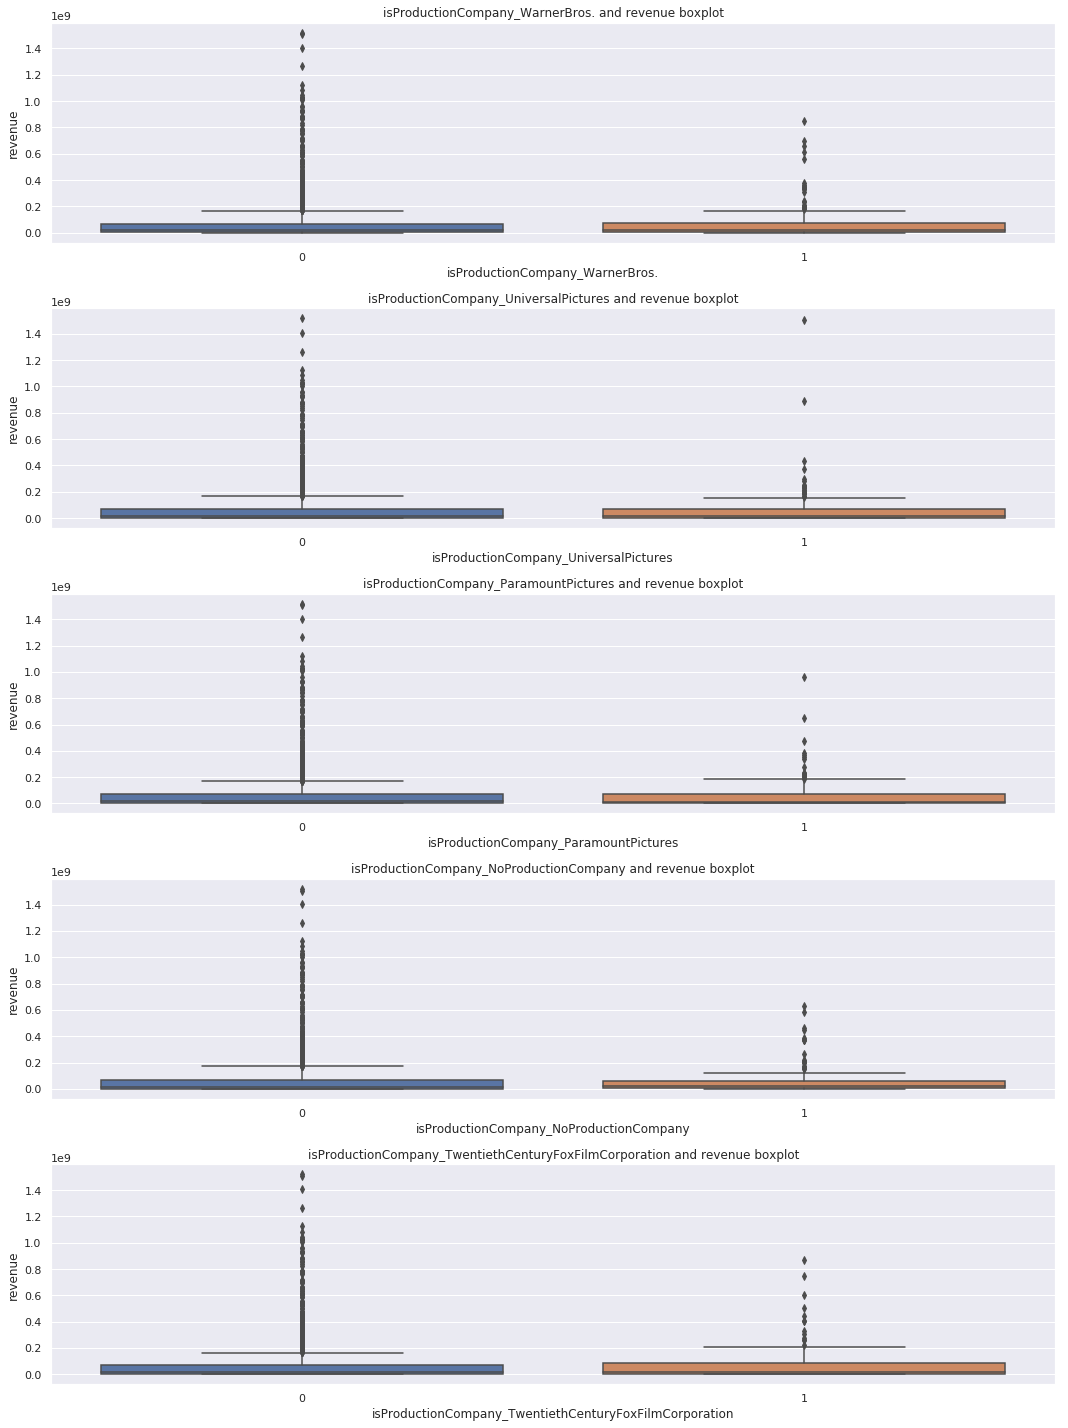

In [325]:
f, ax = plt.subplots(len(production_companies_df.head(5).index.values), 1, figsize=(15,20))

for i, p in enumerate(production_companies_df.head(5).index.values):
    sns.boxplot(x=train_df['isProductionCompany_' + p], y='revenue', ax=ax[i], data=train_df)
    ax[i].set_title('isProductionCompany_' + p +" and revenue boxplot")
f.tight_layout()

In [326]:
for i, p in enumerate(production_companies_df.index.values):
    production_companies_df.loc[p, "median_salary"] = train_df[train_df['isProductionCompany_' + p]==1].revenue.median()

production_companies_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(5)

number_of_movies  median_salary
WarnerBros.                                      199     17297244.0
UniversalPictures                                179     14010832.0
ParamountPictures                                170     15003691.5
NoProductionCompany                              169     21284514.0
TwentiethCenturyFoxFilmCorporation               144     19144537.0

In [327]:
for i, p in enumerate(production_companies_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10).index.values):
    train_df['isTopProductionCompany_' + p] = train_df['production_companies_processed'].apply(lambda x: 1 if p in x else 0)
    #train_df['isTopProductionCompany_Other'] = train_df['production_companies_processed'].apply(lambda x: 1 if p not in x else 0)
    test_df['isTopProductionCompany_' + p] = test_df['production_companies_processed'].apply(lambda x: 1 if p in x else 0)
    #test_df['isTopProductionCompany_Other'] = test_df['production_companies_processed'].apply(lambda x: 1 if p not in x else 0)

## Machine Learning

![](https://cmci.colorado.edu/classes/INFO-4604/fa17/wordcloud.png)
[image-source](https://cmci.colorado.edu/classes/INFO-4604/fa17/wordcloud.png)

#### Preparations before ML modeling

In [328]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity',
       ...
       'isTopProductionCompany_WarnerBros.',
       'isTopProductionCompany_UniversalPictures',
       'isTopProductionCompany_ParamountPictures',
       'isTopProductionCompany_NoProductionCompany',
       'isTopProductionCompany_TwentiethCenturyFoxFilmCorporation',
       'isTopProductionCompany_ColumbiaPictures',
       'isTopProductionCompany_Metro-Goldwyn-Mayer(MGM)',
       'isTopProductionCompany_NewLineCinema',
       'isTopProductionCompany_WaltDisneyPictures',
       'isTopProductionCompany_TouchstonePictures'],
      dtype='object', length=4105)

In [329]:
columns_for_training = ["log_budget", "log_popularity", "log_runtime", "day_of_week", "year", "month", "week_of_year", "season",
                        "num_genres", "num_of_production_countries", "log_num_of_cast", "log_num_of_male_cast", "log_num_of_female_cast", "has_collection", 
                        "has_homepage", "has_tag", "is_english_language",
                       "log_num_of_crew", "log_num_of_male_crew", "log_num_of_female_crew",
                       "log_title_len", "log_overview_len", "log_tagline_len",
                       "log_num_of_directors", "log_num_of_producers", "log_num_of_editors", "log_num_of_art_crew", "log_num_of_sound_crew",
                       "log_num_of_costume_crew", "log_num_of_camera_crew", "log_num_of_visual_effects_crew", "log_num_of_lighting_crew",
                        "log_num_of_other_crew"]


# adding isTopGenre_ columns for features before ML modeling
columns_for_training.extend(train_df.select(lambda col: col.startswith('isTopGenre_'), axis=1).columns.values)

# adding isTopProductionCompany_ columns for features before ML modeling
columns_for_training.extend(train_df.select(lambda col: col.startswith('isTopProductionCompany_'), axis=1).columns.values)

# adding isTopProductionCountry_ columns for features before ML modeling
columns_for_training.extend(train_df.select(lambda col: col.startswith('isTopProductionCountry_'), axis=1).columns.values)

# adding has_top_actor_ columns for features before ML modeling
columns_for_training.extend(train_df.select(lambda col: col.startswith('has_top_actor_'), axis=1).columns.values)

# adding has_top_keyword_ columns for features before ML modeling
columns_for_training.extend(train_df.select(lambda col: col.startswith('has_top_keyword_'), axis=1).columns.values)

# adding has_top_director_ columns for features before ML modeling
columns_for_training.extend(train_df.select(lambda col: col.startswith('has_top_director_'), axis=1).columns.values)

# adding has_top_producer_ columns for features before ML modeling
columns_for_training.extend(train_df.select(lambda col: col.startswith('has_top_producer_'), axis=1).columns.values)

columns_for_training

['log_budget',
 'log_popularity',
 'log_runtime',
 'day_of_week',
 'year',
 'month',
 'week_of_year',
 'season',
 'num_genres',
 'num_of_production_countries',
 'log_num_of_cast',
 'log_num_of_male_cast',
 'log_num_of_female_cast',
 'has_collection',
 'has_homepage',
 'has_tag',
 'is_english_language',
 'log_num_of_crew',
 'log_num_of_male_crew',
 'log_num_of_female_crew',
 'log_title_len',
 'log_overview_len',
 'log_tagline_len',
 'log_num_of_directors',
 'log_num_of_producers',
 'log_num_of_editors',
 'log_num_of_art_crew',
 'log_num_of_sound_crew',
 'log_num_of_costume_crew',
 'log_num_of_camera_crew',
 'log_num_of_visual_effects_crew',
 'log_num_of_lighting_crew',
 'log_num_of_other_crew',
 'isTopGenre_Drama',
 'isTopGenre_Other',
 'isTopGenre_Comedy',
 'isTopGenre_Thriller',
 'isTopGenre_Action',
 'isTopGenre_Romance',
 'isTopGenre_Crime',
 'isTopGenre_Adventure',
 'isTopGenre_Horror',
 'isTopGenre_ScienceFiction',
 'isTopGenre_Family',
 'isTopProductionCompany_WarnerBros.',
 'isT

In [330]:
train_df[columns_for_training].head(4)

log_budget               ...                has_top_producer_John Lasseter
0   16.454568               ...                                             0
1   17.504390               ...                                             0
2   15.009433               ...                                             0
3   13.997833               ...                                             0

[4 rows x 104 columns]

### Checking for NA values in feature before training

In [331]:
train_df[columns_for_training].isna().sum().sum()

0

In [332]:
len(columns_for_training)

104

In [333]:
### a small snippet code for t-test significance between 2 groups, I may use it in the future:


#from scipy import stats

#columns_to_test = train_df.select(lambda col: col.startswith('isProductionCompany_'), axis=1).columns.values

#def check_catagorical_to_revenue_statistical_difference(train_df):
    
#    for col in columns_to_test:

#        a = train_df[train_df[col]==0].revenue
#        b = train_df[train_df[col]==1].revenue
#        t2, p2 = stats.ttest_ind(a,b)
#        if p2<0.05:
#            print(col , " is important for prediction with p-value:", p2)
        
#check_catagorical_to_revenue_statistical_difference(train_df)
    

In [334]:
y = train_df['log_revenue']
X = train_df[columns_for_training]
kfold_splits = 5

### Baseline XGBoost modeling


Fold: 0

[0]	validation_0-rmse:14.1948	validation_1-rmse:14.1258
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:1.72328	validation_1-rmse:1.94721
[200]	validation_0-rmse:1.48205	validation_1-rmse:1.9458
[300]	validation_0-rmse:1.30284	validation_1-rmse:1.96113
[400]	validation_0-rmse:1.14989	validation_1-rmse:1.96978
[500]	validation_0-rmse:1.04634	validation_1-rmse:1.97646
[600]	validation_0-rmse:0.944888	validation_1-rmse:1.9917
[700]	validation_0-rmse:0.85791	validation_1-rmse:2.00235
[800]	validation_0-rmse:0.769658	validation_1-rmse:1.99288
[900]	validation_0-rmse:0.701888	validation_1-rmse:1.99464
[1000]	validation_0-rmse:0.634981	validation_1-rmse:2.00696
[1100]	validation_0-rmse:0.578297	validation_1-rmse:2.01207
Stopping. Best iteration:
[134]	validation_0-rmse:1.63351	validation_1-rmse:1.93764

Fold 0 xvalid rmse: 2.0334501454918974

Fold:

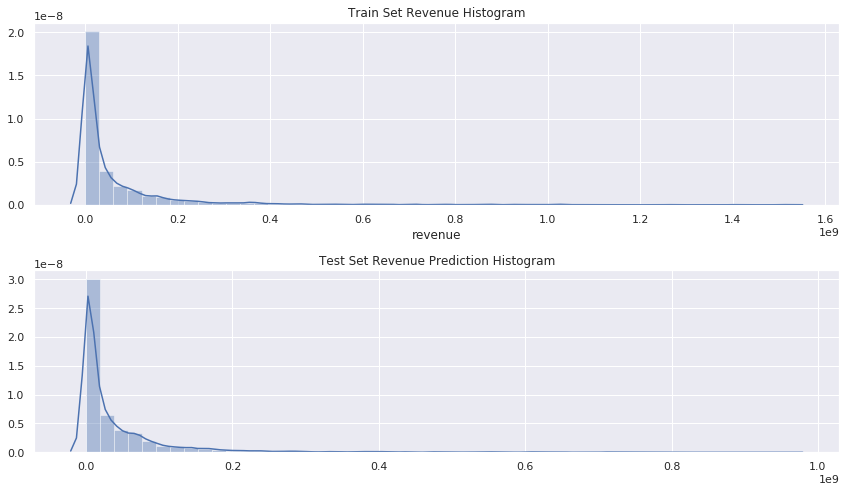

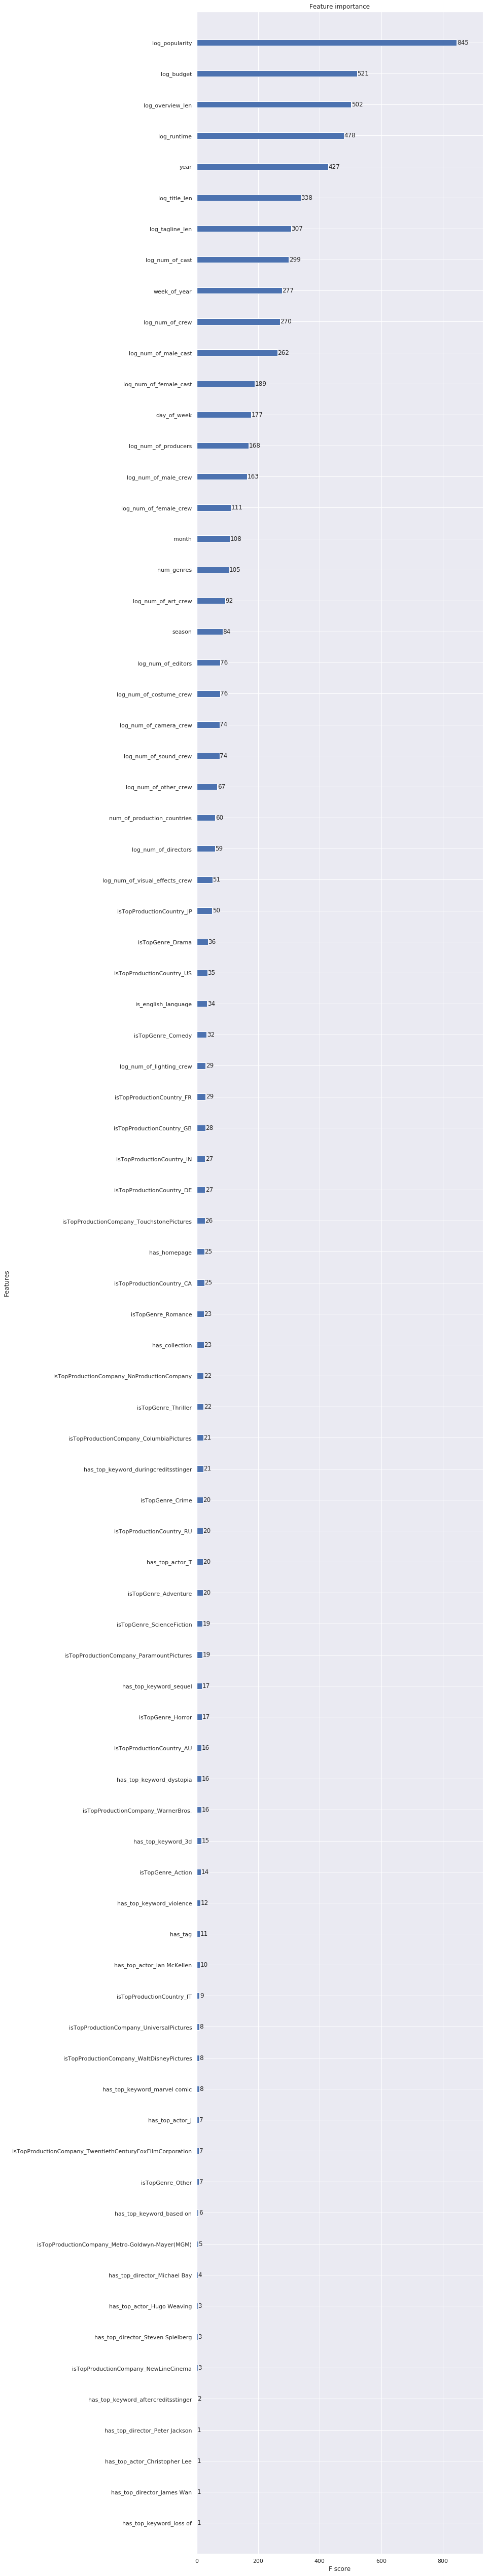

In [335]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt
import time
import random

import xgboost as xgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)


predictions_test_xgb = np.zeros(len(test_df))
num_fold = 0
num_of_splits = kfold_splits
oof_rmse = 0

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()

    clf_stra_xgb = xgb.XGBRegressor(n_estimators=10000, seed=42, nthread=-1)

    clf_stra_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    predictions_valid = clf_stra_xgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    
    print("Fold",num_fold,"xvalid rmse:",rmse_valid)
    num_fold = num_fold + 1
    
    oof_rmse += rmse_valid

    predictions_test_xgb += clf_stra_xgb.predict(test_df[xtrain.columns])/num_of_splits


predictions_test_xgb = np.expm1(predictions_test_xgb)
print()
print(predictions_test_xgb)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,86)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_test_xgb, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

xgb.plot_importance(clf_stra_xgb)

### Bayesian Tuning

In [336]:
def bayesian_tuning(xtrain, ytrain):
    
    from skopt import BayesSearchCV
    import xgboost as xgb
    
    
    # Classifier
    bayes_cv_tuner = BayesSearchCV(
        estimator = xgb.XGBRegressor(
            nthread = -1,
            objective = 'reg:linear',
            verbosity=1,
            random_state=42
        ),
        search_spaces = {
            'learning_rate': (0.01, 1.0, 'log-uniform'),
            'min_child_weight': (0, 10),
            'n_estimators': (50, 300),
            'max_depth': (2, 12),
            'gamma': (1e-3, 1, 'log-uniform'),
            'subsample': (0.01, 1.0, 'uniform'),
            'colsample_bytree': (0.01, 1.0, 'uniform'),
            'colsample_bylevel': (0.01, 1.0, 'uniform'),
            'reg_lambda': (1e-1, 10, 'log-uniform'),
            'reg_alpha': (1e-2, 1.0, 'log-uniform')
        },
        cv = KFold(
            n_splits=kfold_splits,
            shuffle=True,
            random_state=42
        ),
        scoring = 'neg_mean_squared_error',
        n_jobs = 2,
        n_iter = 12,
        verbose=0,
        refit = True,
        random_state = 42
    )

    def status_print(optim_result):
        """Status callback durring bayesian hyperparameter search"""

        # Get all the models tested so far in DataFrame format
        all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    

        # Get current parameters and the best parameters    
        best_params = pd.Series(bayes_cv_tuner.best_params_)
        print('Model #{}\nBest score: {}\nBest params: {}\n'.format(
            len(all_models),
            np.round(bayes_cv_tuner.best_score_, 4),
            bayes_cv_tuner.best_params_
        ))
        
    result = bayes_cv_tuner.fit(xtrain, ytrain, callback = status_print)
    return result
    
# Fit the model
#xtrain, ytrain = prepare_for_tuning(X, y, type_of_training=type_of_training)
result = bayesian_tuning(xtrain, ytrain)

Model #1
Best score: -4.9654
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 0.6289324408100383, 'learning_rate': 0.042815319280763466, 'max_depth': 9, 'min_child_weight': 4, 'n_estimators': 138, 'reg_alpha': 0.30130647758680273, 'reg_lambda': 0.4063746627400017, 'subsample': 0.6513136724634089}

Model #2
Best score: -4.9654
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 0.6289324408100383, 'learning_rate': 0.042815319280763466, 'max_depth': 9, 'min_child_weight': 4, 'n_estimators': 138, 'reg_alpha': 0.30130647758680273, 'reg_lambda': 0.4063746627400017, 'subsample': 0.6513136724634089}

Model #3
Best score: -4.7227
Best params: {'colsample_bylevel': 0.4503841871781403, 'colsample_bytree': 0.9195352964526833, 'gamma': 0.0020633717282254284, 'learning_rate': 0.07356404539935663, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 89, 'reg_alpha': 0.31849679224816907, 'reg_

In [337]:
result.best_params_

{'colsample_bylevel': 0.4503841871781403,
 'colsample_bytree': 0.9195352964526833,
 'gamma': 0.0020633717282254284,
 'learning_rate': 0.07356404539935663,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 89,
 'reg_alpha': 0.31849679224816907,
 'reg_lambda': 1.3022094602394507,
 'subsample': 0.9734749079159599}

### XGBoost Training after tuning


Fold: 0

[0]	validation_0-rmse:14.5988	validation_1-rmse:14.525
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:1.64555	validation_1-rmse:1.95475
[200]	validation_0-rmse:1.36158	validation_1-rmse:1.96837
[300]	validation_0-rmse:1.14631	validation_1-rmse:1.96951
[400]	validation_0-rmse:0.970959	validation_1-rmse:1.97002
[500]	validation_0-rmse:0.835251	validation_1-rmse:1.98136
[600]	validation_0-rmse:0.718036	validation_1-rmse:1.98506
[700]	validation_0-rmse:0.623429	validation_1-rmse:1.99714
[800]	validation_0-rmse:0.537362	validation_1-rmse:2.00321
[900]	validation_0-rmse:0.462859	validation_1-rmse:2.00542
[1000]	validation_0-rmse:0.400873	validation_1-rmse:2.00874
[1100]	validation_0-rmse:0.347546	validation_1-rmse:2.00969
Stopping. Best iteration:
[149]	validation_0-rmse:1.49916	validation_1-rmse:1.94809

Fold 0 xvalid rmse: 2.0309901175304104

F

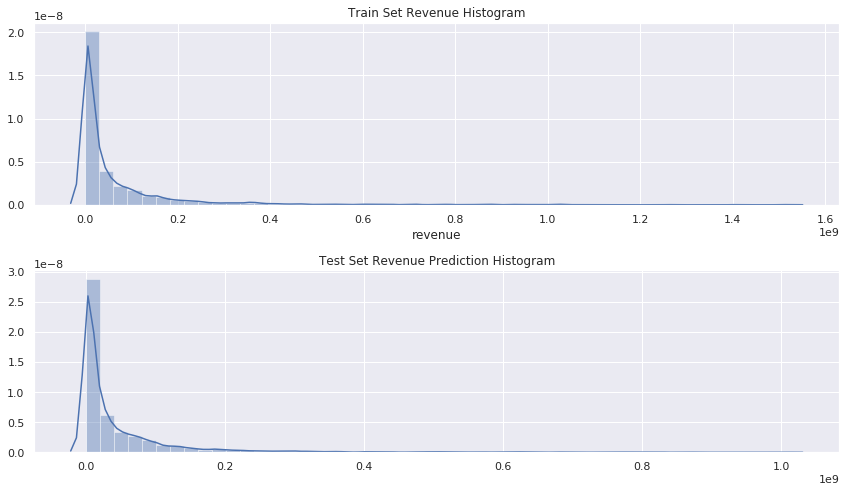

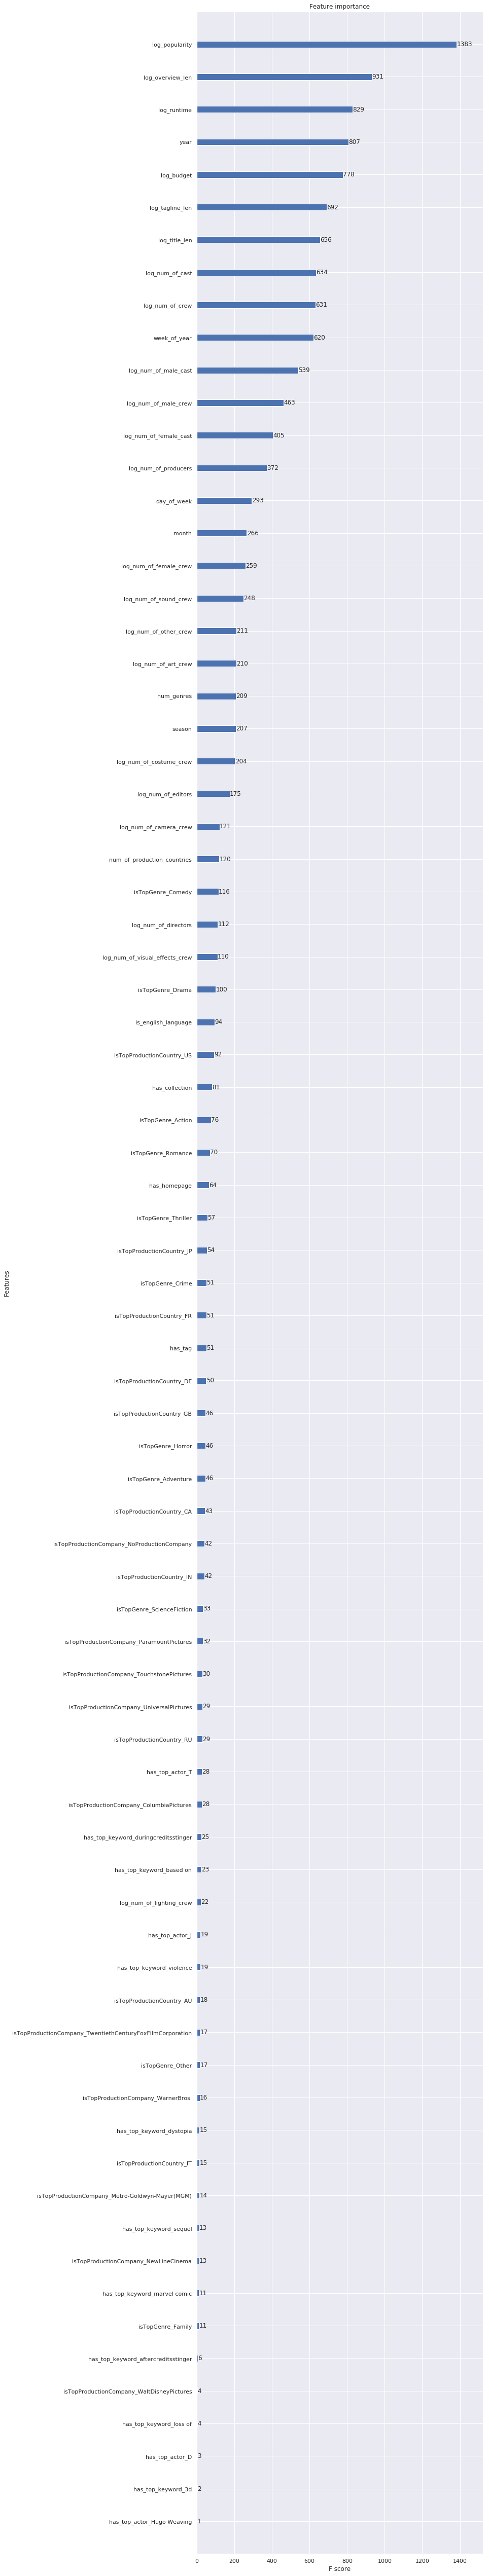

In [338]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

import xgboost as xgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

predictions_test_xgb_tuned = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = kfold_splits

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
    
    clf_stra_tuned_xgb = xgb.XGBRegressor(colsample_bytree = result.best_params_["colsample_bytree"],
                                          colsample_bylevel = result.best_params_["colsample_bylevel"],
                                    gamma=result.best_params_["gamma"],                 
                                    learning_rate=result.best_params_["learning_rate"],
                                    max_depth=result.best_params_["max_depth"],
                                    min_child_weight=result.best_params_["min_child_weight"],
                                    n_estimators=10000,
                                    reg_alpha=result.best_params_["reg_alpha"],
                                    reg_lambda=result.best_params_["reg_lambda"],
                                    subsample=result.best_params_["subsample"],
                                    seed=42,
                                    nthread = -1)

    clf_stra_tuned_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    predictions_valid = clf_stra_tuned_xgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold",num_fold,"xvalid rmse:",rmse_valid)
    num_fold = num_fold + 1
    
    oof_rmse += rmse_valid

    predictions_test_xgb_tuned += clf_stra_tuned_xgb.predict(test_df[xtrain.columns])/num_of_splits
    
print()
predictions_test_xgb_tuned = np.expm1(predictions_test_xgb_tuned)
print(predictions_test_xgb_tuned)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,86)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_test_xgb_tuned, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

xgb.plot_importance(clf_stra_tuned_xgb)

### Extra Trees Baseline Modeling


Fold: 0

Fold 0 xvalid rmse: 2.026827932224437

Fold: 1

Fold 1 xvalid rmse: 2.059998827901778

Fold: 2

Fold 2 xvalid rmse: 2.042510935654307

Fold: 3

Fold 3 xvalid rmse: 2.026918693679775

Fold: 4

Fold 4 xvalid rmse: 2.0240327017287565

[ 9461245.67433497  1818102.47677133 11717578.35424889 ...
 28877170.42830033  2952941.03044221   704146.40694344]

OOF Out-of-fold rmse: 2.0360578182378104


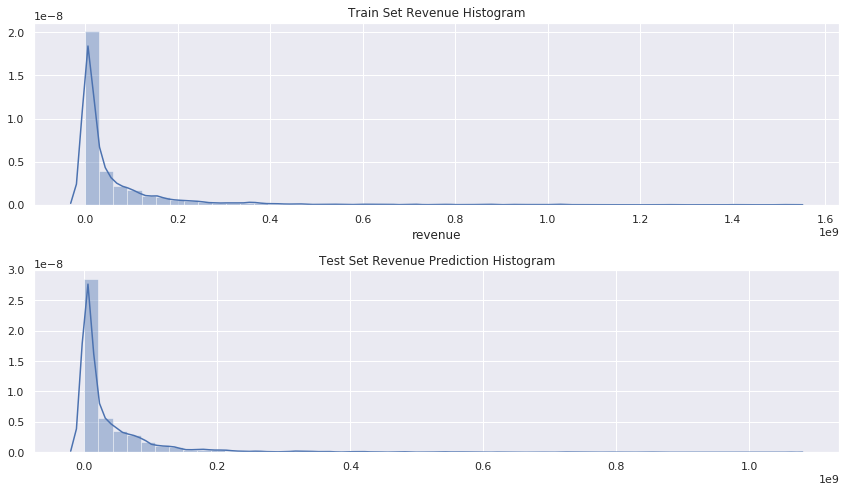

In [339]:
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

predictions_extra_trees_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = kfold_splits
oof_rmse = 0

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()

    clf_extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)

    clf_extra_trees.fit(xtrain_stra, ytrain_stra)

    predictions_valid = clf_extra_trees.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    oof_rmse += rmse_valid

    predictions_extra_trees_test += clf_extra_trees.predict(test_df[xtrain.columns])/num_of_splits


predictions_extra_trees_test = np.expm1(predictions_extra_trees_test)
print()
print(predictions_extra_trees_test)
print()
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_extra_trees_test, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

### Extra Trees Tuning

In [340]:
def bayesian_tuning_extra_trees(xtrain, ytrain):
    
    from skopt import BayesSearchCV
    from sklearn.ensemble import ExtraTreesRegressor
    
    
    # Classifier
    bayes_cv_tuner = BayesSearchCV(
        estimator = ExtraTreesRegressor(
            random_state=42
        ),
        search_spaces = {
            'n_estimators': (10, 500),
            'max_depth': (1, 12),
            'min_samples_split': (2, 20),
            'min_samples_leaf': (1, 20)
        },
        cv = KFold(
            n_splits=kfold_splits,
            shuffle=True,
            random_state=42
        ),
        scoring = 'neg_mean_squared_error',
        n_jobs = 2,
        n_iter = 12,   
        verbose = 0,
        refit = True,
        random_state = 42
    )

    def status_print(optim_result):
        """Status callback durring bayesian hyperparameter search"""

        # Get all the models tested so far in DataFrame format
        all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    

        # Get current parameters and the best parameters    
        best_params = pd.Series(bayes_cv_tuner.best_params_)
        print('Model #{}\nBest score: {}\nBest params: {}\n'.format(
            len(all_models),
            np.round(bayes_cv_tuner.best_score_, 4),
            bayes_cv_tuner.best_params_
        ))
        
    result_extra_trees = bayes_cv_tuner.fit(xtrain, ytrain, callback = status_print)
    return result_extra_trees
    
# Fit the model
#xtrain, ytrain = prepare_for_tuning(X, y, type_of_training=type_of_training)
result_extra_trees = bayesian_tuning_extra_trees(xtrain, ytrain)

Model #1
Best score: -5.05
Best params: {'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 19, 'n_estimators': 165}

Model #2
Best score: -4.9846
Best params: {'max_depth': 10, 'min_samples_leaf': 18, 'min_samples_split': 7, 'n_estimators': 476}

Model #3
Best score: -4.9846
Best params: {'max_depth': 10, 'min_samples_leaf': 18, 'min_samples_split': 7, 'n_estimators': 476}

Model #4
Best score: -4.8271
Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 13, 'n_estimators': 403}

Model #5
Best score: -4.8271
Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 13, 'n_estimators': 403}

Model #6
Best score: -4.8271
Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 13, 'n_estimators': 403}

Model #7
Best score: -4.8271
Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 13, 'n_estimators': 403}

Model #8
Best score: -4.8271
Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samp

In [341]:
result_extra_trees.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 13,
 'n_estimators': 308}

### Extra Trees Training after tuning


Fold: 0

Fold 0 xvalid rmse: 2.0233245498980708

Fold: 1

Fold 1 xvalid rmse: 2.0556377127248835

Fold: 2

Fold 2 xvalid rmse: 2.0342092144102613

Fold: 3

Fold 3 xvalid rmse: 2.015001814187989

Fold: 4

Fold 4 xvalid rmse: 2.021259508478272

[ 5159977.70564302  1573526.79982504  8787797.72571353 ...
 26303566.04905938  4264451.865804    1361839.60892681]

OOF Out-of-fold rmse: 2.0298865599398956


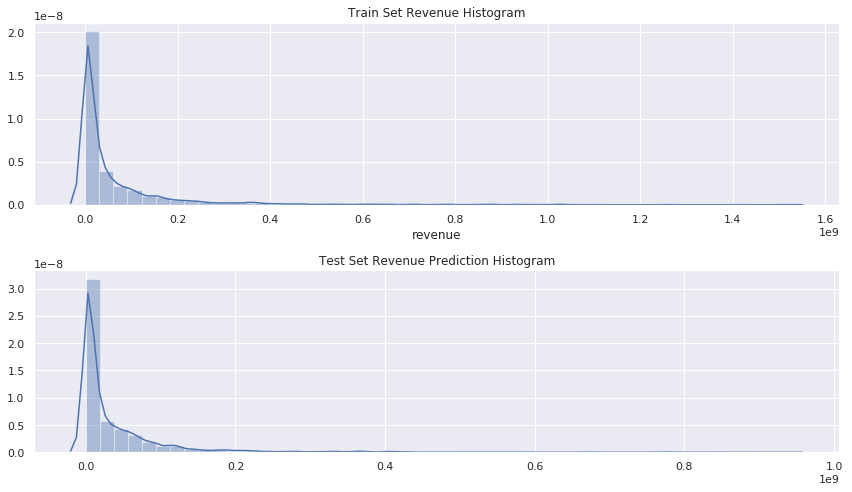

In [342]:
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

predictions_extra_trees_tuned_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = kfold_splits
oof_rmse = 0

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()

    clf_extra_trees_tuned = ExtraTreesRegressor(random_state=42, 
                                                max_depth = result_extra_trees.best_params_['max_depth'], 
                                                min_samples_leaf = result_extra_trees.best_params_['min_samples_leaf'], 
                                                min_samples_split = result_extra_trees.best_params_['min_samples_split'], 
                                                n_estimators = result_extra_trees.best_params_['n_estimators'])

    clf_extra_trees_tuned.fit(xtrain_stra, ytrain_stra)

    predictions_valid = clf_extra_trees_tuned.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    oof_rmse += rmse_valid

    predictions_extra_trees_tuned_test += clf_extra_trees_tuned.predict(test_df[xtrain.columns])/num_of_splits


predictions_extra_trees_tuned_test = np.expm1(predictions_extra_trees_tuned_test)
print()
print(predictions_extra_trees_tuned_test)
print()
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_extra_trees_tuned_test, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

### Random Forest Baseline


Fold: 0

Fold 0 xvalid rmse: 2.100908418611425

Fold: 1

Fold 1 xvalid rmse: 2.0936049941656503

Fold: 2

Fold 2 xvalid rmse: 2.0947353184601036

Fold: 3

Fold 3 xvalid rmse: 2.084366024526937

Fold: 4

Fold 4 xvalid rmse: 2.068870624371002

[ 2657103.58943137   911500.26264256 13789195.93901251 ...
 33163575.16097363  3116730.15340215   630911.02191056]

OOF Out-of-fold rmse: 2.0884970760270236


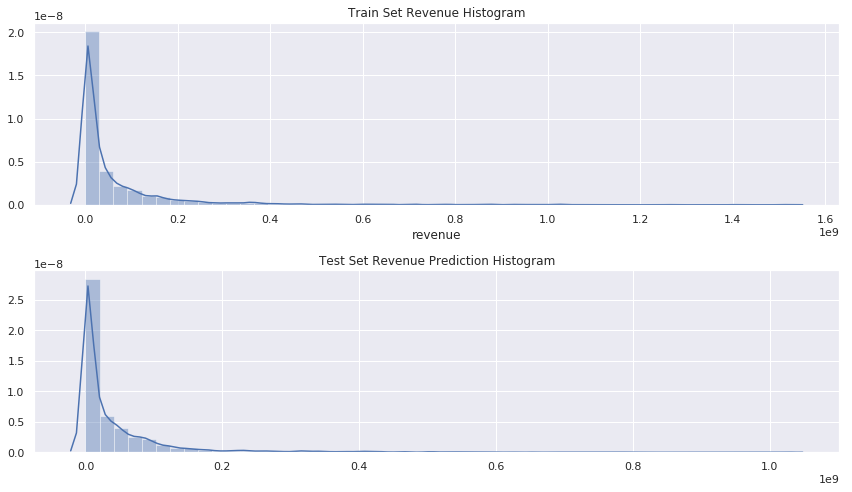

In [343]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

predictions_random_forest_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = kfold_splits
oof_rmse = 0

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
    
    clf_random_forest = RandomForestRegressor(random_state=42, n_estimators = 100)

    clf_random_forest.fit(xtrain_stra, ytrain_stra)

    predictions_valid = clf_random_forest.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    oof_rmse += rmse_valid

    predictions_random_forest_test += clf_random_forest.predict(test_df[xtrain.columns])/num_of_splits


predictions_random_forest_test = np.expm1(predictions_random_forest_test)
print()
print(predictions_random_forest_test)
print()
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_random_forest_test, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

### Random Forest Tuning

In [344]:
def bayesian_tuning_random_forest(xtrain, ytrain):
    
    from skopt import BayesSearchCV
    from sklearn.ensemble import RandomForestRegressor
    
    
    # Classifier
    bayes_cv_tuner = BayesSearchCV(
        estimator = RandomForestRegressor(
            random_state=42
        ),
        search_spaces = {
            'n_estimators': (10, 500),
            'max_depth': (1, 10),
            'min_samples_split': (2, 20),
            'min_samples_leaf': (1, 20)
        },
        cv = KFold(
            n_splits=kfold_splits,
            shuffle=True,
            random_state=42
        ),
        scoring = 'neg_mean_squared_error',
        n_jobs = 2,
        n_iter = 12,   
        verbose = 0,
        refit = True,
        random_state = 42
    )

    def status_print(optim_result):
        """Status callback durring bayesian hyperparameter search"""

        # Get all the models tested so far in DataFrame format
        all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    

        # Get current parameters and the best parameters    
        best_params = pd.Series(bayes_cv_tuner.best_params_)
        print('Model #{}\nBest score: {}\nBest params: {}\n'.format(
            len(all_models),
            np.round(bayes_cv_tuner.best_score_, 4),
            bayes_cv_tuner.best_params_
        ))
        
    result_random_forest = bayes_cv_tuner.fit(xtrain, ytrain, callback = status_print)
    return result_random_forest
    
# Fit the model
#xtrain, ytrain = prepare_for_tuning(X, y, type_of_training=type_of_training)
result_random_forest = bayesian_tuning_random_forest(xtrain, ytrain)

Model #1
Best score: -4.9615
Best params: {'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 19, 'n_estimators': 165}

Model #2
Best score: -4.8928
Best params: {'max_depth': 9, 'min_samples_leaf': 18, 'min_samples_split': 7, 'n_estimators': 476}

Model #3
Best score: -4.8928
Best params: {'max_depth': 9, 'min_samples_leaf': 18, 'min_samples_split': 7, 'n_estimators': 476}

Model #4
Best score: -4.8928
Best params: {'max_depth': 9, 'min_samples_leaf': 18, 'min_samples_split': 7, 'n_estimators': 476}

Model #5
Best score: -4.8928
Best params: {'max_depth': 9, 'min_samples_leaf': 18, 'min_samples_split': 7, 'n_estimators': 476}

Model #6
Best score: -4.8928
Best params: {'max_depth': 9, 'min_samples_leaf': 18, 'min_samples_split': 7, 'n_estimators': 476}

Model #7
Best score: -4.8928
Best params: {'max_depth': 9, 'min_samples_leaf': 18, 'min_samples_split': 7, 'n_estimators': 476}

Model #8
Best score: -4.8928
Best params: {'max_depth': 9, 'min_samples_leaf': 18, 'min_samples_

In [345]:
result_random_forest.best_params_

{'max_depth': 10,
 'min_samples_leaf': 14,
 'min_samples_split': 18,
 'n_estimators': 214}

### Random Forest After tuning


Fold: 0

Fold xvalid rmse: 2.0794653636384743

Fold: 0

Fold xvalid rmse: 2.070876420217407

Fold: 0

Fold xvalid rmse: 2.067426162770401

Fold: 0

Fold xvalid rmse: 2.0579890264615206

Fold: 0

Fold xvalid rmse: 2.0617531968395086

[ 2657103.58943137   911500.26264256 13789195.93901251 ...
 33163575.16097363  3116730.15340215   630911.02191056]

OOF Out-of-fold rmse: 2.0675020339854617


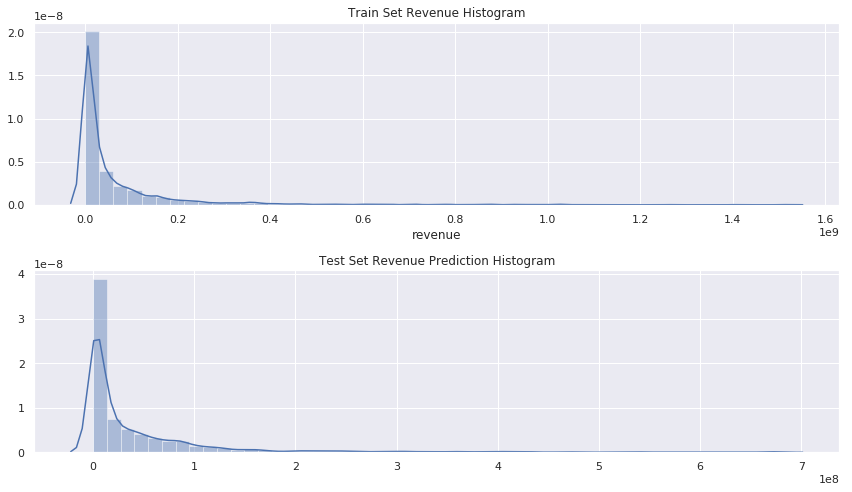

In [346]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

predictions_random_forest_tuned_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = kfold_splits
oof_rmse = 0

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
    
    clf_random_forest_tuned = RandomForestRegressor(random_state=42, 
                                              n_estimators = result_random_forest.best_params_['n_estimators'],
                                              min_samples_leaf = result_random_forest.best_params_['min_samples_leaf'],
                                              min_samples_split = result_random_forest.best_params_['min_samples_split'])

    clf_random_forest_tuned.fit(xtrain_stra, ytrain_stra)

    predictions_valid = clf_random_forest_tuned.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold xvalid rmse:", rmse_valid)
    oof_rmse += rmse_valid

    predictions_random_forest_tuned_test += clf_random_forest_tuned.predict(test_df[xtrain.columns])/num_of_splits


predictions_random_forest_tuned_test = np.expm1(predictions_random_forest_tuned_test)
print()
print(predictions_random_forest_test)
print()
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_random_forest_tuned_test, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

### LightGBM Boosting


Fold: 0

Training until validation scores don't improve for 1000 rounds.
[100]	training's rmse: 0.804782	valid_1's rmse: 2.16105
[200]	training's rmse: 0.397781	valid_1's rmse: 2.17079
[300]	training's rmse: 0.212191	valid_1's rmse: 2.17401
[400]	training's rmse: 0.116936	valid_1's rmse: 2.17201
[500]	training's rmse: 0.0668714	valid_1's rmse: 2.17341
[600]	training's rmse: 0.0414724	valid_1's rmse: 2.17276
[700]	training's rmse: 0.0268454	valid_1's rmse: 2.17256
[800]	training's rmse: 0.0185983	valid_1's rmse: 2.17264
[900]	training's rmse: 0.0132796	valid_1's rmse: 2.17285
[1000]	training's rmse: 0.00964473	valid_1's rmse: 2.17276
Early stopping, best iteration is:
[20]	training's rmse: 1.74463	valid_1's rmse: 2.11414
Fold 0 xvalid rmse: 2.084760040832177

Fold: 1

Training until validation scores don't improve for 1000 rounds.
[100]	training's rmse: 0.785763	valid_1's rmse: 2.18262
[200]	training's rmse: 0.382297	valid_1's rmse: 2.21489
[300]	training's rmse: 0.204216	valid_1's rms

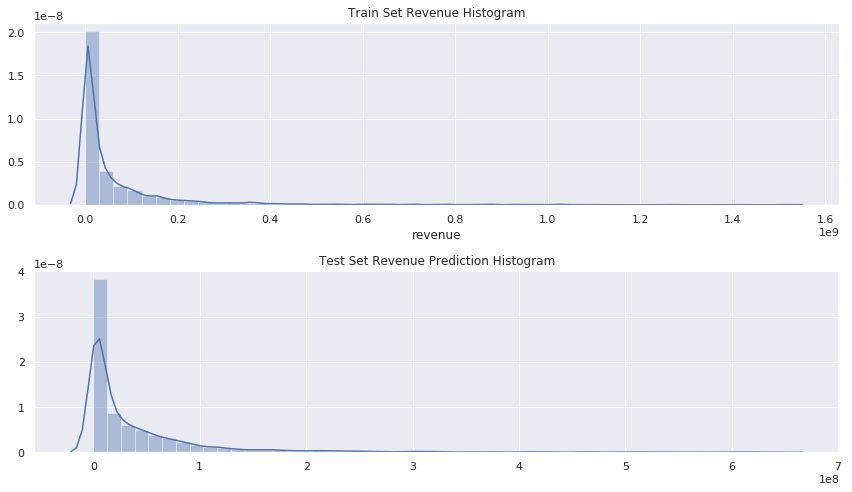

In [347]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

import lightgbm as lgb

params = {
    "metric": 'rmse',
    "verbosity": -1
}

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

predictions_test_lgb = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = kfold_splits

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
    
    model_lgb = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
    model_lgb.fit(xtrain_stra, ytrain_stra, 
        eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], eval_metric='rmse',
        verbose=100, early_stopping_rounds=1000)

    predictions_valid = model_lgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    
    oof_rmse += rmse_valid

    predictions_test_lgb += model_lgb.predict(test_df[xtrain.columns])/num_of_splits
    

predictions_test_lgb = np.expm1(predictions_test_lgb)
print()
print(predictions_test_lgb)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))

sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_test_lgb, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

#xgb.plot_importance(clf_stra_fs_tuned_xgb)

### Tuning the LightGBM

In [348]:
def bayesian_tuning_lgb(xtrain, ytrain):
    
    from skopt import BayesSearchCV    
    
    # Classifier
    bayes_cv_tuner = BayesSearchCV(
        estimator = lgb.LGBMRegressor(
            boosting_type='gbdt', n_jobs=2, nthread = 4, verbose=-1
        ),
        search_spaces = {
            'num_leaves': (10, 100),
            'min_data_in_leaf': (10, 100),
            'n_estimators': (50, 100),
            'max_depth': (3, 12),
            'learning_rate': (0.01, 0.2, 'log-uniform'),
            "feature_fraction": (0.1, 1, 'uniform'),
            "bagging_fraction": (0.1, 1, 'uniform'),
            'lambda_l1': (0.1, 1, 'log-uniform'),
            'lambda_l2': (0.1, 1, 'log-uniform')
        },
        cv = KFold(
            n_splits=kfold_splits,
            shuffle=True,
            random_state=42
        ),
        scoring = 'neg_mean_squared_error',
        n_jobs = 1,
        n_iter = 12,   
        verbose = 0,
        refit = True,
        random_state = 42
    )

    def status_print(optim_result):
        """Status callback durring bayesian hyperparameter search"""

        # Get all the models tested so far in DataFrame format
        all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    

        # Get current parameters and the best parameters    
        best_params = pd.Series(bayes_cv_tuner.best_params_)
        print('Model #{}\nBest score: {}\nBest params: {}\n'.format(
            len(all_models),
            np.round(bayes_cv_tuner.best_score_, 4),
            bayes_cv_tuner.best_params_
        ))
        
    result_lgbm = bayes_cv_tuner.fit(xtrain, ytrain, callback = status_print)
    return result_lgbm
    
# Fit the model
#xtrain, ytrain = prepare_for_tuning(X, y, type_of_training=type_of_training)
result_lgbm = bayesian_tuning_lgb(xtrain, ytrain)

Model #1
Best score: -4.8113
Best params: {'bagging_fraction': 0.46909356296798244, 'feature_fraction': 0.7549531688595925, 'lambda_l1': 0.8567773934012717, 'lambda_l2': 0.2069186296126172, 'learning_rate': 0.07445306521049057, 'max_depth': 7, 'min_data_in_leaf': 42, 'n_estimators': 87, 'num_leaves': 37}

Model #2
Best score: -4.8113
Best params: {'bagging_fraction': 0.46909356296798244, 'feature_fraction': 0.7549531688595925, 'lambda_l1': 0.8567773934012717, 'lambda_l2': 0.2069186296126172, 'learning_rate': 0.07445306521049057, 'max_depth': 7, 'min_data_in_leaf': 42, 'n_estimators': 87, 'num_leaves': 37}

Model #3
Best score: -4.8113
Best params: {'bagging_fraction': 0.46909356296798244, 'feature_fraction': 0.7549531688595925, 'lambda_l1': 0.8567773934012717, 'lambda_l2': 0.2069186296126172, 'learning_rate': 0.07445306521049057, 'max_depth': 7, 'min_data_in_leaf': 42, 'n_estimators': 87, 'num_leaves': 37}

Model #4
Best score: -4.8113
Best params: {'bagging_fraction': 0.46909356296798

In [349]:
result_lgbm.best_params_

{'bagging_fraction': 0.6553714226520847,
 'feature_fraction': 0.7978279409450943,
 'lambda_l1': 0.22857194923505542,
 'lambda_l2': 0.7487301044966821,
 'learning_rate': 0.059022278849586975,
 'max_depth': 8,
 'min_data_in_leaf': 68,
 'n_estimators': 71,
 'num_leaves': 76}

### LGBM training after tuning


Fold: 0

Training until validation scores don't improve for 1000 rounds.
[100]	training's rmse: 1.9198	valid_1's rmse: 2.00278
[200]	training's rmse: 1.70684	valid_1's rmse: 2.02834
[300]	training's rmse: 1.54927	valid_1's rmse: 2.05453
[400]	training's rmse: 1.41247	valid_1's rmse: 2.07663
[500]	training's rmse: 1.29638	valid_1's rmse: 2.09377
[600]	training's rmse: 1.19253	valid_1's rmse: 2.09896
[700]	training's rmse: 1.0994	valid_1's rmse: 2.10868
[800]	training's rmse: 1.02008	valid_1's rmse: 2.10965
[900]	training's rmse: 0.945347	valid_1's rmse: 2.1193
[1000]	training's rmse: 0.88064	valid_1's rmse: 2.13138
Early stopping, best iteration is:
[66]	training's rmse: 2.01706	valid_1's rmse: 1.99676
Fold 0 xvalid rmse: 2.0589067282948874

Fold: 1

Training until validation scores don't improve for 1000 rounds.
[100]	training's rmse: 1.89103	valid_1's rmse: 2.09157
[200]	training's rmse: 1.68366	valid_1's rmse: 2.10697
[300]	training's rmse: 1.51877	valid_1's rmse: 2.12747
[400]	trai

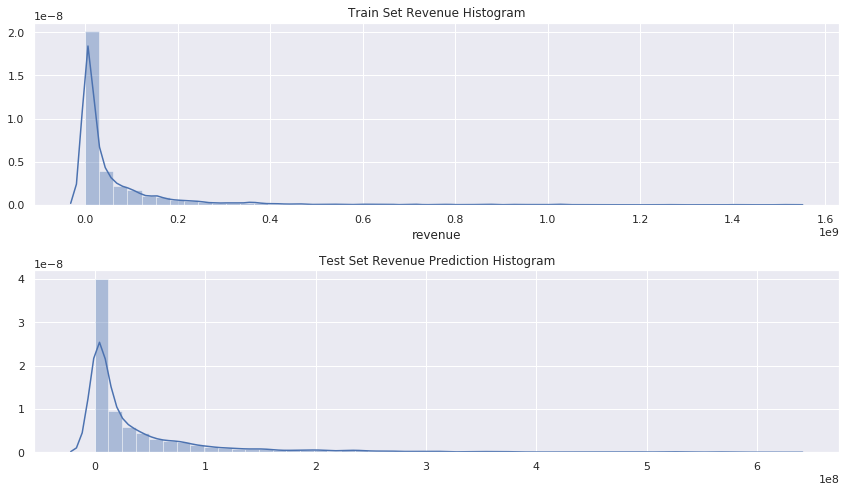

In [350]:
params = {
    'num_leaves': result_lgbm.best_params_["num_leaves"],
    'min_data_in_leaf': result_lgbm.best_params_["min_data_in_leaf"],
    'max_depth': result_lgbm.best_params_["max_depth"],
    'learning_rate': result_lgbm.best_params_["learning_rate"],
    "boosting": "gbdt",
    "feature_fraction": result_lgbm.best_params_["feature_fraction"],
    "bagging_freq": 1,
    "bagging_fraction": result_lgbm.best_params_["bagging_fraction"],
    "bagging_seed": 11,
    "metric": 'rmse',
    "lambda_l1": result_lgbm.best_params_["lambda_l1"],
    "lambda_l2": result_lgbm.best_params_["lambda_l2"],
    "verbosity": -1
}


from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

import lightgbm as lgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

predictions_test_lgb_tuned = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = kfold_splits

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
    
    model_lgb_tuned = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
    model_lgb_tuned.fit(xtrain_stra, ytrain_stra, 
        eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], eval_metric='rmse',
        verbose=100, early_stopping_rounds=1000)

    predictions_valid = model_lgb_tuned.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    oof_rmse += rmse_valid

    predictions_test_lgb_tuned += model_lgb_tuned.predict(test_df[xtrain.columns])/num_of_splits
    

predictions_test_lgb_tuned = np.expm1(predictions_test_lgb_tuned)
print()
print(predictions_test_lgb_tuned)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))

sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_test_lgb_tuned, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

#xgb.plot_importance(clf_stra_fs_tuned_xgb)

## Feature Selection

### Feature Selection for xgboost

In [351]:
from sklearn.feature_selection import SelectFromModel

max_selected_features = 200
sel = SelectFromModel(clf_stra_xgb, max_features = max_selected_features, threshold=0.005, prefit=True)

feature_idx = sel.get_support()
selected_features_xgb = X.columns[feature_idx]

In [352]:
selected_features_xgb

Index(['log_budget', 'log_popularity', 'log_runtime', 'day_of_week', 'year',
       'month', 'week_of_year', 'season', 'num_genres',
       'num_of_production_countries', 'log_num_of_cast',
       'log_num_of_male_cast', 'log_num_of_female_cast', 'has_collection',
       'has_tag', 'is_english_language', 'log_num_of_crew',
       'log_num_of_male_crew', 'log_num_of_female_crew', 'log_title_len',
       'log_overview_len', 'log_tagline_len', 'log_num_of_directors',
       'log_num_of_producers', 'log_num_of_editors', 'log_num_of_art_crew',
       'log_num_of_sound_crew', 'log_num_of_costume_crew',
       'log_num_of_visual_effects_crew', 'isTopGenre_Drama',
       'isTopGenre_Other', 'isTopGenre_Comedy', 'isTopGenre_Thriller',
       'isTopGenre_Action', 'isTopGenre_Romance', 'isTopGenre_Crime',
       'isTopGenre_Adventure', 'isTopGenre_Horror',
       'isTopProductionCompany_ParamountPictures',
       'isTopProductionCompany_NoProductionCompany',
       'isTopProductionCompany_Twentie

### Baseline XGBoost with Feature Selection


Fold: 0

[0]	validation_0-rmse:14.1948	validation_1-rmse:14.1258
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:1.73235	validation_1-rmse:1.97118
[200]	validation_0-rmse:1.48989	validation_1-rmse:1.97323
[300]	validation_0-rmse:1.2939	validation_1-rmse:1.97156
[400]	validation_0-rmse:1.14689	validation_1-rmse:1.97022
[500]	validation_0-rmse:1.02575	validation_1-rmse:1.98287
[600]	validation_0-rmse:0.934651	validation_1-rmse:1.99606
[700]	validation_0-rmse:0.836443	validation_1-rmse:2.00818
[800]	validation_0-rmse:0.756819	validation_1-rmse:2.01736
[900]	validation_0-rmse:0.690576	validation_1-rmse:2.02697
[1000]	validation_0-rmse:0.634513	validation_1-rmse:2.03252
Stopping. Best iteration:
[73]	validation_0-rmse:1.81357	validation_1-rmse:1.95339


Fold: 1

[0]	validation_0-rmse:14.1619	validation_1-rmse:14.2513
Multiple eval metrics have been passed

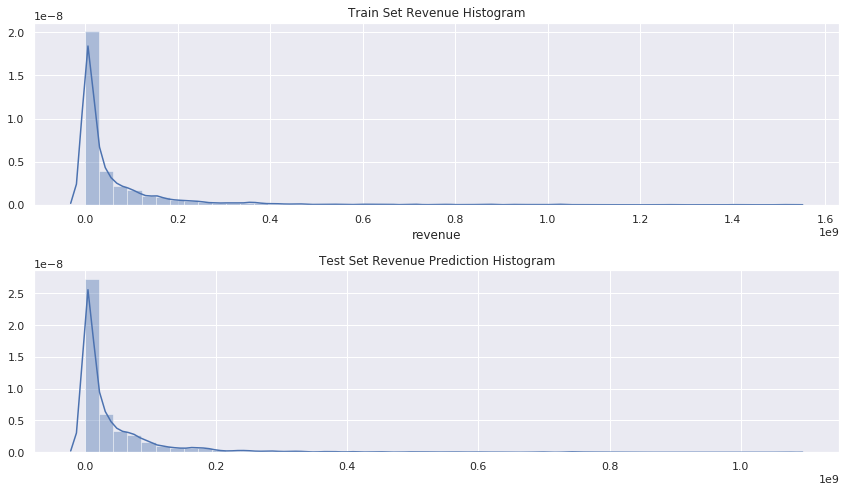

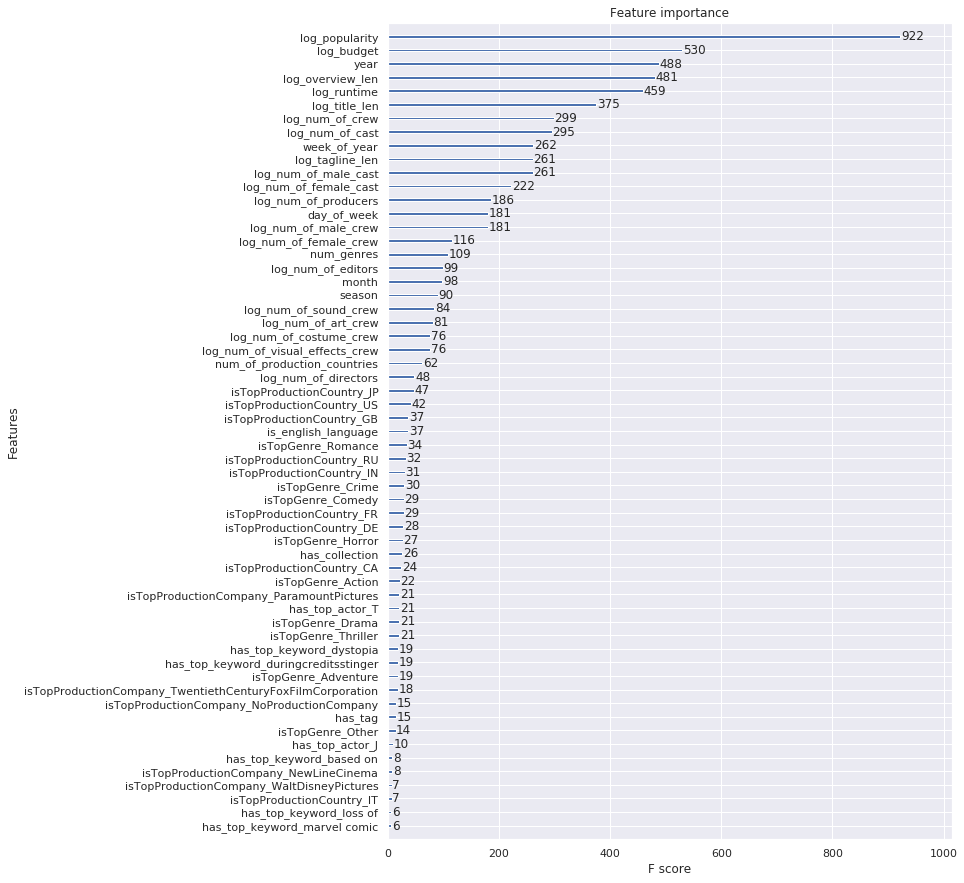

In [353]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
import time
import random
from sklearn.metrics import mean_squared_error

import xgboost as xgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X[selected_features_xgb], y, random_state=42, test_size=0.3)

import xgboost as xgb

start_time = time.time()

predictions_test_xgb_fs = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = kfold_splits

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
    
    
    clf_stra_fs_xgb = xgb.XGBRegressor(n_estimators=10000, seed=42, nthread = -1)

    clf_stra_fs_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    predictions_valid = clf_stra_fs_xgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    
    oof_rmse += rmse_valid

    predictions_test_xgb_fs += clf_stra_fs_xgb.predict(test_df[xtrain.columns])/num_of_splits
    

predictions_test_xgb_fs = np.expm1(predictions_test_xgb_fs)
print(predictions_test_xgb_fs)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))

sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_test_xgb_fs, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

xgb.plot_importance(clf_stra_fs_xgb)

### Tuning with feature Selection

In [354]:
result = bayesian_tuning(xtrain, ytrain)

Model #1
Best score: -4.9165
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 0.6289324408100383, 'learning_rate': 0.042815319280763466, 'max_depth': 9, 'min_child_weight': 4, 'n_estimators': 138, 'reg_alpha': 0.30130647758680273, 'reg_lambda': 0.4063746627400017, 'subsample': 0.6513136724634089}

Model #2
Best score: -4.9165
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 0.6289324408100383, 'learning_rate': 0.042815319280763466, 'max_depth': 9, 'min_child_weight': 4, 'n_estimators': 138, 'reg_alpha': 0.30130647758680273, 'reg_lambda': 0.4063746627400017, 'subsample': 0.6513136724634089}

Model #3
Best score: -4.7995
Best params: {'colsample_bylevel': 0.4503841871781403, 'colsample_bytree': 0.9195352964526833, 'gamma': 0.0020633717282254284, 'learning_rate': 0.07356404539935663, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 89, 'reg_alpha': 0.31849679224816907, 'reg_

### XGBoost training with Feature Selection and tuning


Fold: 0

[0]	validation_0-rmse:14.5979	validation_1-rmse:14.5252
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:1.57045	validation_1-rmse:1.93226
[200]	validation_0-rmse:1.27305	validation_1-rmse:1.91817
[300]	validation_0-rmse:1.05919	validation_1-rmse:1.92667
[400]	validation_0-rmse:0.884391	validation_1-rmse:1.93267
[500]	validation_0-rmse:0.736812	validation_1-rmse:1.94403
[600]	validation_0-rmse:0.61677	validation_1-rmse:1.9467
[700]	validation_0-rmse:0.53326	validation_1-rmse:1.9503
[800]	validation_0-rmse:0.453966	validation_1-rmse:1.95474
[900]	validation_0-rmse:0.383226	validation_1-rmse:1.95831
[1000]	validation_0-rmse:0.328429	validation_1-rmse:1.95849
[1100]	validation_0-rmse:0.281879	validation_1-rmse:1.95822
[1200]	validation_0-rmse:0.243654	validation_1-rmse:1.96039
Stopping. Best iteration:
[206]	validation_0-rmse:1.25547	validation_

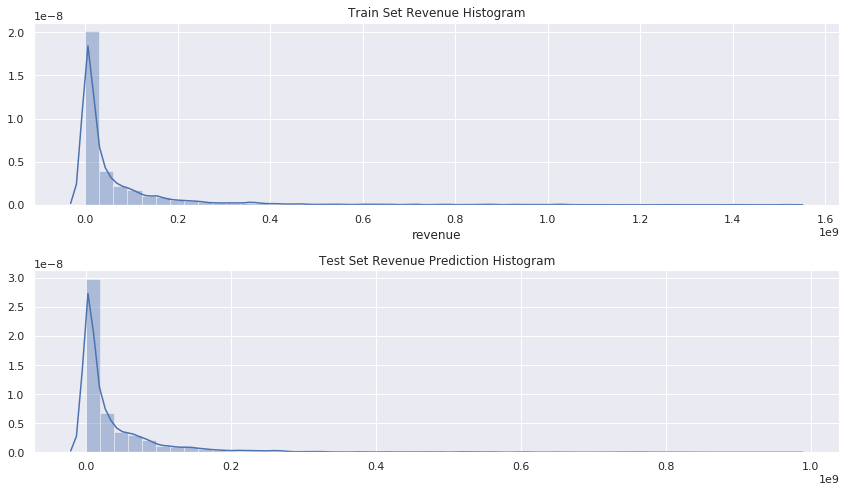

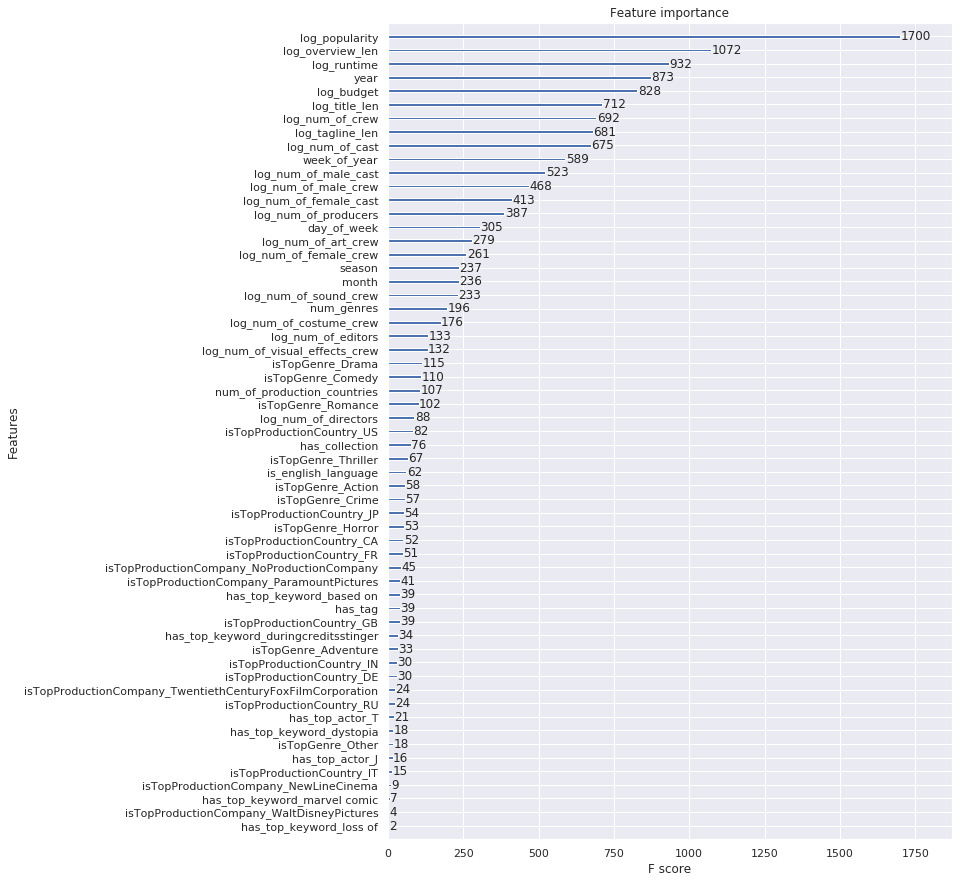

In [355]:
from sklearn.model_selection import train_test_split, KFold
import time
import random
from sklearn.metrics import mean_squared_error

import xgboost as xgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X[selected_features_xgb], y, random_state=42, test_size=0.3)

predictions_test_xgb_fs_tuned = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = kfold_splits

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
    
    
    clf_stra_fs_tuned_xgb = xgb.XGBRegressor(colsample_bytree = result.best_params_["colsample_bytree"],
                                    gamma=result.best_params_["gamma"],                 
                                    learning_rate=result.best_params_["learning_rate"],
                                    max_depth=result.best_params_["max_depth"],
                                    min_child_weight=result.best_params_["min_child_weight"],
                                    n_estimators=10000,
                                    reg_alpha=result.best_params_["reg_alpha"],
                                    reg_lambda=result.best_params_["reg_lambda"],
                                    subsample=result.best_params_["subsample"],
                                    seed=42,
                                    nthread = -1)

    clf_stra_fs_tuned_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    predictions_valid = clf_stra_fs_tuned_xgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    
    oof_rmse += rmse_valid

    predictions_test_xgb_fs_tuned += clf_stra_fs_tuned_xgb.predict(test_df[xtrain.columns])/num_of_splits
    

predictions_test_xgb_fs_tuned = np.expm1(predictions_test_xgb_fs_tuned)
print(predictions_test_xgb_fs_tuned)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))

sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_test_xgb_fs_tuned, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

xgb.plot_importance(clf_stra_fs_tuned_xgb)

### Feature Selection for LGBM

In [356]:
from sklearn.feature_selection import SelectFromModel

max_selected_features = 200
sel = SelectFromModel(model_lgb, max_features = max_selected_features, threshold=0.005, prefit=True)

feature_idx = sel.get_support()
selected_features_lgb = X.columns[feature_idx]

In [357]:
selected_features_lgb

Index(['log_budget', 'log_popularity', 'log_runtime', 'day_of_week', 'year',
       'month', 'week_of_year', 'season', 'num_genres',
       'num_of_production_countries', 'log_num_of_cast',
       'log_num_of_male_cast', 'log_num_of_female_cast', 'has_collection',
       'has_homepage', 'has_tag', 'is_english_language', 'log_num_of_crew',
       'log_num_of_male_crew', 'log_num_of_female_crew', 'log_title_len',
       'log_overview_len', 'log_tagline_len', 'log_num_of_directors',
       'log_num_of_producers', 'log_num_of_editors', 'log_num_of_art_crew',
       'log_num_of_sound_crew', 'log_num_of_costume_crew',
       'log_num_of_camera_crew', 'log_num_of_visual_effects_crew',
       'log_num_of_other_crew', 'isTopGenre_Drama', 'isTopGenre_Other',
       'isTopGenre_Comedy', 'isTopGenre_Thriller', 'isTopGenre_Action',
       'isTopGenre_Romance', 'isTopGenre_Crime', 'isTopGenre_Adventure',
       'isTopGenre_Horror', 'isTopGenre_ScienceFiction',
       'isTopProductionCompany_WarnerBr

### Baseline LGB Training with Feature Selection


Fold: 0

Training until validation scores don't improve for 1000 rounds.
[100]	training's rmse: 0.806252	valid_1's rmse: 2.14632
[200]	training's rmse: 0.396859	valid_1's rmse: 2.16125
[300]	training's rmse: 0.214509	valid_1's rmse: 2.16495
[400]	training's rmse: 0.119942	valid_1's rmse: 2.1633
[500]	training's rmse: 0.0673558	valid_1's rmse: 2.16486
[600]	training's rmse: 0.0395093	valid_1's rmse: 2.16615
[700]	training's rmse: 0.0235977	valid_1's rmse: 2.16665
[800]	training's rmse: 0.0148678	valid_1's rmse: 2.16659
[900]	training's rmse: 0.0100471	valid_1's rmse: 2.16658
[1000]	training's rmse: 0.0071621	valid_1's rmse: 2.16668
Early stopping, best iteration is:
[30]	training's rmse: 1.52851	valid_1's rmse: 2.10423
Fold 0 xvalid rmse: 2.090239890734661

Fold: 1

Training until validation scores don't improve for 1000 rounds.
[100]	training's rmse: 0.793133	valid_1's rmse: 2.18916
[200]	training's rmse: 0.37981	valid_1's rmse: 2.21488
[300]	training's rmse: 0.199059	valid_1's rmse: 

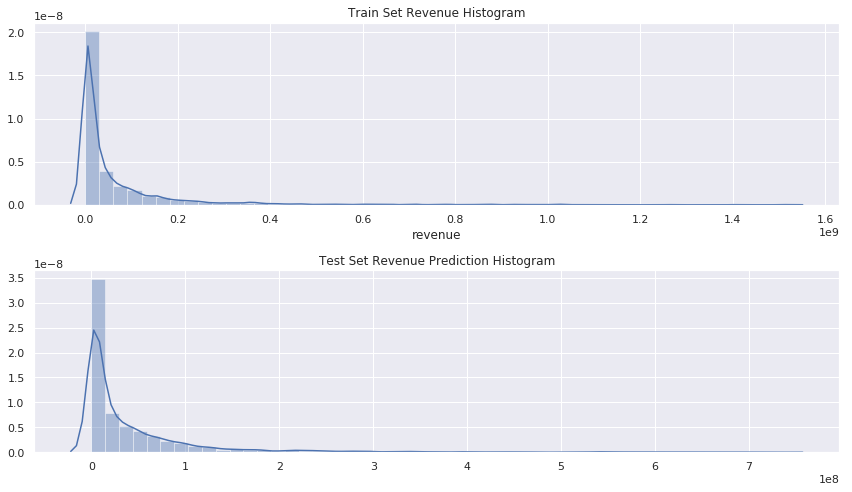

In [358]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

import lightgbm as lgb

params = {
    "metric": 'rmse',
    "verbosity": -1
}

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X[selected_features_lgb], y, random_state=42, test_size=0.3)

predictions_test_lgb_fs = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = kfold_splits

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
    
    model_lgb_fs = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
    model_lgb_fs.fit(xtrain_stra, ytrain_stra, 
        eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], eval_metric='rmse',
        verbose=100, early_stopping_rounds=1000)

    predictions_valid = model_lgb_fs.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    
    oof_rmse += rmse_valid

    predictions_test_lgb_fs += model_lgb_fs.predict(test_df[xtrain.columns])/num_of_splits
    

predictions_test_lgb_fs = np.expm1(predictions_test_lgb_fs)
print()
print(predictions_test_lgb_fs)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))

sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_test_lgb_fs, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

#xgb.plot_importance(clf_stra_fs_tuned_xgb)

### LGB Tuning with Feature Selection

In [359]:
result_lgb = bayesian_tuning_lgb(xtrain, ytrain)

Model #1
Best score: -4.8357
Best params: {'bagging_fraction': 0.46909356296798244, 'feature_fraction': 0.7549531688595925, 'lambda_l1': 0.8567773934012717, 'lambda_l2': 0.2069186296126172, 'learning_rate': 0.07445306521049057, 'max_depth': 7, 'min_data_in_leaf': 42, 'n_estimators': 87, 'num_leaves': 37}

Model #2
Best score: -4.8098
Best params: {'bagging_fraction': 0.8536495199979559, 'feature_fraction': 0.894983749642776, 'lambda_l1': 0.20109909209436555, 'lambda_l2': 0.8937661586109222, 'learning_rate': 0.1331239937608705, 'max_depth': 4, 'min_data_in_leaf': 22, 'n_estimators': 68, 'num_leaves': 67}

Model #3
Best score: -4.8098
Best params: {'bagging_fraction': 0.8536495199979559, 'feature_fraction': 0.894983749642776, 'lambda_l1': 0.20109909209436555, 'lambda_l2': 0.8937661586109222, 'learning_rate': 0.1331239937608705, 'max_depth': 4, 'min_data_in_leaf': 22, 'n_estimators': 68, 'num_leaves': 67}

Model #4
Best score: -4.8098
Best params: {'bagging_fraction': 0.8536495199979559, 

### LGB Training after Feature Selection and Tuning


Fold: 0

Training until validation scores don't improve for 1000 rounds.
[100]	training's rmse: 1.92071	valid_1's rmse: 1.98683
[200]	training's rmse: 1.70649	valid_1's rmse: 2.02682
[300]	training's rmse: 1.55151	valid_1's rmse: 2.04594
[400]	training's rmse: 1.41551	valid_1's rmse: 2.07667
[500]	training's rmse: 1.29917	valid_1's rmse: 2.08743
[600]	training's rmse: 1.19623	valid_1's rmse: 2.09416
[700]	training's rmse: 1.10597	valid_1's rmse: 2.09489
[800]	training's rmse: 1.02583	valid_1's rmse: 2.1044
[900]	training's rmse: 0.953012	valid_1's rmse: 2.12134
[1000]	training's rmse: 0.88863	valid_1's rmse: 2.1226
Early stopping, best iteration is:
[74]	training's rmse: 1.99696	valid_1's rmse: 1.97925
Fold 0 xvalid rmse: 2.05543015769316

Fold: 1

Training until validation scores don't improve for 1000 rounds.
[100]	training's rmse: 1.8951	valid_1's rmse: 2.09417
[200]	training's rmse: 1.68402	valid_1's rmse: 2.10494
[300]	training's rmse: 1.52199	valid_1's rmse: 2.1187
[400]	trainin

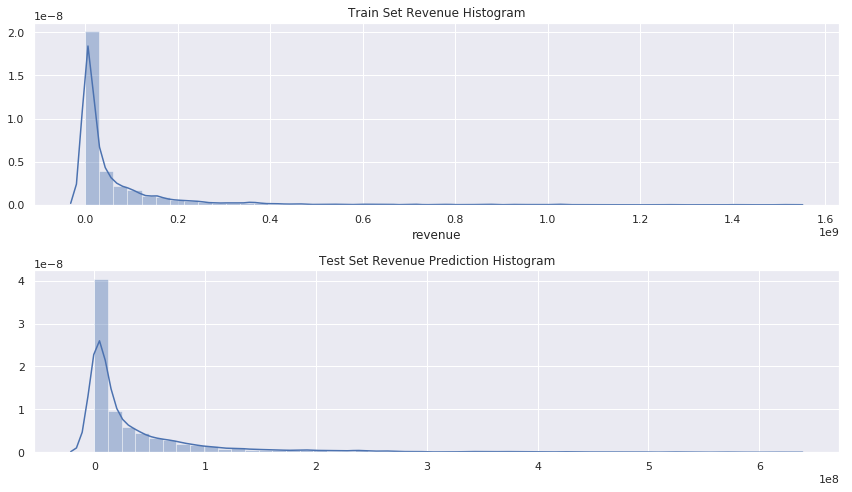

In [360]:
params = {
    'num_leaves': result_lgbm.best_params_["num_leaves"],
    'min_data_in_leaf': result_lgbm.best_params_["min_data_in_leaf"],
    'max_depth': result_lgbm.best_params_["max_depth"],
    'learning_rate': result_lgbm.best_params_["learning_rate"],
    "boosting": "gbdt",
    "feature_fraction": result_lgbm.best_params_["feature_fraction"],
    "bagging_freq": 1,
    "bagging_fraction": result_lgbm.best_params_["bagging_fraction"],
    "bagging_seed": 11,
    "metric": 'rmse',
    "lambda_l1": result_lgbm.best_params_["lambda_l1"],
    "lambda_l2": result_lgbm.best_params_["lambda_l2"],
    "verbosity": -1
}


from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

import lightgbm as lgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X[selected_features_lgb], y, random_state=42, test_size=0.3)

predictions_test_lgb_fs_tuned = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = kfold_splits

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
    
    model_lgb_fs_tuned = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
    model_lgb_fs_tuned.fit(xtrain_stra, ytrain_stra, 
        eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], eval_metric='rmse',
        verbose=100, early_stopping_rounds=1000)

    predictions_valid = model_lgb_fs_tuned.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    oof_rmse += rmse_valid

    predictions_test_lgb_fs_tuned += model_lgb_fs_tuned.predict(test_df[xtrain.columns])/num_of_splits
    

predictions_test_lgb_fs_tuned = np.expm1(predictions_test_lgb_fs_tuned)
print()
print(predictions_test_lgb_fs_tuned)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))

sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_test_lgb_fs_tuned, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

#xgb.plot_importance(clf_stra_fs_tuned_xgb)

## ML Blends

In [361]:
####### xgb with the other models

predictions_test_xgb_extra_trees = (0.5 * predictions_test_xgb) + (0.5 * predictions_extra_trees_test)
predictions_test_xgb_random_forest = (0.5 * predictions_test_xgb) + (0.5 * predictions_random_forest_test)
predictions_test_extra_trees_random_forest = (0.5 * predictions_extra_trees_test) + (0.5 * predictions_random_forest_test)

predictions_test_tuned_xgb_extra_trees = (0.5 * predictions_test_xgb_tuned) + (0.5 * predictions_extra_trees_tuned_test)
predictions_test_tuned_xgb_random_forest = (0.5 * predictions_test_xgb_tuned) + (0.5 * predictions_random_forest_tuned_test)
predictions_test_tuned_extra_trees_random_forest = (0.5 * predictions_extra_trees_tuned_test) + (0.5 * predictions_random_forest_tuned_test)

predictions_test_xgb_fs_extra_trees =  (0.5 * predictions_test_xgb_fs) + (0.5 * predictions_extra_trees_test)
predictions_test_xgb_fs_tuned_extra_trees = (0.5 * predictions_test_xgb_fs_tuned) + (0.5 * predictions_extra_trees_test)

predictions_test_baseline_xgb_tuned_extra_trees = (0.5 * predictions_test_xgb) + (0.5 * predictions_extra_trees_tuned_test)

####### lgb with the other models

predictions_test_lgb_xgb = (0.5 * predictions_test_lgb) + (0.5 * predictions_test_xgb)
predictions_test_tuned_lgb_xgb = (0.5 * predictions_test_lgb_tuned) + (0.5 * predictions_test_xgb_tuned)

predictions_test_lgb_extra_trees = (0.5 * predictions_test_lgb) + (0.5 * predictions_extra_trees_test)
predictions_test_lgb_random_forest = (0.5 * predictions_test_lgb) + (0.5 * predictions_random_forest_test)

predictions_test_tuned_lgb_extra_trees = (0.5 * predictions_test_lgb_tuned) + (0.5 * predictions_extra_trees_tuned_test)
predictions_test_tuned_lgb_random_forest = (0.5 * predictions_test_lgb_tuned) + (0.5 * predictions_random_forest_tuned_test)

predictions_test_xgb_fs_lgb =  (0.5 * predictions_test_xgb_fs) + (0.5 * predictions_test_lgb_fs)
predictions_test_xgb_fs_tuned_lgb = (0.5 * predictions_test_xgb_fs_tuned) + (0.5 * predictions_test_lgb_fs_tuned)


predictions_test_baseline_lgb_tuned_extra_trees = (0.5 * predictions_test_lgb) + (0.5 * predictions_extra_trees_tuned_test)

## Preparing for submission

In [363]:
# xgb baseline
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb
submission.to_csv('clf_xgb_baseline.csv', index=False)

# xgb tuning
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_tuned
submission.to_csv('clf_xgb_tuned.csv', index=False)

# lgb baseline
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_lgb
submission.to_csv('clf_lgb_baseline.csv', index=False)

# lgb tuning
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_lgb_tuned
submission.to_csv('clf_lgb_tuned.csv', index=False)

# extra trees baseline
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_extra_trees_test
submission.to_csv('clf_extra_trees_baseline.csv', index=False)

# extra trees tuning
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_extra_trees_tuned_test
submission.to_csv('clf_extra_trees_tuned.csv', index=False)

# xgb baseline with feature selection
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_fs
submission.to_csv('clf_xgb_fs_baseline.csv', index=False)

# xgb tuning with feature selection
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_fs_tuned
submission.to_csv('clf_xgb_fs_tuned.csv', index=False)

# lgb baseline with feature selection
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_lgb_fs
submission.to_csv('clf_lgb_fs_baseline.csv', index=False)

# lgb tuning with feature selection
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_lgb_fs_tuned
submission.to_csv('clf_lgb_fs_tuned.csv', index=False)

# Blend 1
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_extra_trees
submission.to_csv('blend_xgb_extra_trees_baselines.csv', index=False)

# Blend 2
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_random_forest
submission.to_csv('blend_xgb_random_forest_baselines.csv', index=False)

# Blend 3
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_extra_trees_random_forest
submission.to_csv('blend_extra_trees_random_forest_baselines.csv', index=False)

# Blend 4
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned_xgb_extra_trees
submission.to_csv('blend_xgb_extra_trees_tuned.csv', index=False)

# Blend 5
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned_xgb_random_forest
submission.to_csv('blend_xgb_random_forest_tuned.csv', index=False)

# Blend 6
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned_extra_trees_random_forest
submission.to_csv('blend_extra_trees_random_forest_tuned.csv', index=False)

# Blend 7
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_baseline_xgb_tuned_extra_trees
submission.to_csv('blend_baseline_xgb_tuned_extra_trees.csv', index=False)

# Blend 8
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_fs_extra_trees
submission.to_csv('blend_xgb_fs_extra_trees.csv', index=False)

# Blend 9
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_fs_tuned_extra_trees
submission.to_csv('blend_xgb_fs_tuned_extra_trees.csv', index=False)

# Blend 10
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_lgb_xgb
submission.to_csv('blend_lgb_xgb.csv', index=False)

# Blend 11
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned_lgb_xgb
submission.to_csv('blend_tuned_lgb_xgb.csv', index=False)

# Blend 12
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_lgb_extra_trees
submission.to_csv('blend_tuned_lgb_extra_trees.csv', index=False)

# Blend 13
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_lgb_extra_trees
submission.to_csv('blend_tuned_lgb_extra_trees.csv', index=False)

# Blend 14
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_lgb_random_forest
submission.to_csv('blend_tuned_lgb_random_forest.csv', index=False)

# Blend 15
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned_lgb_extra_trees
submission.to_csv('blend_tuned_lgb_extra_trees.csv', index=False)

# Blend 16
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned_lgb_random_forest
submission.to_csv('blend_tuned_lgb_random_forest.csv', index=False)

# Blend 17
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_baseline_lgb_tuned_extra_trees
submission.to_csv('blend_baseline_lgb_tuned_extra_trees.csv', index=False)

# Blend 18
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_fs_lgb
submission.to_csv('blend_xgb_fs_lgb.csv', index=False)

# Blend 19
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_fs_tuned_lgb
submission.to_csv('blend_xgb_fs_tuned_lgb.csv', index=False)


#### *Thank for your time! Any suggestions are welcomed on how to improve my models performance*